# Import Library

In [ ]:
!pip install z3-solver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 MB 28.7 MB/s eta 0:00:00


In [ ]:
import copy
import logging
import random
import time
import z3
from z3 import *

# Set Dataset

## Dataset Penuh

In [ ]:
dataKata = ['abadi', 'abaka', 'abang', 'abdas', 'abdul', 'abece', 'abian', 'abing', 'abjad', 'ablur', 'abnus', 'abrak', 'abrar', 'abras', 'abrek', 'absah', 'absen', 'abses', 'absis', 'abtar', 'abuan', 'acala', 'acang', 'acara', 'acawi', 'acung', 'adaks', 'adang', 'adati', 'adika', 'ading', 'adisi', 'adnan', 'adpis', 'adres', 'adven', 'advis', 'aerob', 'afair', 'afdal', 'afiat', 'afiks', 'afkir', 'afrit', 'afsun', 'afuah', 'afwah', 'agama', 'agami', 'agape', 'agens', 'agogo', 'agung', 'ahkam', 'ahmak', 'ahmar', 'ahsan', 'ahwal', 'ajaib', 'ajang', 'ajnas', 'ajung', 'akaid', 'akang', 'akasa', 'akbar', 'akene', 'akhir', 'akmal', 'akrab', 'aksen', 'aksep', 'akses', 'aksis', 'akson', 'aktif', 'aktip', 'aktor', 'akuan', 'akuwu', 'akwal', 'alami', 'alang', 'alarm', 'albas', 'albit', 'album', 'aliah', 'alias', 'alibi', 'aling', 'alkah', 'alkil', 'alkus', 'allah', 'alosu', 'altar', 'alung', 'alusi', 'alwah', 'amang', 'ambah', 'ambai', 'ambak', 'ambal', 'ambar', 'ambat', 'ambau', 'ambeg', 'ambek', 'amben', 'ambet', 'ambil', 'ambin', 'amboi', 'ambuh', 'ambul', 'ambur', 'ameba', 'amien', 'amina', 'amino', 'amorf', 'ampai', 'ampas', 'ampat', 'ampek', 'ampel', 'ampuh', 'ampuk', 'ampul', 'ampun', 'amput', 'amril', 'amsal', 'amuba', 'amung', 'anang', 'anani', 'anbia', 'ancai', 'ancak', 'ancam', 'ancoa', 'ancol', 'ancuk', 'andai', 'andak', 'andal', 'andam', 'andan', 'andap', 'andar', 'andil', 'andok', 'anduh', 'anduk', 'andun', 'andur', 'aneka', 'anfas', 'angah', 'angan', 'angel', 'angga', 'anggu', 'angin', 'angit', 'angka', 'angku', 'anglo', 'angon', 'angop', 'angot', 'angsa', 'angsu', 'angur', 'angus', 'angut', 'animo', 'anion', 'anjak', 'anjal', 'anjar', 'anjat', 'anjir', 'anjur', 'anode', 'anomi', 'ansar', 'ansor', 'antah', 'antan', 'antap', 'antar', 'antek', 'antem', 'antep', 'antih', 'antik', 'antoi', 'antop', 'antre', 'antuk', 'antul', 'antun', 'anual', 'anyak', 'anyam', 'anyar', 'anyik', 'anyir', 'aorta', 'apati', 'apion', 'apium', 'apkir', 'aplus', 'apnea', 'apoge', 'april', 'aprit', 'apron', 'apung', 'arang', 'arasy', 'arbab', 'arbei', 'arcas', 'areal', 'arena', 'areta', 'argol', 'argon', 'argot', 'aries', 'aring', 'arnal', 'aroma', 'arpus', 'arsip', 'arsir', 'arsis', 'artik', 'artis', 'aruan', 'aruda', 'arung', 'arwah', 'arzak', 'asali', 'asana', 'asasi', 'asbak', 'asbes', 'asbut', 'asese', 'asfal', 'asfar', 'asing', 'asiri', 'askar', 'asket', 'askon', 'asnad', 'asong', 'aspal', 'aspek', 'asrar', 'aster', 'asung', 'aswad', 'asyik', 'atase', 'ateis', 'atlas', 'atlet', 'atman', 'atowa', 'atung', 'audio', 'audit', 'auksi', 'aulia', 'aural', 'aurat', 'aurum', 'autad', 'avgas', 'avtur', 'awang', 'ayeng', 'azali', 'azmat', 'babad', 'babah', 'babak', 'babal', 'baban', 'babar', 'babas', 'babat', 'babet', 'babil', 'babit', 'babon', 'babun', 'babur', 'babut', 'bacah', 'bacak', 'bacar', 'bacek', 'bacem', 'bacik', 'bacin', 'bacok', 'bacot', 'bacul', 'bacut', 'badai', 'badak', 'badal', 'badam', 'badan', 'badar', 'badau', 'badik', 'badui', 'baduk', 'badur', 'badut', 'bafta', 'bagai', 'bagak', 'bagal', 'bagan', 'bagar', 'bagas', 'bagat', 'bagau', 'bagea', 'bagor', 'baguk', 'bagul', 'bagur', 'bagus', 'bahak', 'baham', 'bahan', 'bahar', 'bahas', 'bahwa', 'baiat', 'bajaj', 'bajak', 'bajan', 'bajar', 'bajau', 'bajik', 'bajul', 'bakak', 'bakal', 'bakam', 'bakap', 'bakar', 'bakat', 'bakau', 'bakda', 'bakdu', 'bakik', 'bakir', 'bakmi', 'baksi', 'bakso', 'bakti', 'bakul', 'bakup', 'bakut', 'balad', 'balah', 'balai', 'balak', 'balam', 'balan', 'balap', 'balar', 'balas', 'balau', 'balen', 'balet', 'balig', 'balik', 'balit', 'baliu', 'balok', 'balon', 'balot', 'baluh', 'balui', 'baluk', 'balun', 'balur', 'balut', 'bambu', 'banal', 'banar', 'banat', 'banci', 'banda', 'bando', 'bandu', 'banir', 'banji', 'bantu', 'banua', 'banyo', 'banyu', 'bapak', 'bapao', 'bapet', 'barah', 'barai', 'barak', 'baran', 'barap', 'baras', 'barat', 'bardi', 'barel', 'barep', 'baret', 'barga', 'barid', 'barik', 'baris', 'barit', 'barli', 'barok', 'baron', 'barso', 'barua', 'baruh', 'barut', 'basah', 'basal', 'basat', 'basau', 'basil', 'basin', 'basir', 'basis', 'basit', 'basmi', 'basuh', 'basut', 'batai', 'batak', 'batal', 'batas', 'batau', 'batel', 'batih', 'batik', 'batil', 'batin', 'batis', 'batok', 'baton', 'batuk', 'batun', 'baung', 'bawab', 'bawah', 'bawak', 'bawal', 'bawat', 'bawel', 'bawon', 'bayak', 'bayam', 'bayan', 'bayar', 'bayas', 'bayat', 'bayem', 'bayuh', 'bayun', 'bayur', 'bazar', 'bebal', 'beban', 'bebar', 'bebas', 'bebat', 'bebek', 'bebel', 'beber', 'becak', 'becek', 'becuk', 'becus', 'bedah', 'bedak', 'bedal', 'bedan', 'bedar', 'bedel', 'bedil', 'bedol', 'beduk', 'begah', 'begal', 'begap', 'begar', 'beguk', 'bejat', 'bekah', 'bekal', 'bekam', 'bekap', 'bekas', 'bekat', 'bekel', 'beken', 'beker', 'bekil', 'bekuk', 'belah', 'belai', 'belak', 'belam', 'belan', 'belar', 'belas', 'belat', 'belau', 'beldu', 'belek', 'belel', 'belia', 'belik', 'belis', 'belit', 'beloh', 'belok', 'belon', 'belot', 'beluk', 'belum', 'belur', 'belus', 'belut', 'benah', 'benak', 'benam', 'benar', 'benci', 'benda', 'bende', 'bendi', 'bendo', 'bendu', 'bengu', 'benih', 'benta', 'benua', 'benum', 'benur', 'berai', 'berak', 'beram', 'beras', 'berat', 'bereo', 'beres', 'beret', 'berik', 'beril', 'berko', 'berma', 'bermi', 'berok', 'beron', 'berui', 'beruk', 'berus', 'besan', 'besar', 'besek', 'besel', 'beser', 'beset', 'besit', 'besok', 'besot', 'besuk', 'besut', 'betah', 'betas', 'betau', 'betet', 'betik', 'betis', 'betok', 'beton', 'betot', 'betul', 'bewok', 'biadi', 'biang', 'biara', 'biasa', 'biaya', 'bibel', 'bibir', 'bibit', 'bidah', 'bidai', 'bidak', 'bidal', 'bidan', 'bidar', 'bidas', 'bidet', 'bidik', 'biduk', 'bidur', 'bihun', 'bijak', 'bijan', 'bijih', 'bikin', 'bikir', 'biksu', 'bilah', 'bilai', 'bilal', 'bilas', 'bilau', 'bilga', 'bilik', 'bilis', 'bilur', 'binal', 'binar', 'bincu', 'bindu', 'binen', 'biner', 'binti', 'biola', 'biota', 'birah', 'birai', 'biram', 'biras', 'birat', 'birih', 'birit', 'bisai', 'bisan', 'bisik', 'bison', 'bissu', 'bisul', 'biuku', 'bivak', 'blong', 'bloon', 'blues', 'bobok', 'bobol', 'bobos', 'bobot', 'bocah', 'bocok', 'bocor', 'bodhi', 'bodoh', 'bodok', 'bodor', 'bogam', 'bogel', 'bogem', 'bogol', 'bogor', 'bogot', 'bohok', 'bokar', 'bokca', 'bokek', 'bokoh', 'bokop', 'bokor', 'bokot', 'boksu', 'bolak', 'boleh', 'bolos', 'bolot', 'bomoh', 'bomor', 'bonar', 'bonet', 'bongo', 'bonto', 'bonus', 'bopok', 'borak', 'borat', 'borci', 'bordu', 'boreh', 'borek', 'borok', 'boron', 'boros', 'bosan', 'boson', 'bosor', 'bosun', 'botak', 'botoh', 'botok', 'botol', 'botor', 'boyak', 'boyas', 'bozah', 'brana', 'brata', 'bruto', 'buana', 'buang', 'buani', 'buari', 'buaya', 'bubar', 'bubuh', 'bubuk', 'bubul', 'bubun', 'bubur', 'bubus', 'bubut', 'budak', 'budek', 'buduk', 'budur', 'bueng', 'bufer', 'bufet', 'bugar', 'bugil', 'buhuk', 'buhul', 'buhur', 'bujal', 'bujam', 'bujet', 'bujuk', 'bujur', 'bujut', 'bukan', 'bukat', 'bukau', 'buket', 'bukit', 'bukti', 'bukur', 'bukut', 'bulai', 'bulak', 'bulan', 'bular', 'bulat', 'bulir', 'bulug', 'buluh', 'buluk', 'bulur', 'bulus', 'bumbu', 'bumel', 'bunda', 'bunga', 'buntu', 'bunuh', 'bunut', 'bunyi', 'bupet', 'burai', 'burak', 'buram', 'buras', 'burat', 'buret', 'burik', 'burit', 'buron', 'bursa', 'buruh', 'buruj', 'buruk', 'burun', 'burut', 'busai', 'busar', 'buset', 'busik', 'busuk', 'busur', 'busut', 'butek', 'butik', 'butir', 'butuh', 'butul', 'butun', 'butut', 'buwuh', 'buyar', 'buyur', 'buyut', 'cabai', 'cabak', 'cabar', 'cabau', 'cabik', 'cabir', 'cabuh', 'cabuk', 'cabul', 'cabur', 'cabut', 'cacah', 'cacak', 'cacap', 'cacar', 'cacat', 'cacau', 'cacil', 'cadai', 'cadar', 'cadas', 'cadel', 'cadik', 'cadir', 'cadok', 'caduk', 'cagak', 'cagar', 'cagil', 'caguh', 'cagun', 'cagut', 'cahar', 'caima', 'caing', 'cakah', 'cakak', 'cakap', 'cakar', 'cakep', 'cakil', 'cakra', 'cakup', 'cakur', 'cakus', 'calak', 'calar', 'calir', 'calit', 'calon', 'calui', 'caluk', 'calus', 'camar', 'camat', 'camau', 'camca', 'camil', 'campa', 'camuk', 'camur', 'canai', 'canak', 'canda', 'candi', 'candu', 'capah', 'capai', 'capak', 'capal', 'capar', 'capek', 'capik', 'capil', 'capit', 'capuk', 'carah', 'carak', 'caram', 'caran', 'carat', 'caren', 'carik', 'caruk', 'carut', 'casis', 'catat', 'catek', 'catet', 'catuk', 'catur', 'catut', 'caung', 'cawai', 'cawak', 'cawan', 'cawat', 'cawis', 'cebak', 'ceban', 'cebik', 'cebil', 'cebir', 'cebis', 'cebok', 'cebol', 'cebur', 'cecah', 'cecak', 'cecap', 'cecar', 'ceceh', 'cecer', 'cecok', 'cedal', 'cedok', 'ceduk', 'cegah', 'cegak', 'cegar', 'cegas', 'cegat', 'ceguk', 'cekah', 'cekak', 'cekal', 'cekam', 'cekap', 'cekat', 'cekau', 'cekek', 'cekel', 'ceker', 'cekih', 'cekik', 'cekit', 'cekok', 'cekuh', 'cekuk', 'cekup', 'cekur', 'cekut', 'celah', 'celak', 'celar', 'celas', 'celat', 'celek', 'celep', 'celih', 'celik', 'celis', 'celok', 'celos', 'celuk', 'celum', 'celup', 'celur', 'celus', 'cemar', 'cemas', 'cemat', 'cemeh', 'cemek', 'cemer', 'cempa', 'cempe', 'cemuk', 'cenak', 'cengi', 'cepak', 'cepal', 'cepat', 'cepek', 'ceper', 'cepit', 'cepol', 'cepuk', 'cerah', 'cerai', 'cerak', 'cerap', 'cerat', 'cerau', 'cerca', 'cerek', 'ceret', 'ceria', 'cerih', 'cerna', 'cerpu', 'ceruh', 'ceruk', 'cerun', 'cerup', 'cerut', 'cetai', 'cetak', 'cetar', 'cetek', 'ceter', 'cetok', 'cetus', 'ceuki', 'cewek', 'cibir', 'cibit', 'cibuk', 'cicah', 'cicak', 'cicih', 'cicik', 'cicil', 'cicip', 'cicir', 'cicit', 'ciduk', 'cigak', 'cihui', 'cikal', 'cikar', 'cikok', 'cikun', 'cikut', 'cilap', 'cilik', 'cilok', 'cincu', 'cinda', 'cinde', 'cinta', 'cipai', 'cipan', 'cipoa', 'cipok', 'cipta', 'cirit', 'citak', 'citra', 'coang', 'coban', 'cobek', 'cocok', 'cocol', 'cocor', 'codak', 'codet', 'codot', 'cogah', 'cogan', 'cogok', 'cokar', 'cokek', 'coket', 'cokok', 'cokol', 'colak', 'colek', 'colet', 'colok', 'colot', 'comek', 'comel', 'comor', 'comot', 'comro', 'conet', 'congo', 'copar', 'copet', 'copol', 'copot', 'corak', 'corek', 'coret', 'corob', 'corot', 'cotet', 'cotok', 'cowok', 'cuaca', 'cuang', 'cuban', 'cubit', 'cucuh', 'cucuk', 'cucun', 'cucup', 'cucur', 'cucut', 'cugat', 'cukai', 'cukam', 'cukil', 'cukin', 'cukir', 'cukit', 'cukup', 'cukur', 'culak', 'culan', 'culas', 'culik', 'culim', 'culun', 'cuman', 'cumbu', 'cumil', 'cunam', 'cunda', 'cungo', 'cunia', 'cupai', 'cupak', 'cupar', 'cupet', 'cupit', 'cupul', 'curah', 'curai', 'curam', 'curat', 'curik', 'curna', 'cutak', 'cutel', 'dabak', 'dabal', 'dabat', 'dabih', 'dabik', 'dabir', 'dabit', 'dabol', 'dabus', 'dacin', 'dadah', 'dadak', 'dadal', 'dadap', 'dadar', 'dadek', 'dadih', 'daduh', 'daduk', 'daeng', 'dagel', 'dahak', 'daham', 'dahan', 'dahar', 'daing', 'dajal', 'dakah', 'dakar', 'dakik', 'dakon', 'daksa', 'dakwa', 'dalal', 'dalam', 'dalem', 'dalih', 'dalil', 'damah', 'damai', 'damak', 'damal', 'daman', 'damar', 'damas', 'damat', 'damba', 'damen', 'damik', 'danau', 'danda', 'dandi', 'dange', 'dansa', 'danta', 'danuh', 'danur', 'dapat', 'dapra', 'dapur', 'darab', 'darah', 'daras', 'darat', 'darau', 'darji', 'darma', 'darun', 'darus', 'dasar', 'dasin', 'dasun', 'datar', 'datif', 'datuk', 'datum', 'dawai', 'dawan', 'dawat', 'dawet', 'dayah', 'dayuh', 'dayuk', 'dayus', 'debah', 'debak', 'debam', 'debap', 'debar', 'debas', 'debat', 'debet', 'debik', 'debil', 'debit', 'debug', 'debuk', 'debum', 'debun', 'debup', 'debur', 'debus', 'debut', 'decah', 'decak', 'decap', 'deceh', 'decit', 'decup', 'decur', 'decus', 'decut', 'dedah', 'dedai', 'dedak', 'dedal', 'dedap', 'dedar', 'dedas', 'dedau', 'dedek', 'dedel', 'deder', 'dedes', 'degam', 'degan', 'degap', 'degar', 'degen', 'degil', 'deguk', 'degum', 'degup', 'deham', 'dehem', 'dekah', 'dekak', 'dekam', 'dekan', 'dekap', 'dekar', 'dekat', 'dekik', 'dekil', 'dekor', 'deksa', 'dekus', 'dekut', 'delah', 'delan', 'delap', 'delas', 'delat', 'deler', 'delik', 'delta', 'delut', 'demah', 'demam', 'demap', 'demek', 'demen', 'demes', 'demik', 'demit', 'demon', 'denah', 'denai', 'denak', 'denda', 'dendi', 'dengu', 'denim', 'denok', 'depak', 'depan', 'depap', 'depot', 'depun', 'depus', 'derai', 'derak', 'deram', 'deran', 'derap', 'deras', 'derau', 'derek', 'derel', 'derep', 'deres', 'deret', 'deria', 'derik', 'deris', 'derit', 'derji', 'derma', 'deruk', 'derum', 'derun', 'derup', 'derus', 'derut', 'desah', 'desak', 'desar', 'desau', 'desih', 'desik', 'desil', 'desir', 'desis', 'desit', 'desuk', 'desup', 'desur', 'desus', 'desut', 'detak', 'detap', 'detar', 'detas', 'detia', 'detik', 'detil', 'detup', 'detus', 'dewan', 'diang', 'diare', 'didih', 'didik', 'didis', 'digen', 'digit', 'digul', 'dikau', 'dikir', 'dikit', 'diksa', 'diksi', 'dikte', 'dilak', 'dilam', 'diler', 'dimer', 'dinar', 'dinas', 'dinda', 'dingo', 'diode', 'dipan', 'diplo', 'dirah', 'direk', 'diris', 'dirus', 'disel', 'disko', 'doang', 'dobel', 'doble', 'dobol', 'dodet', 'dodok', 'dodol', 'dodor', 'dodos', 'dodot', 'dogel', 'doger', 'dogma', 'dogol', 'dohok', 'dohyo', 'dokar', 'dokoh', 'dolan', 'dolar', 'dolat', 'dolim', 'dolok', 'domba', 'domot', 'donat', 'donor', 'donto', 'dopis', 'dorbi', 'dorna', 'dosen', 'dosin', 'dosir', 'dosis', 'dowel', 'dower', 'doyak', 'doyan', 'drama', 'druwe', 'duafa', 'duaja', 'duane', 'dubes', 'duble', 'dubuk', 'dubur', 'duduk', 'dudur', 'dudus', 'dugal', 'dugas', 'duhai', 'dukan', 'dukat', 'dukuh', 'dukun', 'dulag', 'dulur', 'dunah', 'dunak', 'dungu', 'dunia', 'dupak', 'duplo', 'durat', 'duren', 'durja', 'durma', 'durna', 'durno', 'dusin', 'dusta', 'dusun', 'duwet', 'duyun', 'eboni', 'eceng', 'edema', 'edisi', 'efusi', 'egois', 'ekang', 'ekrin', 'eksak', 'eksem', 'ekses', 'eksim', 'eksin', 'eksit', 'ekspo', 'elang', 'elegi', 'elemi', 'eleng', 'eling', 'elips', 'elite', 'eltor', 'eluat', 'eluen', 'elung', 'elusi', 'email', 'emang', 'embah', 'embak', 'embal', 'emban', 'embar', 'embat', 'embek', 'embel', 'ember', 'embih', 'embik', 'embok', 'embol', 'embuh', 'embun', 'embus', 'embut', 'emisi', 'emong', 'emosi', 'empal', 'empap', 'empar', 'empas', 'empat', 'empek', 'emper', 'empet', 'empik', 'empoh', 'empok', 'empos', 'empot', 'empuk', 'empul', 'emrat', 'encal', 'enceh', 'encek', 'encel', 'encer', 'encik', 'encim', 'encit', 'encok', 'encot', 'endal', 'endam', 'endap', 'endon', 'enduk', 'endul', 'endus', 'endut', 'eneng', 'engah', 'engas', 'engku', 'enjak', 'enjal', 'enjin', 'enjut', 'entah', 'entak', 'entar', 'entas', 'enten', 'entit', 'entok', 'entot', 'entre', 'entri', 'envoi', 'enyah', 'enyak', 'enzim', 'eolit', 'eosen', 'eosin', 'erang', 'erata', 'erbis', 'ercis', 'ereng', 'ergot', 'ering', 'erong', 'erosi', 'erpah', 'erpak', 'esais', 'esens', 'eskas', 'ester', 'etana', 'etape', 'etika', 'etnik', 'etnis', 'eyang', 'faali', 'fabel', 'faden', 'fadil', 'fagot', 'fajar', 'fakih', 'fakir', 'faksi', 'fakta', 'falah', 'falaj', 'falak', 'farad', 'faraj', 'farak', 'fardu', 'farik', 'farji', 'fasad', 'faset', 'fasia', 'fasid', 'fasih', 'fasik', 'fasis', 'fatah', 'fatal', 'fatir', 'fatom', 'fatri', 'fatur', 'fatwa', 'fauna', 'felon', 'femto', 'fenit', 'fenol', 'feral', 'ferum', 'feses', 'fetis', 'fetor', 'fetus', 'fiber', 'fidah', 'fider', 'figur', 'fikih', 'fikli', 'fiksi', 'fikus', 'filum', 'final', 'finir', 'finis', 'firma', 'fisik', 'fisis', 'fiton', 'fitri', 'floem', 'flora', 'fluks', 'fluor', 'fobia', 'fokus', 'folio', 'fonem', 'fonik', 'fonis', 'fonon', 'forte', 'forum', 'fosil', 'foton', 'fovea', 'frasa', 'frase', 'freon', 'front', 'fujur', 'fulan', 'fulus', 'fungi', 'furuk', 'fusta', 'fusuk', 'futur', 'fyord', 'gabah', 'gabai', 'gabak', 'gabas', 'gabir', 'gabor', 'gabro', 'gabuk', 'gabus', 'gacok', 'gadai', 'gadis', 'gadon', 'gaduh', 'gaduk', 'gafar', 'gafur', 'gagah', 'gagai', 'gagak', 'gagal', 'gagap', 'gagas', 'gagau', 'gaguk', 'gaham', 'gahar', 'gaing', 'gajah', 'gajak', 'gajih', 'gajul', 'gajus', 'galah', 'galai', 'galak', 'galan', 'galar', 'galas', 'galat', 'galau', 'galib', 'galih', 'galir', 'galon', 'galuh', 'galur', 'gamak', 'gamal', 'gamam', 'gaman', 'gamat', 'gamet', 'gamik', 'gamis', 'gamit', 'gamma', 'gamuh', 'ganal', 'ganar', 'ganas', 'ganco', 'gancu', 'ganda', 'gandi', 'gandu', 'ganih', 'ganja', 'ganti', 'gapah', 'gapai', 'gapil', 'gapit', 'gaple', 'gapuk', 'garah', 'garai', 'garam', 'garan', 'garap', 'garau', 'garba', 'garda', 'gardu', 'garib', 'garis', 'garit', 'garpu', 'garuk', 'garut', 'garwa', 'gasab', 'gasak', 'gasal', 'gasir', 'gatal', 'gatot', 'gatra', 'gatuk', 'gaung', 'gawai', 'gawal', 'gawan', 'gawar', 'gawat', 'gawir', 'gayal', 'gayam', 'gayat', 'gayau', 'gayuh', 'gayuk', 'gayun', 'gayut', 'gazal', 'gebah', 'gebar', 'geber', 'gebok', 'gebos', 'gebot', 'gebuk', 'gecar', 'gecek', 'gecer', 'gecul', 'gedek', 'gedik', 'gedok', 'gedor', 'gegai', 'gegap', 'gegar', 'gegas', 'gegat', 'gegau', 'gegep', 'geger', 'gegua', 'gejah', 'gejos', 'gelak', 'gelam', 'gelap', 'gelar', 'gelas', 'gelek', 'geler', 'geluh', 'geluk', 'gelup', 'gelut', 'gemah', 'gemak', 'gemal', 'geman', 'gemap', 'gemar', 'gemas', 'gemik', 'gemit', 'gempa', 'gemuk', 'gemul', 'genah', 'genap', 'genih', 'genis', 'genit', 'genom', 'genre', 'genta', 'genus', 'gepit', 'gepok', 'gepuk', 'gerah', 'gerai', 'gerak', 'geram', 'gerat', 'gerau', 'gerda', 'gereh', 'gerek', 'geret', 'gerha', 'gerih', 'gerik', 'gerim', 'gerip', 'gerit', 'germo', 'geros', 'geruh', 'gerun', 'gerup', 'gerus', 'gerut', 'gesau', 'gesek', 'gesel', 'geser', 'gesit', 'getah', 'getap', 'getar', 'getas', 'getek', 'getik', 'getil', 'getir', 'getis', 'getok', 'getol', 'getuk', 'getun', 'gibah', 'gibas', 'gidik', 'gigih', 'gigil', 'gigir', 'gigis', 'gigit', 'gilap', 'gilas', 'gilik', 'gilir', 'gincu', 'gipsi', 'girah', 'giral', 'giras', 'girik', 'giris', 'gisar', 'gisik', 'gisil', 'gitar', 'gites', 'gitik', 'gitok', 'gladi', 'glans', 'globe', 'gobah', 'gobak', 'gobar', 'gobek', 'gobet', 'gocap', 'gocek', 'gocoh', 'godak', 'godam', 'godek', 'godok', 'godot', 'gogoh', 'gogok', 'gogos', 'gohok', 'gojek', 'gokar', 'golak', 'golbi', 'golek', 'goler', 'golok', 'golpi', 'gonad', 'gonio', 'gopek', 'gopoh', 'gorap', 'gorek', 'gores', 'goroh', 'gorok', 'gosan', 'gosip', 'gosok', 'gotes', 'gotik', 'gotri', 'gotun', 'gowok', 'goyah', 'goyak', 'graha', 'grasi', 'greha', 'griya', 'grogi', 'guano', 'gubah', 'gubal', 'gubar', 'gubel', 'gubit', 'gubuk', 'gudam', 'gudeg', 'gudik', 'gugah', 'gugat', 'guguh', 'guguk', 'gugup', 'gugur', 'gugus', 'gulah', 'gulai', 'gulam', 'gulat', 'gulir', 'gulma', 'gulud', 'gulut', 'gumal', 'gumam', 'gumba', 'gumuk', 'gumul', 'gumun', 'gunci', 'gundi', 'gundu', 'gurab', 'gurah', 'guram', 'gurat', 'gurau', 'gurdi', 'gurem', 'gurih', 'gurik', 'gurit', 'gurub', 'guruh', 'guruk', 'gurun', 'gurur', 'gusah', 'gusar', 'gusel', 'gusti', 'gusul', 'gusur', 'gutik', 'gutuk', 'guyon', 'guyub', 'guyur', 'habib', 'habis', 'habuk', 'hadam', 'hadap', 'hadas', 'hadat', 'hadir', 'hadis', 'hafal', 'hafiz', 'haiku', 'hajah', 'hajar', 'hajat', 'hajib', 'hajim', 'hajis', 'hakam', 'hakim', 'halal', 'halau', 'halba', 'halia', 'halim', 'halma', 'halte', 'halus', 'halwa', 'hamal', 'hamba', 'hamdu', 'hamik', 'hamil', 'hampa', 'hamud', 'hamun', 'hanif', 'hantu', 'hanya', 'hapal', 'hapus', 'harak', 'haram', 'harap', 'harbi', 'harem', 'harga', 'haris', 'harit', 'harpa', 'harta', 'harum', 'harus', 'hasab', 'hasad', 'hasai', 'hasan', 'hasar', 'hasib', 'hasid', 'hasil', 'hasta', 'hasud', 'hasut', 'hatif', 'hatta', 'haula', 'hauri', 'hawar', 'hayat', 'heban', 'hebat', 'heboh', 'heiho', 'heksa', 'hekto', 'helah', 'helai', 'helat', 'hemat', 'henry', 'henti', 'hepar', 'hepta', 'heran', 'herba', 'hertz', 'hewan', 'hibah', 'hibat', 'hibob', 'hibuk', 'hibur', 'hidro', 'hidup', 'hiena', 'hijab', 'hijau', 'hikam', 'hilal', 'hilap', 'hilau', 'hilir', 'himar', 'himen', 'himne', 'hinap', 'hindi', 'hindu', 'hiper', 'hipui', 'hirap', 'hirau', 'hiruk', 'hirup', 'hisab', 'hisap', 'hitam', 'hodah', 'hokah', 'honae', 'honji', 'honor', 'horak', 'horas', 'horor', 'hosti', 'hotel', 'hubar', 'hudai', 'hudud', 'hufaz', 'hujah', 'hujaj', 'hujan', 'hujat', 'hujin', 'hukah', 'hukum', 'hulam', 'huler', 'hulul', 'hulur', 'human', 'humas', 'humin', 'humor', 'humus', 'hunus', 'hurah', 'huria', 'huruf', 'hutan', 'ialah', 'ibing', 'iblis', 'ibrit', 'ibung', 'ideal', 'idiil', 'idiom', 'idiot', 'idola', 'idrak', 'ifrit', 'iftar', 'ihdad', 'ihram', 'ihsan', 'ihsas', 'ihwal', 'ijbar', 'ijmak', 'ijmal', 'iklan', 'iklim', 'ikrab', 'ikram', 'ikrar', 'ilafi', 'ilahi', 'ileum', 'ilham', 'ilian', 'iling', 'ilusi', 'imago', 'imaji', 'imang', 'imani', 'imbak', 'imbal', 'imbas', 'imbau', 'imbit', 'imbuh', 'imkan', 'imlek', 'impak', 'impas', 'impek', 'impit', 'impor', 'imsak', 'inang', 'incar', 'incer', 'incit', 'incut', 'indah', 'indak', 'indap', 'inden', 'indik', 'indra', 'induk', 'infak', 'infra', 'infus', 'ingar', 'ingat', 'ingau', 'inggu', 'ingin', 'ingus', 'injak', 'injap', 'injil', 'insaf', 'insan', 'insar', 'insek', 'inses', 'inset', 'intai', 'intan', 'intel', 'inter', 'intil', 'intim', 'intip', 'intra', 'intro', 'inyik', 'inzar', 'iodin', 'iprit', 'ipung', 'irama', 'iring', 'ironi', 'irung', 'isbat', 'iseng', 'islah', 'islam', 'israf', 'istal', 'istan', 'istaz', 'istri', 'itlak', 'jabal', 'jabar', 'jabat', 'jabel', 'jabir', 'jadah', 'jadam', 'jaduk', 'jagal', 'jagat', 'jagra', 'jagur', 'jahan', 'jahar', 'jahat', 'jahil', 'jahit', 'jahul', 'jajah', 'jajak', 'jajal', 'jajan', 'jajar', 'jakal', 'jakas', 'jaket', 'jaksa', 'jaksi', 'jakun', 'jalad', 'jalak', 'jalal', 'jalan', 'jalar', 'jalil', 'jalin', 'jalur', 'jamah', 'jamak', 'jamal', 'jaman', 'jambe', 'jambu', 'jamik', 'jamil', 'jamin', 'jamis', 'jampi', 'jamur', 'janah', 'janat', 'janda', 'janik', 'janin', 'janji', 'janur', 'japan', 'japin', 'japuk', 'jarab', 'jarah', 'jarak', 'jaram', 'jaran', 'jaras', 'jarem', 'jarit', 'jarum', 'jarwa', 'jasad', 'jasus', 'jatah', 'jatuh', 'jauza', 'jawab', 'jawat', 'jawer', 'jawil', 'jazam', 'jebab', 'jebah', 'jebai', 'jebak', 'jebar', 'jebat', 'jebik', 'jebol', 'jebor', 'jebuh', 'jebur', 'jedot', 'jegal', 'jegil', 'jejak', 'jejal', 'jejap', 'jejas', 'jejer', 'jeket', 'jeksi', 'jelah', 'jelai', 'jelak', 'jelar', 'jelas', 'jelau', 'jelek', 'jelih', 'jelir', 'jelit', 'jelma', 'jeluk', 'jelum', 'jelus', 'jelut', 'jemah', 'jemba', 'jemur', 'jenak', 'jenat', 'jenis', 'jenuh', 'jepet', 'jepit', 'jepun', 'jeput', 'jerah', 'jeram', 'jeran', 'jerap', 'jerat', 'jerau', 'jerba', 'jerih', 'jerit', 'jeruk', 'jerum', 'jerun', 'jetis', 'jewer', 'jibti', 'jibun', 'jicap', 'jidal', 'jidar', 'jidat', 'jidor', 'jidur', 'jihad', 'jihat', 'jijik', 'jijit', 'jilah', 'jilam', 'jilat', 'jilid', 'jimak', 'jimat', 'jinak', 'jinem', 'jingo', 'jingu', 'jipro', 'jipsi', 'jirak', 'jiran', 'jirat', 'jirus', 'jisim', 'jitah', 'jitak', 'jitok', 'jiwat', 'jiwit', 'joang', 'jobak', 'jodoh', 'jogan', 'jogar', 'joget', 'joglo', 'johan', 'johar', 'jojol', 'jolak', 'jolek', 'jolok', 'jolor', 'jomlo', 'jompo', 'joran', 'jorok', 'josna', 'jotos', 'joule', 'jreng', 'juang', 'juara', 'jubah', 'jubel', 'jubin', 'judek', 'judes', 'judul', 'juhut', 'juita', 'jujah', 'jujai', 'jujat', 'jujuh', 'jujur', 'jujut', 'jukut', 'julab', 'julai', 'julat', 'julir', 'juluk', 'julur', 'jumat', 'jumbo', 'jumpa', 'jumud', 'junam', 'junta', 'junub', 'junun', 'jurah', 'jurai', 'juran', 'jurik', 'juris', 'jurit', 'juruh', 'jurus', 'kabab', 'kabah', 'kabak', 'kabar', 'kabat', 'kabau', 'kabel', 'kabil', 'kabin', 'kabir', 'kabit', 'kaboi', 'kabul', 'kabur', 'kabus', 'kabut', 'kacak', 'kacam', 'kacar', 'kacau', 'kacek', 'kacer', 'kacip', 'kacir', 'kacuk', 'kadal', 'kadam', 'kadar', 'kadas', 'kader', 'kades', 'kadet', 'kadha', 'kadim', 'kadir', 'kadok', 'kadru', 'kadut', 'kafah', 'kafan', 'kafil', 'kafir', 'kagak', 'kaget', 'kagok', 'kagum', 'kahaf', 'kahak', 'kahan', 'kahar', 'kahat', 'kahin', 'kahwa', 'kaing', 'kajai', 'kakah', 'kakak', 'kakao', 'kakap', 'kakar', 'kakas', 'kakek', 'kakok', 'kaksa', 'kakus', 'kalah', 'kalai', 'kalam', 'kalap', 'kalar', 'kalas', 'kalat', 'kalau', 'kalbi', 'kalbu', 'kaldu', 'kalem', 'kalih', 'kalio', 'kalis', 'kalor', 'kalui', 'kaluk', 'kalus', 'kalut', 'kamal', 'kamar', 'kamas', 'kamat', 'kamba', 'kambi', 'kamil', 'kamir', 'kamis', 'kamit', 'kamka', 'kampa', 'kamus', 'kanah', 'kanal', 'kanan', 'kanat', 'kanda', 'kandi', 'kanji', 'kanon', 'kanta', 'kanti', 'kanto', 'kanun', 'kanya', 'kapah', 'kapai', 'kapak', 'kapal', 'kapan', 'kapar', 'kapas', 'kapat', 'kapel', 'kaper', 'kapir', 'kapis', 'kapit', 'kapok', 'kapon', 'kappa', 'kapri', 'kapuk', 'kapur', 'karam', 'karap', 'karar', 'karas', 'karat', 'karau', 'karel', 'karet', 'kargo', 'karib', 'karih', 'karil', 'karim', 'karir', 'karma', 'karsa', 'karst', 'karti', 'kartu', 'karun', 'karut', 'karya', 'kasab', 'kasad', 'kasah', 'kasai', 'kasam', 'kasap', 'kasar', 'kasau', 'kasdu', 'kasep', 'kaset', 'kasid', 'kasih', 'kasim', 'kasip', 'kasir', 'kaspe', 'kasta', 'kasti', 'kasui', 'kasur', 'kasus', 'kasut', 'kaswi', 'katah', 'katai', 'katak', 'katam', 'katan', 'katar', 'katek', 'katel', 'kater', 'kates', 'katib', 'katik', 'katil', 'katir', 'katok', 'katuk', 'katul', 'katun', 'katup', 'katut', 'kaula', 'kauli', 'kaung', 'kausa', 'kaver', 'kawah', 'kawak', 'kawal', 'kawan', 'kawat', 'kawih', 'kawin', 'kawuk', 'kawul', 'kayai', 'kayak', 'kayal', 'kayan', 'kayau', 'kayuh', 'kayun', 'kebab', 'kebah', 'kebal', 'kebam', 'kebas', 'kebat', 'kebel', 'kebin', 'kebit', 'kebuk', 'kebul', 'kebun', 'kebur', 'kebut', 'kecai', 'kecak', 'kecam', 'kecap', 'kecar', 'kecek', 'kecer', 'kecik', 'kecil', 'kecit', 'kecoh', 'kecup', 'kecut', 'kedah', 'kedai', 'kedal', 'kedam', 'kedap', 'kedar', 'kedau', 'kedek', 'keder', 'kedik', 'kedip', 'kedok', 'kedot', 'keduk', 'kedul', 'kedut', 'kehel', 'kejai', 'kejam', 'kejan', 'kejap', 'kejar', 'kejat', 'kejen', 'kejer', 'kejip', 'kejur', 'kejut', 'kekah', 'kekal', 'kekam', 'kekar', 'kekas', 'kekat', 'kekau', 'kekeh', 'kekek', 'kekel', 'kekep', 'keker', 'kekok', 'kekol', 'kelab', 'kelah', 'kelai', 'kelak', 'kelam', 'kelar', 'kelas', 'kelat', 'kelek', 'kelep', 'keler', 'kelih', 'kelik', 'kelim', 'kelip', 'kelir', 'kelis', 'kelit', 'kelok', 'kelom', 'kelon', 'kelop', 'kelor', 'kelos', 'kelua', 'keluh', 'kelui', 'keluk', 'kelun', 'kelus', 'kelut', 'kemah', 'kemal', 'kemam', 'kemas', 'kemat', 'kembu', 'kemih', 'kemik', 'kemit', 'kemon', 'kempa', 'kempu', 'kemul', 'kemut', 'kenaf', 'kenal', 'kenan', 'kenap', 'kenas', 'kendi', 'kendo', 'kenek', 'kenem', 'kenes', 'kenop', 'kenor', 'kenur', 'kenya', 'kenyi', 'keong', 'kepah', 'kepai', 'kepak', 'kepal', 'kepam', 'kepar', 'kepau', 'kepek', 'kepel', 'keper', 'kepet', 'kepik', 'kepil', 'kepis', 'kepit', 'kepoh', 'kepok', 'kepol', 'kepot', 'kepuh', 'kepuk', 'kepul', 'kerah', 'kerai', 'kerak', 'keram', 'keran', 'kerap', 'keras', 'kerat', 'kerau', 'kerek', 'keren', 'kerih', 'kerik', 'kerip', 'keris', 'kerit', 'kerja', 'kermi', 'kernu', 'keroh', 'kerok', 'keron', 'kerop', 'kerot', 'keruh', 'keruk', 'kerul', 'kerun', 'kerup', 'kerut', 'kesah', 'kesak', 'kesal', 'kesam', 'kesan', 'kesat', 'kesek', 'kesel', 'keset', 'kesik', 'kesip', 'kesot', 'kesup', 'kesut', 'ketah', 'ketai', 'ketak', 'ketal', 'ketam', 'ketan', 'ketap', 'ketar', 'ketat', 'ketek', 'ketel', 'keter', 'ketes', 'ketik', 'ketil', 'ketip', 'ketis', 'ketok', 'keton', 'ketua', 'ketuk', 'ketul', 'ketun', 'ketup', 'ketur', 'ketus', 'kewer', 'kewes', 'kewuh', 'khafi', 'khair', 'khali', 'khasi', 'khauf', 'khaul', 'khiar', 'khoja', 'khudu', 'kiani', 'kiara', 'kiasi', 'kibar', 'kibas', 'kibik', 'kibir', 'kibul', 'kicau', 'kicik', 'kicuh', 'kicut', 'kidab', 'kidal', 'kidam', 'kidar', 'kidul', 'kijai', 'kijil', 'kijip', 'kikih', 'kikik', 'kikil', 'kikir', 'kikis', 'kikuk', 'kikus', 'kilah', 'kilai', 'kilan', 'kilap', 'kilar', 'kilas', 'kilat', 'kilau', 'kilik', 'kilir', 'kilus', 'kimah', 'kimar', 'kimia', 'kimlo', 'kimpa', 'kimus', 'kinca', 'kinja', 'kinte', 'kiong', 'kipai', 'kipal', 'kipar', 'kipas', 'kiper', 'kirab', 'kirai', 'kiran', 'kirap', 'kiras', 'kirau', 'kirik', 'kirim', 'kirip', 'kiris', 'kiruh', 'kisah', 'kisai', 'kisar', 'kisas', 'kisat', 'kisik', 'kista', 'kisut', 'kitab', 'kitar', 'kitik', 'kitin', 'kitir', 'kitri', 'kizib', 'klaim', 'klien', 'klise', 'klona', 'koala', 'koana', 'kobah', 'kobak', 'kobar', 'kober', 'koboi', 'kobok', 'kobol', 'kobra', 'kocak', 'kocek', 'kocoh', 'kocok', 'kocor', 'kodak', 'kodok', 'kohir', 'kohol', 'kohor', 'kojah', 'kojoh', 'kojol', 'kojor', 'kokah', 'kokas', 'kokoh', 'kokok', 'kokol', 'kokon', 'kokot', 'koksa', 'kokus', 'kolah', 'kolak', 'kolam', 'kolek', 'kolik', 'kolok', 'kolom', 'kolon', 'kolor', 'kolot', 'kolum', 'koman', 'kombo', 'komet', 'komik', 'komis', 'komit', 'kompi', 'konan', 'konco', 'konde', 'konis', 'konon', 'konte', 'konus', 'kopah', 'kopak', 'kopal', 'kopek', 'kopel', 'koper', 'kopet', 'koplo', 'kopok', 'kopor', 'kopra', 'koral', 'koran', 'kored', 'korek', 'kores', 'koret', 'korma', 'koroh', 'korok', 'korps', 'korsi', 'korum', 'korup', 'korve', 'kosar', 'kosek', 'kosel', 'kosen', 'koset', 'kotah', 'kotai', 'kotak', 'kotek', 'kotes', 'kotok', 'kotor', 'kover', 'kowak', 'kowan', 'kowek', 'koyak', 'koyam', 'koyan', 'koyok', 'krail', 'krama', 'krans', 'krebo', 'kredo', 'kreol', 'kribo', 'krida', 'kring', 'kriya', 'kroco', 'kromo', 'kroni', 'kroto', 'kuaci', 'kuala', 'kuali', 'kuang', 'kuari', 'kuark', 'kuart', 'kuasa', 'kuasi', 'kuaya', 'kubah', 'kubak', 'kubik', 'kubil', 'kubin', 'kubis', 'kubit', 'kubra', 'kubti', 'kubul', 'kubur', 'kubus', 'kucai', 'kucak', 'kucam', 'kucek', 'kucel', 'kucil', 'kucir', 'kucup', 'kucur', 'kucut', 'kudai', 'kudap', 'kudil', 'kudis', 'kuduk', 'kudup', 'kudus', 'kueni', 'kufur', 'kuilu', 'kuing', 'kuini', 'kujur', 'kujut', 'kukai', 'kukuh', 'kukuk', 'kukul', 'kukup', 'kukur', 'kukus', 'kukut', 'kulah', 'kulai', 'kulak', 'kulan', 'kulat', 'kuldi', 'kulim', 'kulio', 'kulir', 'kulit', 'kulon', 'kulot', 'kulub', 'kuluk', 'kulum', 'kulup', 'kulur', 'kulut', 'kumai', 'kumal', 'kuman', 'kumat', 'kumba', 'kumbu', 'kumel', 'kumis', 'kumpi', 'kumuh', 'kumur', 'kumus', 'kumut', 'kunca', 'kunci', 'kundi', 'kunir', 'kunta', 'kunut', 'kuota', 'kupak', 'kupas', 'kupat', 'kupel', 'kupil', 'kupir', 'kupon', 'kupui', 'kupur', 'kurai', 'kuran', 'kurap', 'kuras', 'kurau', 'kuren', 'kuret', 'kuria', 'kurik', 'kurir', 'kurma', 'kursi', 'kurun', 'kurus', 'kurva', 'kusal', 'kusam', 'kusau', 'kusen', 'kusik', 'kusir', 'kusta', 'kusti', 'kusuf', 'kusuk', 'kusut', 'kutak', 'kutat', 'kutik', 'kutil', 'kutin', 'kutip', 'kutub', 'kutuk', 'kutut', 'kuwuk', 'kuwur', 'kuyam', 'kuyup', 'kweni', 'labak', 'labas', 'label', 'labil', 'labuh', 'labun', 'labur', 'labut', 'lacak', 'lacur', 'lacut', 'ladah', 'ladam', 'ladan', 'laden', 'lafal', 'lagak', 'lagam', 'lagan', 'lagau', 'lahab', 'lahad', 'lahak', 'lahan', 'lahap', 'lahar', 'lahat', 'lahip', 'lahir', 'laici', 'lajak', 'lajat', 'lajur', 'lakab', 'lakak', 'lakar', 'laken', 'lakon', 'lakri', 'laksa', 'lakum', 'lakur', 'lalah', 'lalai', 'lalak', 'lalap', 'lalat', 'lalau', 'laler', 'lalim', 'lamar', 'lambe', 'lambo', 'lambu', 'lamin', 'lampu', 'lamun', 'lamur', 'lanar', 'lanau', 'lanca', 'landa', 'langi', 'langu', 'lanja', 'lanji', 'lansi', 'lanun', 'lanus', 'laocu', 'lapad', 'lapah', 'lapak', 'lapal', 'lapar', 'lapaz', 'lapel', 'lapih', 'lapik', 'lapir', 'lapis', 'lapor', 'lapuk', 'lapun', 'lapur', 'larah', 'larai', 'larak', 'laram', 'larap', 'laras', 'larat', 'larau', 'largo', 'larih', 'larik', 'laris', 'laron', 'larut', 'larva', 'lasah', 'lasak', 'lasat', 'laser', 'lasit', 'lasuh', 'latah', 'latak', 'latam', 'latar', 'latas', 'laten', 'latif', 'latih', 'latis', 'latma', 'latuh', 'latuk', 'latur', 'laung', 'lauya', 'lawah', 'lawak', 'lawan', 'lawar', 'lawas', 'lawat', 'lawon', 'layah', 'layak', 'layam', 'layan', 'layap', 'layar', 'layas', 'layat', 'layer', 'layon', 'layuh', 'layuk', 'layur', 'layut', 'lazat', 'lazim', 'lebah', 'lebai', 'lebak', 'lebam', 'leban', 'lebap', 'lebar', 'lebas', 'lebat', 'leber', 'lebih', 'lebuh', 'lebuk', 'lebum', 'lebun', 'lebur', 'lecah', 'lecak', 'lecap', 'lecat', 'leceh', 'lecek', 'lecer', 'lecet', 'lecit', 'lecok', 'lecuh', 'lecun', 'lecup', 'lecur', 'lecut', 'ledak', 'ledek', 'ledes', 'ledos', 'ledre', 'leduk', 'legah', 'legal', 'legam', 'legap', 'legar', 'legat', 'legek', 'legen', 'leger', 'leges', 'legih', 'legio', 'legit', 'legok', 'legum', 'lehar', 'leher', 'lejar', 'lejas', 'lejit', 'lejok', 'lekah', 'lekam', 'lekap', 'lekar', 'lekas', 'lekat', 'lekir', 'lekit', 'lekok', 'lekuk', 'lekum', 'lekun', 'lelah', 'lelai', 'lelak', 'lelap', 'lelar', 'lelas', 'lelat', 'leleh', 'lelep', 'leler', 'leles', 'lelet', 'lemah', 'lemak', 'lemas', 'lemau', 'lembu', 'lemes', 'lemon', 'lemur', 'lenan', 'lenci', 'lenda', 'lenga', 'lenge', 'lenis', 'lenja', 'lenor', 'lensa', 'lenso', 'lepai', 'lepak', 'lepap', 'lepas', 'lepat', 'lepau', 'lepek', 'leper', 'lepes', 'lepet', 'lepih', 'lepik', 'lepit', 'lepoh', 'lepok', 'lepot', 'lepra', 'lepuh', 'lepuk', 'lepur', 'lerah', 'lerai', 'lerak', 'leram', 'lerap', 'leret', 'lerik', 'lerok', 'lerot', 'lerum', 'lesah', 'lesak', 'lesan', 'lesap', 'lesat', 'lesau', 'lesbi', 'leseh', 'lesek', 'leset', 'lesih', 'lesir', 'lesit', 'lesot', 'lesus', 'lesut', 'letai', 'letak', 'letal', 'letek', 'leter', 'letih', 'letik', 'letis', 'letoi', 'letos', 'letuk', 'letum', 'letup', 'letur', 'letus', 'leuca', 'level', 'lever', 'lewah', 'lewar', 'lewat', 'leyeh', 'leyot', 'lezat', 'liana', 'liang', 'libas', 'libat', 'libei', 'libra', 'libur', 'licak', 'licau', 'licik', 'licin', 'lidah', 'lidas', 'lidid', 'ligan', 'ligar', 'ligas', 'ligat', 'ligih', 'lihai', 'lihat', 'likas', 'likat', 'likir', 'likur', 'likut', 'lilah', 'lilan', 'lilau', 'lilin', 'lilit', 'liman', 'limar', 'limas', 'limau', 'limfa', 'limit', 'limpa', 'limun', 'limut', 'linan', 'linau', 'lindu', 'linen', 'liong', 'lipai', 'lipan', 'lipas', 'lipat', 'lipid', 'lipit', 'lipur', 'liput', 'lirih', 'lirik', 'liris', 'lisah', 'lisan', 'lisis', 'lisol', 'lisus', 'lisut', 'litah', 'litak', 'liter', 'liver', 'liwan', 'liwat', 'liwet', 'lobak', 'loban', 'locok', 'locot', 'lodan', 'lodeh', 'lodoh', 'logam', 'logat', 'logis', 'lohok', 'lohor', 'lokal', 'lokan', 'lokap', 'lokek', 'loket', 'lokia', 'lokio', 'lokos', 'lokus', 'lolak', 'loloh', 'lolos', 'lomba', 'lomek', 'lomot', 'lonan', 'lonco', 'longo', 'lonte', 'lopak', 'lopek', 'loper', 'lopis', 'lopor', 'lorah', 'loran', 'lorat', 'lorek', 'lorot', 'losin', 'lotak', 'lotek', 'lotis', 'lotre', 'lotus', 'loyak', 'loyal', 'loyar', 'luang', 'luasa', 'luban', 'luber', 'lubuk', 'lubur', 'lucah', 'lucup', 'lucut', 'ludah', 'ludat', 'ludes', 'lugas', 'lugut', 'luhak', 'luhur', 'luing', 'lukah', 'lukat', 'lukeh', 'lukis', 'lukut', 'lulai', 'luluh', 'luluk', 'lulum', 'lulup', 'lulur', 'lulus', 'lulut', 'lumai', 'lumar', 'lumas', 'lumat', 'lumbu', 'lumen', 'lumer', 'lumuh', 'lumur', 'lumus', 'lumut', 'lunak', 'lunas', 'lunau', 'lundi', 'lundu', 'luner', 'lunta', 'lupat', 'lupuh', 'lupuk', 'lupus', 'luput', 'lurah', 'lurik', 'lurub', 'luruh', 'lurus', 'lurut', 'lusin', 'lusuh', 'lutut', 'luwes', 'luyak', 'luyut', 'mabir', 'mabuh', 'mabuk', 'mabul', 'macam', 'macan', 'macat', 'macet', 'macis', 'madah', 'madam', 'madar', 'madat', 'madia', 'madik', 'madya', 'mafia', 'magel', 'magik', 'magis', 'magma', 'magun', 'mahah', 'mahal', 'mahar', 'mahdi', 'mahia', 'mahir', 'mahwu', 'maido', 'majal', 'majas', 'majer', 'majir', 'majuh', 'majuj', 'majun', 'makam', 'makan', 'makao', 'makar', 'makas', 'makda', 'maket', 'makin', 'makna', 'makro', 'maksi', 'makua', 'makul', 'malah', 'malai', 'malak', 'malam', 'malan', 'malap', 'malar', 'malas', 'malau', 'maleo', 'malih', 'malik', 'malim', 'malin', 'malis', 'malka', 'malun', 'mamah', 'mamai', 'mamak', 'maman', 'mamar', 'mamat', 'mambo', 'mambu', 'mamik', 'mampu', 'mamut', 'manah', 'manai', 'manau', 'manci', 'manda', 'mandi', 'mandu', 'mangu', 'mania', 'manik', 'manis', 'manja', 'manol', 'manta', 'manti', 'mantu', 'manuk', 'manut', 'maois', 'mapak', 'mapan', 'marah', 'marak', 'maras', 'marem', 'maret', 'marga', 'maria', 'marka', 'marus', 'marut', 'masai', 'masak', 'masal', 'masam', 'masap', 'maser', 'masif', 'masih', 'masin', 'masir', 'masoi', 'mason', 'massa', 'masuk', 'matan', 'matoa', 'maton', 'matra', 'matur', 'maula', 'maung', 'mawar', 'mawas', 'mawat', 'mawin', 'mawon', 'mawut', 'mayam', 'mayar', 'mayas', 'mayat', 'mayit', 'mayor', 'mayur', 'mebel', 'mecis', 'medan', 'media', 'medik', 'medil', 'medio', 'medis', 'medit', 'medok', 'meduk', 'megah', 'megak', 'megan', 'megar', 'megat', 'meger', 'mejam', 'mejan', 'mejen', 'mekap', 'mekar', 'mekis', 'melar', 'melas', 'melek', 'meler', 'melik', 'melit', 'melon', 'melor', 'melur', 'memar', 'memek', 'memur', 'menak', 'menat', 'mendu', 'menep', 'menge', 'mengi', 'menir', 'menit', 'menor', 'menta', 'menur', 'meong', 'mepet', 'merah', 'merak', 'meram', 'merat', 'merca', 'mercu', 'merdu', 'merek', 'merem', 'meres', 'merih', 'merik', 'merot', 'merta', 'merut', 'mesan', 'mesem', 'mesin', 'mesiu', 'meski', 'meson', 'mesra', 'mesta', 'mesti', 'mesui', 'mesum', 'mesut', 'metah', 'metai', 'metal', 'meter', 'metil', 'metro', 'mewah', 'mewek', 'miana', 'miang', 'midar', 'midik', 'mihun', 'mijil', 'mikat', 'mikro', 'milad', 'milik', 'milir', 'mimik', 'mimis', 'mimpi', 'minat', 'mindi', 'minim', 'minor', 'minta', 'minum', 'minus', 'mioma', 'mipis', 'mirah', 'mirai', 'mirat', 'mirih', 'mirik', 'mirip', 'miris', 'misai', 'misal', 'misan', 'misil', 'misoa', 'misua', 'misuh', 'mitos', 'mitra', 'mizab', 'mizan', 'mobil', 'mochi', 'mocok', 'modal', 'modar', 'model', 'modem', 'modin', 'modis', 'modul', 'modus', 'mofet', 'mogok', 'mohon', 'mohor', 'mojah', 'moksa', 'molar', 'molek', 'moler', 'moles', 'molor', 'molos', 'momen', 'momok', 'monel', 'mopit', 'morak', 'moral', 'mores', 'moril', 'moron', 'morse', 'motel', 'motif', 'motor', 'mozah', 'muara', 'mubah', 'mubut', 'mudah', 'mudat', 'mudik', 'mudra', 'mudun', 'mufti', 'muhal', 'muhib', 'muhit', 'mujur', 'mukah', 'mukim', 'mukun', 'mulai', 'mulas', 'mulat', 'mules', 'mulia', 'mulsa', 'multi', 'muluk', 'mulur', 'mulus', 'mulut', 'mumet', 'mumuk', 'mumur', 'mumut', 'munci', 'mundu', 'munib', 'muntu', 'mupus', 'murad', 'murah', 'murai', 'mural', 'muram', 'muras', 'murba', 'murca', 'murid', 'muris', 'murka', 'murni', 'murup', 'murus', 'musik', 'musim', 'muson', 'musti', 'musuh', 'mutah', 'mutan', 'mutih', 'muzah', 'nadar', 'nadim', 'nadir', 'nafar', 'nafas', 'nafsi', 'nafsu', 'nafta', 'nagam', 'nahak', 'nahas', 'nahwu', 'najam', 'najis', 'nakal', 'nalam', 'nalar', 'nalih', 'nambi', 'namun', 'nanah', 'nanap', 'nanar', 'nanas', 'nanda', 'nandu', 'nanti', 'napal', 'napas', 'napsi', 'napsu', 'napuh', 'naqal', 'naqli', 'nasab', 'nasal', 'nasar', 'nasel', 'nasib', 'nasti', 'nasut', 'natal', 'natar', 'natur', 'naung', 'nayam', 'nayap', 'nazam', 'nazar', 'nazim', 'nazir', 'ndoro', 'neala', 'neces', 'necis', 'neger', 'negro', 'negus', 'nekad', 'nekat', 'nekel', 'nenar', 'nenas', 'nenda', 'nenek', 'nenen', 'nener', 'nenes', 'netra', 'ngeri', 'ngilu', 'ngoko', 'ngoyo', 'ngung', 'niaga', 'nifak', 'nifas', 'nihil', 'nijas', 'nikah', 'nikel', 'nilai', 'nilam', 'nilau', 'nilon', 'ninik', 'nipah', 'nipas', 'nipis', 'nisab', 'nisan', 'nisbi', 'nista', 'nobat', 'nodus', 'noken', 'nomad', 'nomer', 'nomor', 'nonoh', 'nonok', 'nonol', 'nopek', 'norak', 'norit', 'norma', 'notes', 'novel', 'nrima', 'nudis', 'nugat', 'nujum', 'nukil', 'nunut', 'nusyu', 'nutan', 'nuzul', 'nyala', 'nyale', 'nyali', 'nyana', 'nyang', 'nyata', 'nyawa', 'nyepi', 'nyeri', 'nyiri', 'nyiru', 'nyiur', 'nyolo', 'nyong', 'oasis', 'obeng', 'objek', 'oblak', 'obral', 'obras', 'obrol', 'obrus', 'obyek', 'ofset', 'oknum', 'oktaf', 'oktal', 'oktan', 'oktet', 'oleng', 'oleum', 'oliva', 'ombak', 'omega', 'omong', 'ompol', 'omset', 'omzet', 'onani', 'oncat', 'oncek', 'oncen', 'oncer', 'oncom', 'oncor', 'onder', 'ondok', 'ondos', 'ongeh', 'ongji', 'ongok', 'oniks', 'onyok', 'onyot', 'oolit', 'opera', 'opini', 'opium', 'oplah', 'oplet', 'oplos', 'opmak', 'opsen', 'opsin', 'opsir', 'optik', 'optis', 'orang', 'orasi', 'orbit', 'order', 'oreng', 'oreol', 'organ', 'orgel', 'orien', 'orion', 'orkes', 'osean', 'ovari', 'ovasi', 'oyong', 'pacai', 'pacak', 'pacal', 'pacar', 'pacat', 'pacau', 'pacek', 'pacet', 'pacih', 'pacik', 'pacis', 'pacok', 'pacuk', 'pacul', 'padah', 'padak', 'padam', 'padan', 'padas', 'padat', 'padma', 'padmi', 'padri', 'paduk', 'pagan', 'pagar', 'pagas', 'pagon', 'pagun', 'pagut', 'paham', 'pahar', 'pahat', 'pahit', 'paing', 'pajak', 'pajan', 'pajuh', 'pakai', 'pakal', 'pakan', 'pakar', 'pakat', 'pakau', 'pakde', 'pakem', 'paket', 'pakis', 'pakma', 'paksa', 'paksi', 'pakta', 'pakuh', 'pakuk', 'pakus', 'palai', 'palak', 'palam', 'palar', 'palas', 'palat', 'palau', 'paldu', 'palem', 'palen', 'pales', 'palet', 'palis', 'palit', 'palka', 'palma', 'palsu', 'paltu', 'paluh', 'palun', 'palut', 'pamah', 'paman', 'pamer', 'pamit', 'pamor', 'pampa', 'panah', 'panai', 'panar', 'panas', 'panau', 'panca', 'panci', 'panco', 'pandu', 'panel', 'panen', 'panik', 'panil', 'panir', 'panja', 'panji', 'panti', 'panto', 'panus', 'papah', 'papak', 'papan', 'papar', 'papas', 'papat', 'papui', 'parab', 'paraf', 'parah', 'parak', 'param', 'paran', 'parap', 'paras', 'parau', 'parga', 'paria', 'parih', 'parik', 'paris', 'parit', 'parji', 'parka', 'paron', 'parsi', 'paruh', 'parun', 'parut', 'parwa', 'pasah', 'pasai', 'pasak', 'pasal', 'pasar', 'pasat', 'pasca', 'paser', 'paset', 'pasif', 'pasik', 'pasim', 'pasir', 'pasit', 'pasok', 'pasta', 'pasti', 'pasuk', 'patah', 'patam', 'patar', 'patek', 'paten', 'pater', 'patet', 'patih', 'patik', 'patil', 'patin', 'patio', 'patka', 'patok', 'patos', 'patri', 'patuh', 'patuk', 'patut', 'pauhi', 'paung', 'pause', 'pawai', 'pawak', 'payah', 'payar', 'payau', 'payet', 'payir', 'payon', 'peang', 'pecah', 'pecai', 'pecak', 'pecal', 'pecat', 'pecel', 'pecok', 'pecuk', 'pecun', 'pecut', 'pedah', 'pedak', 'pedal', 'pedar', 'pedas', 'pedel', 'pedet', 'pedih', 'pedis', 'pedok', 'pedut', 'pegah', 'pegal', 'pegan', 'pegar', 'pegas', 'pegat', 'pegoh', 'pegon', 'pegun', 'pejal', 'pejam', 'pekah', 'pekak', 'pekam', 'pekan', 'pekat', 'pekau', 'pekik', 'pekir', 'pekis', 'peksi', 'pekuk', 'pekur', 'pelah', 'pelak', 'pelan', 'pelas', 'pelat', 'peleh', 'pelek', 'peles', 'pelet', 'pelik', 'pelir', 'pelit', 'pelog', 'peloh', 'pelok', 'pelor', 'peluh', 'peluk', 'pelus', 'pemeo', 'penak', 'penat', 'pencu', 'penda', 'penes', 'penge', 'penis', 'pensi', 'penta', 'penuh', 'penyu', 'pepah', 'pepak', 'pepas', 'pepat', 'pepek', 'peper', 'pepes', 'pepet', 'perah', 'perai', 'perak', 'peram', 'peran', 'perap', 'peras', 'perat', 'perca', 'perdu', 'pereh', 'perei', 'peres', 'pergi', 'peria', 'perih', 'perin', 'perit', 'perji', 'perli', 'perlu', 'peroi', 'peron', 'perop', 'perot', 'peruk', 'perum', 'perun', 'perus', 'perut', 'pesai', 'pesak', 'pesam', 'pesan', 'pesat', 'pesek', 'peser', 'peset', 'pesok', 'pesta', 'pesuk', 'pesut', 'petah', 'petai', 'petak', 'petal', 'petam', 'petan', 'petas', 'petek', 'petel', 'petes', 'petia', 'petik', 'petir', 'petis', 'petor', 'petuk', 'petus', 'petut', 'pewat', 'peyek', 'peyot', 'piala', 'pialu', 'piama', 'piang', 'piano', 'piara', 'piatu', 'picah', 'picik', 'picis', 'picit', 'pidit', 'piezo', 'pigmi', 'pihak', 'pijah', 'pijak', 'pijar', 'pijat', 'pijin', 'pijit', 'pikap', 'pikat', 'pikau', 'piket', 'pikir', 'pikul', 'pikun', 'pikup', 'pilah', 'pilak', 'pilar', 'pilas', 'pilau', 'pileh', 'pilek', 'pilih', 'pilin', 'pilis', 'pilon', 'pilot', 'pilus', 'pinak', 'pinar', 'pinas', 'pinda', 'pines', 'pinga', 'pinis', 'pinta', 'pintu', 'pinus', 'piong', 'pipet', 'pipih', 'pipil', 'pipis', 'pipit', 'pirai', 'pirau', 'pirik', 'pirit', 'pirsa', 'piruk', 'pirus', 'pisah', 'pisak', 'pisau', 'pises', 'pisik', 'pisin', 'pisit', 'pisuh', 'pitah', 'pitak', 'pitam', 'pitar', 'pitih', 'pitis', 'piton', 'pitot', 'pitut', 'piung', 'pivot', 'piyik', 'plang', 'plano', 'plato', 'plaza', 'pleno', 'plong', 'pluto', 'poces', 'pocok', 'podak', 'pohon', 'poise', 'pojok', 'pokah', 'poker', 'poket', 'pokok', 'pokta', 'polah', 'polan', 'polen', 'poler', 'poles', 'polet', 'polio', 'polip', 'polis', 'polka', 'polok', 'polos', 'pompa', 'ponco', 'ponil', 'ponok', 'ponor', 'popok', 'popor', 'porah', 'porno', 'porok', 'poros', 'porot', 'porsi', 'porta', 'porto', 'poser', 'potas', 'potel', 'potia', 'potol', 'praba', 'prabu', 'prada', 'praja', 'pramu', 'prasi', 'premi', 'prima', 'prive', 'prosa', 'proto', 'psalm', 'psike', 'puaka', 'puasa', 'puber', 'pucat', 'pucik', 'pucuk', 'pudar', 'pudat', 'pudel', 'puder', 'pudur', 'pugak', 'pugar', 'pugas', 'puguh', 'puing', 'puisi', 'pujuk', 'pujur', 'pujut', 'pukah', 'pukal', 'pukas', 'pukat', 'pukau', 'pukul', 'pulai', 'pulan', 'pulas', 'pulau', 'pulen', 'pules', 'pulih', 'pulik', 'pulpa', 'pulsa', 'puluh', 'pulun', 'pulut', 'punah', 'punai', 'punar', 'punat', 'punca', 'punci', 'pundi', 'punia', 'punti', 'punuk', 'punya', 'pupil', 'pupuh', 'pupuk', 'pupur', 'pupus', 'puput', 'purba', 'purik', 'puris', 'purna', 'puruk', 'purun', 'purus', 'purut', 'purwa', 'pusak', 'pusar', 'pusat', 'puser', 'puspa', 'pusta', 'pusut', 'putar', 'putat', 'puter', 'putih', 'putik', 'putra', 'putri', 'putus', 'putut', 'puyan', 'puyer', 'puyuh', 'qasar', 'qudsi', 'quran', 'rabak', 'raban', 'rabas', 'rabat', 'rabet', 'rabik', 'rabit', 'rabuk', 'rabun', 'rabut', 'racak', 'racau', 'racik', 'racuh', 'racun', 'radah', 'radai', 'radak', 'radar', 'radas', 'raden', 'rades', 'radif', 'radin', 'radio', 'radis', 'radon', 'rafia', 'rafik', 'ragam', 'ragas', 'ragib', 'ragil', 'raguk', 'ragum', 'ragut', 'rahak', 'rahap', 'rahat', 'rahib', 'rahim', 'rajab', 'rajah', 'rajam', 'rajim', 'rajin', 'rajok', 'rajuk', 'rajul', 'rajut', 'rakah', 'rakap', 'rakat', 'raket', 'rakis', 'rakit', 'rakna', 'raksa', 'raksi', 'rakuk', 'rakus', 'rakut', 'rakyu', 'ralat', 'ralip', 'ramah', 'ramai', 'ramal', 'rambu', 'rames', 'ramin', 'rampa', 'ramus', 'ranah', 'ranai', 'ranap', 'ranca', 'rancu', 'randa', 'randi', 'randu', 'rangu', 'ranji', 'ranju', 'rante', 'ranti', 'ranum', 'rapah', 'rapai', 'rapak', 'rapal', 'rapat', 'rapel', 'rapik', 'rapor', 'rapuh', 'rapun', 'rapus', 'rarai', 'rarak', 'raras', 'rasai', 'rasam', 'rasan', 'rasau', 'rasem', 'rasia', 'rasio', 'rasuk', 'rasul', 'ratah', 'ratap', 'ratas', 'ratib', 'ratna', 'ratus', 'raung', 'rawah', 'rawai', 'rawak', 'rawan', 'rawat', 'rawin', 'rawit', 'rawon', 'rayah', 'rayan', 'rayap', 'rayau', 'rayon', 'rayun', 'razia', 'rebab', 'rebah', 'rebak', 'reban', 'rebas', 'rebat', 'rebeh', 'rebek', 'rebes', 'rebet', 'rebok', 'rebon', 'rebuk', 'rebus', 'rebut', 'recak', 'receh', 'recet', 'recik', 'recok', 'recup', 'redah', 'redam', 'redap', 'redas', 'redih', 'redik', 'redum', 'redup', 'redut', 'regah', 'regan', 'regas', 'regat', 'regel', 'regen', 'reges', 'regim', 'regio', 'regol', 'reguk', 'regup', 'rehab', 'rehal', 'rehat', 'rejab', 'rejah', 'rejam', 'rejan', 'rejeh', 'rejim', 'rejuk', 'rekah', 'rekal', 'rekam', 'rekan', 'rekap', 'rekat', 'reken', 'rekes', 'rekor', 'reksa', 'rekto', 'relai', 'relap', 'relas', 'relau', 'relik', 'reluk', 'remah', 'remai', 'remak', 'remas', 'remeh', 'remet', 'remis', 'remoh', 'rempa', 'remuk', 'renah', 'renai', 'renal', 'renda', 'renek', 'renes', 'renik', 'renin', 'renta', 'rente', 'renti', 'repah', 'repak', 'repas', 'repek', 'repes', 'repet', 'repih', 'repis', 'repot', 'repuh', 'repui', 'reput', 'rerak', 'reras', 'rerot', 'resah', 'resak', 'resam', 'resan', 'resap', 'resek', 'resep', 'reses', 'resik', 'resin', 'resmi', 'resor', 'restu', 'retak', 'retal', 'retas', 'retek', 'retet', 'retih', 'retok', 'retro', 'retur', 'retus', 'reuni', 'rewak', 'rewan', 'rewel', 'rewet', 'reyal', 'reyot', 'rezim', 'riang', 'ribat', 'riben', 'ribut', 'ricau', 'ricik', 'ricis', 'ricuh', 'ridan', 'ridip', 'rigai', 'rihal', 'rihat', 'rijal', 'rikuh', 'rilis', 'rimah', 'rimas', 'rimba', 'rimbu', 'rimih', 'rimis', 'rimpi', 'rinai', 'rinci', 'rincu', 'rindu', 'ripit', 'ripuh', 'ripuk', 'ririt', 'risak', 'risau', 'riset', 'risih', 'risik', 'risit', 'ritma', 'ritme', 'ritul', 'ritus', 'riung', 'rival', 'riwan', 'robek', 'roboh', 'robok', 'robot', 'rocet', 'rodan', 'rodat', 'rodok', 'rogoh', 'rogok', 'rogol', 'rojol', 'roker', 'roket', 'rokok', 'rolet', 'roman', 'romet', 'romok', 'rompi', 'ronce', 'ronda', 'ronde', 'rondo', 'roneo', 'ronta', 'rorod', 'roset', 'rosin', 'rosok', 'rosot', 'rotan', 'rotok', 'rowot', 'royak', 'royal', 'royan', 'royer', 'ruang', 'ruaya', 'rubah', 'rubai', 'ruban', 'rubel', 'rubik', 'rubin', 'rubuh', 'rucah', 'rudah', 'rudal', 'rudin', 'rudus', 'rugbi', 'rugul', 'ruing', 'rujah', 'rujak', 'rujuk', 'rukam', 'rukuh', 'rukuk', 'rukun', 'rumah', 'rumal', 'rumba', 'rumbu', 'rumen', 'rumin', 'rumit', 'rumor', 'rumpi', 'rumuk', 'rumus', 'rungu', 'runti', 'runut', 'rupee', 'ruruh', 'rurut', 'rusak', 'rusuh', 'rusuk', 'rutab', 'rutin', 'rutuk', 'rutup', 'ruwah', 'ruwat', 'ruwet', 'ruyak', 'ruyap', 'ruyat', 'ruyup', 'sabah', 'sabak', 'saban', 'sabar', 'sabas', 'sabat', 'sabda', 'sabel', 'saben', 'sabet', 'sabil', 'sabit', 'sabot', 'sabtu', 'sabuk', 'sabun', 'sabur', 'sabut', 'sadah', 'sadai', 'sadak', 'sadap', 'sadar', 'sadau', 'sadel', 'sadik', 'sadin', 'sadir', 'sadis', 'sadur', 'safar', 'safih', 'safir', 'sagai', 'sagar', 'sagon', 'sagun', 'sagur', 'saham', 'sahan', 'sahap', 'sahda', 'sahdu', 'sahib', 'sahid', 'sahih', 'sahir', 'sahur', 'sahut', 'saidi', 'sailo', 'saing', 'sains', 'sajak', 'sajen', 'sakai', 'sakal', 'sakap', 'sakar', 'sakat', 'sakhi', 'sakit', 'saksi', 'sakti', 'salaf', 'salah', 'salai', 'salak', 'salam', 'salap', 'salar', 'salat', 'saldo', 'saleh', 'salem', 'salep', 'salib', 'salih', 'salim', 'salin', 'salip', 'salir', 'salju', 'salon', 'salto', 'saluk', 'salur', 'salut', 'salvo', 'samad', 'samak', 'saman', 'samar', 'samas', 'samba', 'sambi', 'samin', 'samir', 'sampa', 'sampi', 'sampo', 'sampu', 'samsu', 'samuh', 'samum', 'samun', 'sanad', 'sanak', 'sanat', 'sanca', 'sanda', 'sandi', 'sando', 'sanga', 'sangu', 'sanik', 'santa', 'santo', 'santu', 'sanya', 'sapai', 'sapar', 'sapat', 'sapau', 'sapih', 'sapir', 'sapit', 'sapta', 'saput', 'saraf', 'sarak', 'saran', 'sarap', 'sarat', 'sarau', 'sareh', 'saren', 'sarik', 'sarip', 'sarit', 'sarju', 'sarok', 'saron', 'saruk', 'sarun', 'sarut', 'sarwa', 'sasak', 'sasan', 'sasap', 'sasar', 'sasau', 'sasis', 'satai', 'satak', 'satar', 'satih', 'satin', 'satir', 'satwa', 'sauna', 'saung', 'sawab', 'sawah', 'sawai', 'sawan', 'sawar', 'sawat', 'sawer', 'sawit', 'sawut', 'sayak', 'sayap', 'sayat', 'sayet', 'sayib', 'sayid', 'sayup', 'sayur', 'sebab', 'sebai', 'sebak', 'sebal', 'sebam', 'sebar', 'sebat', 'sebel', 'sebet', 'sebih', 'sebik', 'sebit', 'sebuk', 'sebum', 'sebun', 'sebut', 'sedah', 'sedak', 'sedam', 'sedan', 'sedap', 'sedat', 'sedia', 'sedih', 'sedot', 'seduh', 'sedut', 'segah', 'segak', 'segan', 'segar', 'segeh', 'segel', 'sehat', 'sejak', 'sejat', 'sejuk', 'sekah', 'sekak', 'sekal', 'sekam', 'sekan', 'sekap', 'sekar', 'sekat', 'sekin', 'sekip', 'sekoi', 'sekon', 'sekop', 'seksi', 'sekte', 'sekui', 'sekul', 'selai', 'selak', 'selam', 'selan', 'selap', 'selar', 'selat', 'seleo', 'selia', 'selip', 'selir', 'selit', 'seliu', 'selok', 'selom', 'selon', 'selop', 'selot', 'selui', 'seluk', 'selup', 'selut', 'semah', 'semai', 'semak', 'seman', 'semat', 'semek', 'semen', 'semir', 'semok', 'semua', 'semur', 'semut', 'senak', 'senam', 'senar', 'senat', 'senda', 'sendi', 'sendu', 'senen', 'senil', 'senin', 'senja', 'senta', 'senti', 'senuh', 'senuk', 'senur', 'sepah', 'sepai', 'sepak', 'sepal', 'sepam', 'sepan', 'sepat', 'sepel', 'sepen', 'sepet', 'sepih', 'sepir', 'sepit', 'sepoi', 'sepon', 'sepuh', 'sepui', 'sepuk', 'sepul', 'sepur', 'seput', 'serah', 'serai', 'serak', 'seram', 'seran', 'serap', 'serat', 'serau', 'serba', 'serbi', 'serbu', 'serdi', 'sereh', 'serep', 'seret', 'serik', 'serit', 'serok', 'serot', 'serpa', 'serse', 'sersi', 'serta', 'sertu', 'seruh', 'serui', 'seruk', 'serul', 'serum', 'serun', 'serut', 'sesah', 'sesai', 'sesak', 'sesal', 'sesam', 'sesap', 'sesar', 'sesat', 'seser', 'sesil', 'setai', 'setal', 'setan', 'setat', 'setek', 'setel', 'setem', 'seten', 'seter', 'setia', 'setik', 'setin', 'setip', 'setir', 'setom', 'seton', 'setop', 'setor', 'setra', 'setti', 'setua', 'setum', 'setup', 'sewah', 'sewal', 'sewar', 'sewat', 'sewot', 'siaga', 'siang', 'siapa', 'sibak', 'sibar', 'sibir', 'sibuk', 'sibur', 'sidai', 'sidat', 'sidik', 'siduk', 'sifat', 'sifer', 'sifon', 'sigai', 'sigak', 'sigap', 'sigar', 'siger', 'sigma', 'sigot', 'sihir', 'sijil', 'sikah', 'sikai', 'sikak', 'sikap', 'sikas', 'sikat', 'sikik', 'sikin', 'sikit', 'siksa', 'sikut', 'silaf', 'silah', 'silam', 'silap', 'silat', 'silau', 'silet', 'silih', 'silik', 'silir', 'silok', 'siluk', 'simak', 'sinar', 'sinau', 'sinda', 'singa', 'sinis', 'sinom', 'sinse', 'sinus', 'sinyo', 'sioca', 'siong', 'sipai', 'sipat', 'sipil', 'sipir', 'sipit', 'sipoa', 'siput', 'sirah', 'siram', 'sirap', 'sirat', 'sirep', 'sirib', 'sirih', 'sirik', 'sirip', 'sirke', 'sirna', 'sirop', 'sirup', 'sirus', 'sisal', 'sisih', 'sisik', 'sisip', 'sisir', 'sista', 'siswa', 'siswi', 'sitak', 'sitar', 'sitat', 'siter', 'sitir', 'situn', 'situs', 'siung', 'siwar', 'siwer', 'skafa', 'skala', 'skema', 'skene', 'skors', 'skrin', 'skrip', 'skuas', 'skuat', 'slang', 'sling', 'soang', 'soban', 'sobat', 'sobek', 'sobok', 'sodet', 'sodok', 'sodor', 'sofis', 'sogan', 'sogok', 'sohar', 'sohib', 'sohor', 'sohun', 'sojah', 'sokah', 'soker', 'soket', 'sokom', 'solah', 'solak', 'solar', 'solat', 'solek', 'solid', 'solis', 'solok', 'solot', 'solum', 'somah', 'sonar', 'sonik', 'sonor', 'sopak', 'sopan', 'sopek', 'sopir', 'sorak', 'sorek', 'soren', 'sorga', 'sorog', 'sorok', 'sorot', 'sosio', 'sosis', 'sosoh', 'sosok', 'sosor', 'sotoh', 'sotor', 'sowan', 'soyak', 'spasi', 'spion', 'spons', 'spora', 'sport', 'sriti', 'start', 'stasi', 'steik', 'stela', 'stema', 'steno', 'stepa', 'stori', 'stres', 'strip', 'studi', 'stuko', 'stupa', 'suaka', 'suami', 'suang', 'suara', 'suari', 'suasa', 'suatu', 'subak', 'subal', 'subam', 'suban', 'subuh', 'subur', 'sudah', 'sudet', 'sudip', 'sudra', 'suduk', 'sudur', 'sudut', 'sufah', 'sufal', 'sugar', 'sugih', 'sugra', 'suguh', 'sugul', 'sugun', 'suhad', 'suhuf', 'suhun', 'sujen', 'sujud', 'sukan', 'sukar', 'sukat', 'suket', 'sukma', 'sukun', 'sukur', 'sulah', 'sulam', 'sulap', 'sulbi', 'sulih', 'sulit', 'sulub', 'suluh', 'suluk', 'sulup', 'sulur', 'sulut', 'sumah', 'sumba', 'sumbi', 'sumbu', 'sumeh', 'sumir', 'sumur', 'sunah', 'sunam', 'sunan', 'sunat', 'sungu', 'sunti', 'sunyi', 'supai', 'supel', 'super', 'supir', 'supit', 'supra', 'surah', 'surai', 'suram', 'surat', 'surau', 'suren', 'surga', 'surih', 'suris', 'suruh', 'suruk', 'surup', 'surut', 'surya', 'susah', 'susuh', 'susuk', 'susul', 'susun', 'susup', 'susur', 'susut', 'sutan', 'suten', 'sutil', 'sutra', 'suwir', 'swike', 'syair', 'syaka', 'syala', 'syeir', 'syekh', 'syeti', 'syiar', 'syiwa', 'syura', 'taala', 'tabah', 'tabak', 'tabal', 'taban', 'tabel', 'tabia', 'tabib', 'tabii', 'tabik', 'tabir', 'tablo', 'tabok', 'tabuh', 'tabun', 'tabur', 'tabut', 'tadah', 'tadir', 'tagak', 'tagal', 'tagan', 'tagar', 'tageh', 'tagih', 'tagut', 'tahak', 'tahan', 'tahap', 'tahar', 'tahil', 'tahir', 'tahta', 'tahun', 'taiga', 'taiko', 'taiso', 'tajak', 'tajam', 'tajau', 'tajen', 'tajin', 'tajuk', 'tajur', 'takah', 'takak', 'takal', 'takar', 'takat', 'takeh', 'takel', 'takik', 'takir', 'takma', 'takol', 'taksa', 'taksi', 'takuh', 'takuk', 'takur', 'takut', 'takwa', 'talah', 'talai', 'talak', 'talam', 'talar', 'talas', 'talek', 'talen', 'talib', 'talon', 'talun', 'talut', 'tamak', 'tamam', 'taman', 'tamar', 'tamat', 'tambi', 'tambo', 'tampi', 'tamuk', 'tanah', 'tanai', 'tanak', 'tanam', 'tanau', 'tanda', 'tandu', 'tango', 'tania', 'tanin', 'tanji', 'tanju', 'tanpa', 'tansi', 'tante', 'tanti', 'tanur', 'tanya', 'taoci', 'taoco', 'taoge', 'taoke', 'taosi', 'tapah', 'tapai', 'tapak', 'tapal', 'tapih', 'tapin', 'tapir', 'tapis', 'taptu', 'tapui', 'tapuk', 'tapus', 'taraf', 'tarah', 'tarak', 'taram', 'tarap', 'taras', 'tarif', 'tarik', 'tarip', 'taris', 'tarra', 'tarub', 'taruh', 'taruk', 'tarum', 'tarup', 'tasai', 'tasak', 'tasel', 'tasik', 'tatah', 'tatai', 'tatak', 'tatal', 'tatap', 'tatar', 'tatih', 'tauco', 'tauge', 'tauke', 'taung', 'tawaf', 'tawak', 'tawan', 'tawar', 'tawas', 'tawes', 'tawon', 'tawur', 'tayib', 'tayub', 'tayum', 'tazir', 'tebah', 'tebak', 'tebal', 'teban', 'tebar', 'tebas', 'tebat', 'tebok', 'tebon', 'tebuk', 'tebus', 'tedak', 'tedas', 'teduh', 'tegah', 'tegak', 'tegal', 'tegap', 'tegar', 'tegas', 'tegel', 'tegil', 'tegor', 'teguh', 'teguk', 'tegun', 'tegur', 'tekad', 'tekah', 'tekak', 'tekam', 'tekan', 'tekap', 'tekar', 'tekat', 'tekek', 'tekel', 'teken', 'teker', 'tekik', 'tekis', 'tekoh', 'tekor', 'tekpi', 'tekte', 'tekua', 'tekuk', 'tekun', 'tekup', 'tekur', 'telah', 'telak', 'telan', 'telap', 'telas', 'telat', 'telau', 'teler', 'teles', 'telik', 'telop', 'telor', 'teluh', 'teluk', 'telur', 'telus', 'telut', 'temak', 'teman', 'temas', 'tembu', 'temeh', 'temin', 'tempa', 'tempe', 'tempo', 'tenak', 'tenam', 'tenar', 'tenat', 'tenda', 'tendo', 'tener', 'tengu', 'tenis', 'tenok', 'tenor', 'tensi', 'tentu', 'tenuk', 'tenun', 'teori', 'tepak', 'tepam', 'tepas', 'tepat', 'tepeh', 'tepek', 'tepet', 'tepik', 'tepis', 'tepok', 'tepos', 'tepuk', 'tepus', 'terak', 'teral', 'teram', 'teran', 'terap', 'teras', 'terau', 'terem', 'teres', 'teret', 'terik', 'terin', 'terka', 'terna', 'terok', 'teror', 'terpa', 'teruk', 'terum', 'terup', 'terus', 'tesis', 'testa', 'tetak', 'tetal', 'tetap', 'tetar', 'tetas', 'teteh', 'tetek', 'teter', 'tetes', 'tetra', 'tetua', 'tewas', 'teyan', 'tiada', 'tiaga', 'tiang', 'tiara', 'tiban', 'tidak', 'tidur', 'tifus', 'tigas', 'tihul', 'tijak', 'tikai', 'tikam', 'tikar', 'tikas', 'tiket', 'tikim', 'tikpi', 'tikus', 'tilam', 'tilan', 'tilap', 'tilas', 'tilde', 'tilik', 'timah', 'timba', 'timbo', 'timol', 'timpa', 'timun', 'timur', 'timus', 'tiner', 'tingi', 'tinja', 'tinju', 'tinta', 'tipak', 'tipar', 'tipes', 'tipis', 'tipus', 'tirah', 'tirai', 'tiram', 'tiran', 'tiras', 'tirau', 'tiris', 'tirta', 'tirus', 'tisik', 'titah', 'titar', 'titel', 'titer', 'titih', 'titik', 'titip', 'titir', 'titis', 'titit', 'tiung', 'tiwah', 'tiwul', 'tobak', 'tobat', 'toboh', 'todak', 'tofan', 'togan', 'togel', 'togok', 'tohok', 'tohor', 'tokak', 'tokek', 'tokoh', 'tokok', 'tolak', 'tolan', 'tolap', 'toleh', 'tolok', 'tolol', 'toman', 'tomat', 'tonem', 'tonik', 'tonil', 'tonit', 'tonus', 'topah', 'topan', 'topas', 'topek', 'topes', 'topik', 'torak', 'toreh', 'torek', 'tores', 'torne', 'torsi', 'torso', 'torus', 'total', 'totau', 'totem', 'totok', 'totol', 'towaf', 'towel', 'toyah', 'toyoh', 'toyor', 'trafo', 'trama', 'trans', 'trema', 'trica', 'triko', 'trips', 'trofi', 'troli', 'tropi', 'trusa', 'tsuru', 'tuala', 'tuang', 'tuban', 'tubin', 'tubir', 'tubuh', 'tudak', 'tuduh', 'tufah', 'tugal', 'tugar', 'tugas', 'tugur', 'tuhan', 'tuhur', 'tuidi', 'tujah', 'tujuh', 'tujul', 'tukai', 'tukak', 'tukal', 'tukam', 'tukar', 'tukas', 'tukik', 'tukil', 'tukuk', 'tukul', 'tukun', 'tukup', 'tulah', 'tulak', 'tular', 'tulat', 'tulen', 'tulis', 'tulup', 'tulus', 'tuman', 'tumbu', 'tumis', 'tumit', 'tumor', 'tumpu', 'tumus', 'tunai', 'tunak', 'tunam', 'tunan', 'tunas', 'tunda', 'tungu', 'tunik', 'tupai', 'turap', 'turas', 'turba', 'turis', 'turne', 'tursi', 'turun', 'turus', 'turut', 'tusam', 'tusir', 'tusuk', 'tuter', 'tutor', 'tutuh', 'tutuk', 'tutul', 'tutup', 'tutur', 'tutut', 'tuyuk', 'tuyul', 'uanda', 'ubang', 'ubaya', 'ubung', 'udang', 'udani', 'udara', 'udema', 'udeng', 'ujana', 'ujang', 'ujung', 'uktab', 'ulama', 'ulang', 'uling', 'ultra', 'ulung', 'umara', 'umbai', 'umban', 'umbar', 'umbin', 'umbra', 'umbuk', 'umbul', 'umbur', 'umbut', 'umpak', 'umpan', 'umpat', 'umpet', 'umpil', 'umpuk', 'umpun', 'umput', 'umrah', 'umrat', 'uncit', 'uncue', 'uncui', 'undak', 'undan', 'unduh', 'undur', 'ungam', 'ungar', 'ungka', 'ungsi', 'ungti', 'uniat', 'union', 'unjam', 'unjuk', 'unjun', 'unjur', 'unjut', 'unsur', 'untai', 'untal', 'until', 'untir', 'untuk', 'untun', 'untut', 'unyai', 'upaya', 'upeti', 'urang', 'urban', 'urgen', 'urian', 'urine', 'uring', 'urita', 'urung', 'usada', 'usaha', 'usali', 'usang', 'uskup', 'usrek', 'ustad', 'ustaz', 'usung', 'uswah', 'utama', 'utang', 'utara', 'uvula', 'uyung', 'uzlah', 'vakum', 'valas', 'valid', 'valis', 'varia', 'vasal', 'velar', 'velum', 'venal', 'venus', 'verba', 'versi', 'verso', 'vespa', 'veste', 'veter', 'video', 'vigia', 'vinil', 'viola', 'virga', 'virgo', 'virus', 'visnu', 'vista', 'visum', 'visus', 'vital', 'vodka', 'vokal', 'vonis', 'votum', 'vulva', 'wabah', 'wadah', 'wadak', 'wadal', 'wadam', 'wadar', 'wadas', 'wadat', 'wader', 'waduh', 'waduk', 'wafak', 'wafat', 'wagon', 'wahah', 'wahai', 'waham', 'wahib', 'wahid', 'wahon', 'wahyu', 'waima', 'wajah', 'wajan', 'wajar', 'wajib', 'wajik', 'wajit', 'wakaf', 'wakil', 'waktu', 'wakun', 'walad', 'walah', 'walak', 'walat', 'walau', 'waleh', 'walet', 'waluh', 'wanda', 'wangi', 'waqaf', 'warak', 'waras', 'wardi', 'warga', 'waria', 'warid', 'warik', 'waris', 'warna', 'warok', 'warsa', 'warta', 'wasak', 'wasal', 'wasir', 'wasit', 'watak', 'watan', 'watas', 'waton', 'wawas', 'wayuh', 'wazir', 'wedam', 'wedar', 'wedel', 'weduk', 'wekel', 'weker', 'welas', 'welit', 'welut', 'werak', 'werda', 'werek', 'werit', 'werst', 'wesel', 'weton', 'wijen', 'wijik', 'wilis', 'windu', 'wirid', 'wiron', 'wisal', 'wisik', 'wiski', 'wisma', 'wisnu', 'witir', 'wodka', 'wrang', 'wreda', 'wregu', 'wuduk', 'wujud', 'wuker', 'wukuf', 'wulan', 'wungu', 'wutuh', 'xenia', 'xenon', 'xilem', 'xilol', 'yahud', 'yahwe', 'yaitu', 'yakin', 'yakis', 'yakni', 'yaksa', 'yakun', 'yakut', 'yasan', 'yasti', 'yatim', 'yogia', 'yokal', 'yunda', 'yunta', 'yuris', 'zabad', 'zabah', 'zabib', 'zabur', 'zadah', 'zahid', 'zahir', 'zakar', 'zakat', 'zakum', 'zalim', 'zalir', 'zaman', 'zamin', 'zarah', 'zatua', 'zawal', 'zebra', 'zelot', 'zenit', 'zigot', 'zikir', 'zinah', 'zirah', 'ziter', 'zohal', 'zohor', 'zuama', 'zuhud', 'zuhur']

## Data Kata Tebakan

In [ ]:
kataTebakan = ['abdul', 'abece', 'ablur', 'ading', 'adpis', 'afkir', 'afuah', 'ajung', 'akasa', 'aktip', 'ambat', 'ambeg', 'amien', 'amuba', 'anduk', 'anggu', 'angus', 'ansor', 'anyak', 'anyik', 'apium', 'artik', 'atman', 'atung', 'babah', 'badau', 'bagau', 'bagul', 'bakdu', 'balit', 'bandu', 'bapao', 'baras', 'barep', 'batau', 'bayat', 'bayem', 'bedar', 'beldu', 'belis', 'beluk', 'belur', 'bilau', 'birih', 'bisan', 'bloon', 'bohok', 'bokot', 'bomor', 'borak', 'brana', 'buhur', 'bulug', 'bumel', 'burun', 'busar', 'butun', 'cadir', 'cakur', 'calus', 'carat', 'casis', 'catet', 'cecer', 'cecok', 'cedal', 'cegas', 'cekek', 'celas', 'celok', 'celum', 'cemek', 'cepal', 'cepit', 'ceret', 'cicah', 'cicak', 'cicih', 'cicir', 'cipoa', 'citak', 'colet', 'copar', 'copol', 'cotet', 'cuban', 'cukam', 'cukir', 'cunda', 'cupit', 'daham', 'dakah', 'darus', 'debet', 'decah', 'deceh', 'decus', 'dehem', 'dekak', 'delut', 'demit', 'deria', 'derun', 'derut', 'detia', 'detil', 'digen', 'dikir', 'dolat', 'dolim', 'dosin', 'dowel', 'duren', 'durna', 'eksim', 'ekspo', 'embek', 'emrat', 'endam', 'faraj', 'fluor', 'frase', 'fulan', 'gamma', 'gasir', 'geler', 'gemit', 'genih', 'gerik', 'gesau', 'gibas', 'gigir', 'golpi', 'gonio', 'greha', 'gubar', 'gudam', 'gurem', 'hadam', 'hapal', 'haula', 'hauri', 'helah', 'hikam', 'hilap', 'hisap', 'hodah', 'horak', 'hubar', 'hujah', 'hukah', 'hulam', 'hulur', 'imang', 'incer', 'indak', 'intil', 'istaz', 'jabel', 'jadah', 'jaksi', 'jaman', 'japuk', 'jebik', 'jeket', 'jepet', 'jidal', 'jidor', 'jipsi', 'joang', 'jujat', 'jurah', 'juran', 'kabab', 'kabah', 'kadha', 'kakar', 'kaluk', 'kamir', 'kanah', 'kanat', 'kapir', 'kappa', 'karir', 'kaswi', 'katam', 'katek', 'kaula', 'kaung', 'kayal', 'kebin', 'kebit', 'kedar', 'kelep', 'kenor', 'kepau', 'kepok', 'ketah', 'khaul', 'khudu', 'kibik', 'kicuh', 'kidab', 'kijip', 'kikih', 'kimar', 'kimpa', 'kiong', 'kipal', 'kipar', 'kiran', 'kojah', 'kokoh', 'kolah', 'komit', 'kopor', 'kores', 'korma', 'korsi', 'korum', 'koset', 'kover', 'kowak', 'krail', 'krama', 'krebo', 'kucup', 'kucut', 'kudil', 'kueni', 'kuing', 'kukut', 'kuldi', 'kulio', 'kumel', 'kunir', 'kuran', 'kusen', 'kusti', 'kuyam', 'kweni', 'lahat', 'lahip', 'laici', 'lakri', 'laler', 'lalim', 'lansi', 'lapad', 'lapal', 'lapaz', 'lapur', 'lasit', 'lazat', 'leber', 'lecer', 'legah', 'legam', 'lehar', 'lekah', 'lelak', 'lemes', 'lenan', 'lenga', 'lepes', 'lepet', 'leram', 'lerik', 'lerum', 'lesah', 'lesat', 'lesau', 'lesek', 'leset', 'lesih', 'letek', 'letur', 'linan', 'liver', 'lohor', 'longo', 'losin', 'luasa', 'lubur', 'lugut', 'luhak', 'mabir', 'macat', 'madia', 'magik', 'majer', 'majuj', 'makas', 'malak', 'malau', 'malin', 'mamah', 'manti', 'mapak', 'marka', 'marut', 'masai', 'masal', 'matur', 'mawat', 'mawin', 'mayar', 'mayas', 'mayit', 'mayur', 'mecis', 'meduk', 'mejen', 'mekis', 'memek', 'memur', 'menat', 'menge', 'menta', 'meram', 'merca', 'merta', 'merut', 'mesta', 'mesui', 'mesut', 'midik', 'mipis', 'mirai', 'misua', 'morak', 'mozah', 'mulat', 'mules', 'mumur', 'muson', 'musti', 'nadar', 'nafas', 'nahwu', 'nalih', 'nanda', 'napsi', 'napsu', 'neces', 'neger', 'nekad', 'nekel', 'nenar', 'nenas', 'nenda', 'nipas', 'nomer', 'nonoh', 'nyang', 'obyek', 'oktan', 'omset', 'oplet', 'oreol', 'ovari', 'pacat', 'pacis', 'pakma', 'palma', 'papat', 'parik', 'parji', 'pasah', 'paset', 'pasik', 'payir', 'pecal', 'pecok', 'pedah', 'pedal', 'pekah', 'pekam', 'pekir', 'pekur', 'pelok', 'penak', 'penge', 'perji', 'perop', 'peset', 'pesok', 'picah', 'pidit', 'pikup', 'pinas', 'pinis', 'piruk', 'pisak', 'pitah', 'pitih', 'podak', 'prada', 'prive', 'pules', 'pulpa', 'puser', 'qudsi', 'rabik', 'rades', 'ragut', 'ranai', 'ranju', 'rasia', 'ratas', 'rayun', 'rebet', 'rebok', 'receh', 'redah', 'redap', 'redas', 'regim', 'rejab', 'rejam', 'rejim', 'rekal', 'renai', 'repah', 'repak', 'repek', 'repis', 'retal', 'retet', 'retok', 'rewan', 'reyal', 'ricis', 'rihal', 'rimah', 'rimbu', 'rimih', 'rinci', 'risih', 'risik', 'ritma', 'rubuh', 'rudah', 'rugul', 'rumal', 'ruruh', 'ruyat', 'sabas', 'sagun', 'sahda', 'sahdu', 'sahid', 'saidi', 'salap', 'salih', 'samin', 'sampi', 'santu', 'sanya', 'sapar', 'sarip', 'sarok', 'sarun', 'sasan', 'sayet', 'sebet', 'sebih', 'sebik', 'sedah', 'sedut', 'sekin', 'sekui', 'selan', 'seleo', 'seliu', 'selon', 'semek', 'senen', 'sepih', 'sepon', 'sepui', 'serbi', 'sereh', 'serpa', 'serse', 'sesai', 'seten', 'setua', 'sewah', 'sikah', 'silaf', 'silah', 'sinda', 'sipai', 'sipoa', 'sirup', 'sista', 'sitar', 'siwar', 'sojah', 'solat', 'sorga', 'sorok', 'sotor', 'suari', 'sudur', 'sufah', 'sugra', 'sukur', 'sulub', 'sulup', 'supai', 'supir', 'supit', 'suren', 'suris', 'tahta', 'takeh', 'takel', 'talai', 'talek', 'taoke', 'tapah', 'taras', 'tarip', 'tarra', 'tarub', 'tauco', 'tauge', 'tazir', 'tegor', 'tekua', 'tekup', 'telor', 'tembu', 'tener', 'tepet', 'teram', 'terem', 'teret', 'tijak', 'tipak', 'tipes', 'tipus', 'titih', 'tofan', 'tokak', 'topah', 'tores', 'torne', 'towaf', 'toyah', 'toyoh', 'triko', 'tropi', 'tudak', 'tuhur', 'tungu', 'tursi', 'ubaya', 'udema', 'umbur', 'umpun', 'umrat', 'uncit', 'uncue', 'uncui', 'unjam', 'urang', 'ustad', 'uyung', 'visnu', 'wadar', 'wadas', 'wader', 'wahon', 'wajit', 'walat', 'waqaf', 'wardi', 'warik', 'wasir', 'waton', 'wedam', 'weker', 'welut', 'werak', 'werda', 'wiron', 'wodka', 'wregu', 'wuduk', 'wutuh', 'zabad', 'zadah', 'zahir', 'zinah', 'zohor']

## Data Kata Rahasia

In [ ]:
kataRahasia = ['abadi', 'abaka', 'abang', 'abdas', 'abian', 'abing', 'abjad', 'abnus', 'abrak', 'abrar', 'abras', 'abrek', 'absah', 'absen', 'abses', 'absis', 'abtar', 'abuan', 'acala', 'acang', 'acara', 'acawi', 'acung', 'adaks', 'adang', 'adati', 'adika', 'adisi', 'adnan', 'adres', 'adven', 'advis', 'aerob', 'afair', 'afdal', 'afiat', 'afiks', 'afrit', 'afsun', 'afwah', 'agama', 'agami', 'agape', 'agens', 'agogo', 'agung', 'ahkam', 'ahmak', 'ahmar', 'ahsan', 'ahwal', 'ajaib', 'ajang', 'ajnas', 'akaid', 'akang', 'akbar', 'akene', 'akhir', 'akmal', 'akrab', 'aksen', 'aksep', 'akses', 'aksis', 'akson', 'aktif', 'aktor', 'akuan', 'akuwu', 'akwal', 'alami', 'alang', 'alarm', 'albas', 'albit', 'album', 'aliah', 'alias', 'alibi', 'aling', 'alkah', 'alkil', 'alkus', 'allah', 'alosu', 'altar', 'alung', 'alusi', 'alwah', 'amang', 'ambah', 'ambai', 'ambak', 'ambal', 'ambar', 'ambau', 'ambek', 'amben', 'ambet', 'ambil', 'ambin', 'amboi', 'ambuh', 'ambul', 'ambur', 'ameba', 'amina', 'amino', 'amorf', 'ampai', 'ampas', 'ampat', 'ampek', 'ampel', 'ampuh', 'ampuk', 'ampul', 'ampun', 'amput', 'amril', 'amsal', 'amung', 'anang', 'anani', 'anbia', 'ancai', 'ancak', 'ancam', 'ancoa', 'ancol', 'ancuk', 'andai', 'andak', 'andal', 'andam', 'andan', 'andap', 'andar', 'andil', 'andok', 'anduh', 'andun', 'andur', 'aneka', 'anfas', 'angah', 'angan', 'angel', 'angga', 'angin', 'angit', 'angka', 'angku', 'anglo', 'angon', 'angop', 'angot', 'angsa', 'angsu', 'angur', 'angut', 'animo', 'anion', 'anjak', 'anjal', 'anjar', 'anjat', 'anjir', 'anjur', 'anode', 'anomi', 'ansar', 'antah', 'antan', 'antap', 'antar', 'antek', 'antem', 'antep', 'antih', 'antik', 'antoi', 'antop', 'antre', 'antuk', 'antul', 'antun', 'anual', 'anyam', 'anyar', 'anyir', 'aorta', 'apati', 'apion', 'apkir', 'aplus', 'apnea', 'apoge', 'april', 'aprit', 'apron', 'apung', 'arang', 'arasy', 'arbab', 'arbei', 'arcas', 'areal', 'arena', 'areta', 'argol', 'argon', 'argot', 'aries', 'aring', 'arnal', 'aroma', 'arpus', 'arsip', 'arsir', 'arsis', 'artis', 'aruan', 'aruda', 'arung', 'arwah', 'arzak', 'asali', 'asana', 'asasi', 'asbak', 'asbes', 'asbut', 'asese', 'asfal', 'asfar', 'asing', 'asiri', 'askar', 'asket', 'askon', 'asnad', 'asong', 'aspal', 'aspek', 'asrar', 'aster', 'asung', 'aswad', 'asyik', 'atase', 'ateis', 'atlas', 'atlet', 'atowa', 'audio', 'audit', 'auksi', 'aulia', 'aural', 'aurat', 'aurum', 'autad', 'avgas', 'avtur', 'awang', 'ayeng', 'azali', 'azmat', 'babad', 'babak', 'babal', 'baban', 'babar', 'babas', 'babat', 'babet', 'babil', 'babit', 'babon', 'babun', 'babur', 'babut', 'bacah', 'bacak', 'bacar', 'bacek', 'bacem', 'bacik', 'bacin', 'bacok', 'bacot', 'bacul', 'bacut', 'badai', 'badak', 'badal', 'badam', 'badan', 'badar', 'badik', 'badui', 'baduk', 'badur', 'badut', 'bafta', 'bagai', 'bagak', 'bagal', 'bagan', 'bagar', 'bagas', 'bagat', 'bagea', 'bagor', 'baguk', 'bagur', 'bagus', 'bahak', 'baham', 'bahan', 'bahar', 'bahas', 'bahwa', 'baiat', 'bajaj', 'bajak', 'bajan', 'bajar', 'bajau', 'bajik', 'bajul', 'bakak', 'bakal', 'bakam', 'bakap', 'bakar', 'bakat', 'bakau', 'bakda', 'bakik', 'bakir', 'bakmi', 'baksi', 'bakso', 'bakti', 'bakul', 'bakup', 'bakut', 'balad', 'balah', 'balai', 'balak', 'balam', 'balan', 'balap', 'balar', 'balas', 'balau', 'balen', 'balet', 'balig', 'balik', 'baliu', 'balok', 'balon', 'balot', 'baluh', 'balui', 'baluk', 'balun', 'balur', 'balut', 'bambu', 'banal', 'banar', 'banat', 'banci', 'banda', 'bando', 'banir', 'banji', 'bantu', 'banua', 'banyo', 'banyu', 'bapak', 'bapet', 'barah', 'barai', 'barak', 'baran', 'barap', 'barat', 'bardi', 'barel', 'baret', 'barga', 'barid', 'barik', 'baris', 'barit', 'barli', 'barok', 'baron', 'barso', 'barua', 'baruh', 'barut', 'basah', 'basal', 'basat', 'basau', 'basil', 'basin', 'basir', 'basis', 'basit', 'basmi', 'basuh', 'basut', 'batai', 'batak', 'batal', 'batas', 'batel', 'batih', 'batik', 'batil', 'batin', 'batis', 'batok', 'baton', 'batuk', 'batun', 'baung', 'bawab', 'bawah', 'bawak', 'bawal', 'bawat', 'bawel', 'bawon', 'bayak', 'bayam', 'bayan', 'bayar', 'bayas', 'bayuh', 'bayun', 'bayur', 'bazar', 'bebal', 'beban', 'bebar', 'bebas', 'bebat', 'bebek', 'bebel', 'beber', 'becak', 'becek', 'becuk', 'becus', 'bedah', 'bedak', 'bedal', 'bedan', 'bedel', 'bedil', 'bedol', 'beduk', 'begah', 'begal', 'begap', 'begar', 'beguk', 'bejat', 'bekah', 'bekal', 'bekam', 'bekap', 'bekas', 'bekat', 'bekel', 'beken', 'beker', 'bekil', 'bekuk', 'belah', 'belai', 'belak', 'belam', 'belan', 'belar', 'belas', 'belat', 'belau', 'belek', 'belel', 'belia', 'belik', 'belit', 'beloh', 'belok', 'belon', 'belot', 'belum', 'belus', 'belut', 'benah', 'benak', 'benam', 'benar', 'benci', 'benda', 'bende', 'bendi', 'bendo', 'bendu', 'bengu', 'benih', 'benta', 'benua', 'benum', 'benur', 'berai', 'berak', 'beram', 'beras', 'berat', 'bereo', 'beres', 'beret', 'berik', 'beril', 'berko', 'berma', 'bermi', 'berok', 'beron', 'berui', 'beruk', 'berus', 'besan', 'besar', 'besek', 'besel', 'beser', 'beset', 'besit', 'besok', 'besot', 'besuk', 'besut', 'betah', 'betas', 'betau', 'betet', 'betik', 'betis', 'betok', 'beton', 'betot', 'betul', 'bewok', 'biadi', 'biang', 'biara', 'biasa', 'biaya', 'bibel', 'bibir', 'bibit', 'bidah', 'bidai', 'bidak', 'bidal', 'bidan', 'bidar', 'bidas', 'bidet', 'bidik', 'biduk', 'bidur', 'bihun', 'bijak', 'bijan', 'bijih', 'bikin', 'bikir', 'biksu', 'bilah', 'bilai', 'bilal', 'bilas', 'bilga', 'bilik', 'bilis', 'bilur', 'binal', 'binar', 'bincu', 'bindu', 'binen', 'biner', 'binti', 'biola', 'biota', 'birah', 'birai', 'biram', 'biras', 'birat', 'birit', 'bisai', 'bisik', 'bison', 'bissu', 'bisul', 'biuku', 'bivak', 'blong', 'blues', 'bobok', 'bobol', 'bobos', 'bobot', 'bocah', 'bocok', 'bocor', 'bodhi', 'bodoh', 'bodok', 'bodor', 'bogam', 'bogel', 'bogem', 'bogol', 'bogor', 'bogot', 'bokar', 'bokca', 'bokek', 'bokoh', 'bokop', 'bokor', 'boksu', 'bolak', 'boleh', 'bolos', 'bolot', 'bomoh', 'bonar', 'bonet', 'bongo', 'bonto', 'bonus', 'bopok', 'borat', 'borci', 'bordu', 'boreh', 'borek', 'borok', 'boron', 'boros', 'bosan', 'boson', 'bosor', 'bosun', 'botak', 'botoh', 'botok', 'botol', 'botor', 'boyak', 'boyas', 'bozah', 'brata', 'bruto', 'buana', 'buang', 'buani', 'buari', 'buaya', 'bubar', 'bubuh', 'bubuk', 'bubul', 'bubun', 'bubur', 'bubus', 'bubut', 'budak', 'budek', 'buduk', 'budur', 'bueng', 'bufer', 'bufet', 'bugar', 'bugil', 'buhuk', 'buhul', 'bujal', 'bujam', 'bujet', 'bujuk', 'bujur', 'bujut', 'bukan', 'bukat', 'bukau', 'buket', 'bukit', 'bukti', 'bukur', 'bukut', 'bulai', 'bulak', 'bulan', 'bular', 'bulat', 'bulir', 'buluh', 'buluk', 'bulur', 'bulus', 'bumbu', 'bunda', 'bunga', 'buntu', 'bunuh', 'bunut', 'bunyi', 'bupet', 'burai', 'burak', 'buram', 'buras', 'burat', 'buret', 'burik', 'burit', 'buron', 'bursa', 'buruh', 'buruj', 'buruk', 'burut', 'busai', 'buset', 'busik', 'busuk', 'busur', 'busut', 'butek', 'butik', 'butir', 'butuh', 'butul', 'butut', 'buwuh', 'buyar', 'buyur', 'buyut', 'cabai', 'cabak', 'cabar', 'cabau', 'cabik', 'cabir', 'cabuh', 'cabuk', 'cabul', 'cabur', 'cabut', 'cacah', 'cacak', 'cacap', 'cacar', 'cacat', 'cacau', 'cacil', 'cadai', 'cadar', 'cadas', 'cadel', 'cadik', 'cadok', 'caduk', 'cagak', 'cagar', 'cagil', 'caguh', 'cagun', 'cagut', 'cahar', 'caima', 'caing', 'cakah', 'cakak', 'cakap', 'cakar', 'cakep', 'cakil', 'cakra', 'cakup', 'cakus', 'calak', 'calar', 'calir', 'calit', 'calon', 'calui', 'caluk', 'camar', 'camat', 'camau', 'camca', 'camil', 'campa', 'camuk', 'camur', 'canai', 'canak', 'canda', 'candi', 'candu', 'capah', 'capai', 'capak', 'capal', 'capar', 'capek', 'capik', 'capil', 'capit', 'capuk', 'carah', 'carak', 'caram', 'caran', 'caren', 'carik', 'caruk', 'carut', 'catat', 'catek', 'catuk', 'catur', 'catut', 'caung', 'cawai', 'cawak', 'cawan', 'cawat', 'cawis', 'cebak', 'ceban', 'cebik', 'cebil', 'cebir', 'cebis', 'cebok', 'cebol', 'cebur', 'cecah', 'cecak', 'cecap', 'cecar', 'ceceh', 'cedok', 'ceduk', 'cegah', 'cegak', 'cegar', 'cegat', 'ceguk', 'cekah', 'cekak', 'cekal', 'cekam', 'cekap', 'cekat', 'cekau', 'cekel', 'ceker', 'cekih', 'cekik', 'cekit', 'cekok', 'cekuh', 'cekuk', 'cekup', 'cekur', 'cekut', 'celah', 'celak', 'celar', 'celat', 'celek', 'celep', 'celih', 'celik', 'celis', 'celos', 'celuk', 'celup', 'celur', 'celus', 'cemar', 'cemas', 'cemat', 'cemeh', 'cemer', 'cempa', 'cempe', 'cemuk', 'cenak', 'cengi', 'cepak', 'cepat', 'cepek', 'ceper', 'cepol', 'cepuk', 'cerah', 'cerai', 'cerak', 'cerap', 'cerat', 'cerau', 'cerca', 'cerek', 'ceria', 'cerih', 'cerna', 'cerpu', 'ceruh', 'ceruk', 'cerun', 'cerup', 'cerut', 'cetai', 'cetak', 'cetar', 'cetek', 'ceter', 'cetok', 'cetus', 'ceuki', 'cewek', 'cibir', 'cibit', 'cibuk', 'cicik', 'cicil', 'cicip', 'cicit', 'ciduk', 'cigak', 'cihui', 'cikal', 'cikar', 'cikok', 'cikun', 'cikut', 'cilap', 'cilik', 'cilok', 'cincu', 'cinda', 'cinde', 'cinta', 'cipai', 'cipan', 'cipok', 'cipta', 'cirit', 'citra', 'coang', 'coban', 'cobek', 'cocok', 'cocol', 'cocor', 'codak', 'codet', 'codot', 'cogah', 'cogan', 'cogok', 'cokar', 'cokek', 'coket', 'cokok', 'cokol', 'colak', 'colek', 'colok', 'colot', 'comek', 'comel', 'comor', 'comot', 'comro', 'conet', 'congo', 'copet', 'copot', 'corak', 'corek', 'coret', 'corob', 'corot', 'cotok', 'cowok', 'cuaca', 'cuang', 'cubit', 'cucuh', 'cucuk', 'cucun', 'cucup', 'cucur', 'cucut', 'cugat', 'cukai', 'cukil', 'cukin', 'cukit', 'cukup', 'cukur', 'culak', 'culan', 'culas', 'culik', 'culim', 'culun', 'cuman', 'cumbu', 'cumil', 'cunam', 'cungo', 'cunia', 'cupai', 'cupak', 'cupar', 'cupet', 'cupul', 'curah', 'curai', 'curam', 'curat', 'curik', 'curna', 'cutak', 'cutel', 'dabak', 'dabal', 'dabat', 'dabih', 'dabik', 'dabir', 'dabit', 'dabol', 'dabus', 'dacin', 'dadah', 'dadak', 'dadal', 'dadap', 'dadar', 'dadek', 'dadih', 'daduh', 'daduk', 'daeng', 'dagel', 'dahak', 'dahan', 'dahar', 'daing', 'dajal', 'dakar', 'dakik', 'dakon', 'daksa', 'dakwa', 'dalal', 'dalam', 'dalem', 'dalih', 'dalil', 'damah', 'damai', 'damak', 'damal', 'daman', 'damar', 'damas', 'damat', 'damba', 'damen', 'damik', 'danau', 'danda', 'dandi', 'dange', 'dansa', 'danta', 'danuh', 'danur', 'dapat', 'dapra', 'dapur', 'darab', 'darah', 'daras', 'darat', 'darau', 'darji', 'darma', 'darun', 'dasar', 'dasin', 'dasun', 'datar', 'datif', 'datuk', 'datum', 'dawai', 'dawan', 'dawat', 'dawet', 'dayah', 'dayuh', 'dayuk', 'dayus', 'debah', 'debak', 'debam', 'debap', 'debar', 'debas', 'debat', 'debik', 'debil', 'debit', 'debug', 'debuk', 'debum', 'debun', 'debup', 'debur', 'debus', 'debut', 'decak', 'decap', 'decit', 'decup', 'decur', 'decut', 'dedah', 'dedai', 'dedak', 'dedal', 'dedap', 'dedar', 'dedas', 'dedau', 'dedek', 'dedel', 'deder', 'dedes', 'degam', 'degan', 'degap', 'degar', 'degen', 'degil', 'deguk', 'degum', 'degup', 'deham', 'dekah', 'dekam', 'dekan', 'dekap', 'dekar', 'dekat', 'dekik', 'dekil', 'dekor', 'deksa', 'dekus', 'dekut', 'delah', 'delan', 'delap', 'delas', 'delat', 'deler', 'delik', 'delta', 'demah', 'demam', 'demap', 'demek', 'demen', 'demes', 'demik', 'demon', 'denah', 'denai', 'denak', 'denda', 'dendi', 'dengu', 'denim', 'denok', 'depak', 'depan', 'depap', 'depot', 'depun', 'depus', 'derai', 'derak', 'deram', 'deran', 'derap', 'deras', 'derau', 'derek', 'derel', 'derep', 'deres', 'deret', 'derik', 'deris', 'derit', 'derji', 'derma', 'deruk', 'derum', 'derup', 'derus', 'desah', 'desak', 'desar', 'desau', 'desih', 'desik', 'desil', 'desir', 'desis', 'desit', 'desuk', 'desup', 'desur', 'desus', 'desut', 'detak', 'detap', 'detar', 'detas', 'detik', 'detup', 'detus', 'dewan', 'diang', 'diare', 'didih', 'didik', 'didis', 'digit', 'digul', 'dikau', 'dikit', 'diksa', 'diksi', 'dikte', 'dilak', 'dilam', 'diler', 'dimer', 'dinar', 'dinas', 'dinda', 'dingo', 'diode', 'dipan', 'diplo', 'dirah', 'direk', 'diris', 'dirus', 'disel', 'disko', 'doang', 'dobel', 'doble', 'dobol', 'dodet', 'dodok', 'dodol', 'dodor', 'dodos', 'dodot', 'dogel', 'doger', 'dogma', 'dogol', 'dohok', 'dohyo', 'dokar', 'dokoh', 'dolan', 'dolar', 'dolok', 'domba', 'domot', 'donat', 'donor', 'donto', 'dopis', 'dorbi', 'dorna', 'dosen', 'dosir', 'dosis', 'dower', 'doyak', 'doyan', 'drama', 'druwe', 'duafa', 'duaja', 'duane', 'dubes', 'duble', 'dubuk', 'dubur', 'duduk', 'dudur', 'dudus', 'dugal', 'dugas', 'duhai', 'dukan', 'dukat', 'dukuh', 'dukun', 'dulag', 'dulur', 'dunah', 'dunak', 'dungu', 'dunia', 'dupak', 'duplo', 'durat', 'durja', 'durma', 'durno', 'dusin', 'dusta', 'dusun', 'duwet', 'duyun', 'eboni', 'eceng', 'edema', 'edisi', 'efusi', 'egois', 'ekang', 'ekrin', 'eksak', 'eksem', 'ekses', 'eksin', 'eksit', 'elang', 'elegi', 'elemi', 'eleng', 'eling', 'elips', 'elite', 'eltor', 'eluat', 'eluen', 'elung', 'elusi', 'email', 'emang', 'embah', 'embak', 'embal', 'emban', 'embar', 'embat', 'embel', 'ember', 'embih', 'embik', 'embok', 'embol', 'embuh', 'embun', 'embus', 'embut', 'emisi', 'emong', 'emosi', 'empal', 'empap', 'empar', 'empas', 'empat', 'empek', 'emper', 'empet', 'empik', 'empoh', 'empok', 'empos', 'empot', 'empuk', 'empul', 'encal', 'enceh', 'encek', 'encel', 'encer', 'encik', 'encim', 'encit', 'encok', 'encot', 'endal', 'endap', 'endon', 'enduk', 'endul', 'endus', 'endut', 'eneng', 'engah', 'engas', 'engku', 'enjak', 'enjal', 'enjin', 'enjut', 'entah', 'entak', 'entar', 'entas', 'enten', 'entit', 'entok', 'entot', 'entre', 'entri', 'envoi', 'enyah', 'enyak', 'enzim', 'eolit', 'eosen', 'eosin', 'erang', 'erata', 'erbis', 'ercis', 'ereng', 'ergot', 'ering', 'erong', 'erosi', 'erpah', 'erpak', 'esais', 'esens', 'eskas', 'ester', 'etana', 'etape', 'etika', 'etnik', 'etnis', 'eyang', 'faali', 'fabel', 'faden', 'fadil', 'fagot', 'fajar', 'fakih', 'fakir', 'faksi', 'fakta', 'falah', 'falaj', 'falak', 'farad', 'farak', 'fardu', 'farik', 'farji', 'fasad', 'faset', 'fasia', 'fasid', 'fasih', 'fasik', 'fasis', 'fatah', 'fatal', 'fatir', 'fatom', 'fatri', 'fatur', 'fatwa', 'fauna', 'felon', 'femto', 'fenit', 'fenol', 'feral', 'ferum', 'feses', 'fetis', 'fetor', 'fetus', 'fiber', 'fidah', 'fider', 'figur', 'fikih', 'fikli', 'fiksi', 'fikus', 'filum', 'final', 'finir', 'finis', 'firma', 'fisik', 'fisis', 'fiton', 'fitri', 'floem', 'flora', 'fluks', 'fobia', 'fokus', 'folio', 'fonem', 'fonik', 'fonis', 'fonon', 'forte', 'forum', 'fosil', 'foton', 'fovea', 'frasa', 'freon', 'front', 'fujur', 'fulus', 'fungi', 'furuk', 'fusta', 'fusuk', 'futur', 'fyord', 'gabah', 'gabai', 'gabak', 'gabas', 'gabir', 'gabor', 'gabro', 'gabuk', 'gabus', 'gacok', 'gadai', 'gadis', 'gadon', 'gaduh', 'gaduk', 'gafar', 'gafur', 'gagah', 'gagai', 'gagak', 'gagal', 'gagap', 'gagas', 'gagau', 'gaguk', 'gaham', 'gahar', 'gaing', 'gajah', 'gajak', 'gajih', 'gajul', 'gajus', 'galah', 'galai', 'galak', 'galan', 'galar', 'galas', 'galat', 'galau', 'galib', 'galih', 'galir', 'galon', 'galuh', 'galur', 'gamak', 'gamal', 'gamam', 'gaman', 'gamat', 'gamet', 'gamik', 'gamis', 'gamit', 'gamuh', 'ganal', 'ganar', 'ganas', 'ganco', 'gancu', 'ganda', 'gandi', 'gandu', 'ganih', 'ganja', 'ganti', 'gapah', 'gapai', 'gapil', 'gapit', 'gaple', 'gapuk', 'garah', 'garai', 'garam', 'garan', 'garap', 'garau', 'garba', 'garda', 'gardu', 'garib', 'garis', 'garit', 'garpu', 'garuk', 'garut', 'garwa', 'gasab', 'gasak', 'gasal', 'gatal', 'gatot', 'gatra', 'gatuk', 'gaung', 'gawai', 'gawal', 'gawan', 'gawar', 'gawat', 'gawir', 'gayal', 'gayam', 'gayat', 'gayau', 'gayuh', 'gayuk', 'gayun', 'gayut', 'gazal', 'gebah', 'gebar', 'geber', 'gebok', 'gebos', 'gebot', 'gebuk', 'gecar', 'gecek', 'gecer', 'gecul', 'gedek', 'gedik', 'gedok', 'gedor', 'gegai', 'gegap', 'gegar', 'gegas', 'gegat', 'gegau', 'gegep', 'geger', 'gegua', 'gejah', 'gejos', 'gelak', 'gelam', 'gelap', 'gelar', 'gelas', 'gelek', 'geluh', 'geluk', 'gelup', 'gelut', 'gemah', 'gemak', 'gemal', 'geman', 'gemap', 'gemar', 'gemas', 'gemik', 'gempa', 'gemuk', 'gemul', 'genah', 'genap', 'genis', 'genit', 'genom', 'genre', 'genta', 'genus', 'gepit', 'gepok', 'gepuk', 'gerah', 'gerai', 'gerak', 'geram', 'gerat', 'gerau', 'gerda', 'gereh', 'gerek', 'geret', 'gerha', 'gerih', 'gerim', 'gerip', 'gerit', 'germo', 'geros', 'geruh', 'gerun', 'gerup', 'gerus', 'gerut', 'gesek', 'gesel', 'geser', 'gesit', 'getah', 'getap', 'getar', 'getas', 'getek', 'getik', 'getil', 'getir', 'getis', 'getok', 'getol', 'getuk', 'getun', 'gibah', 'gidik', 'gigih', 'gigil', 'gigis', 'gigit', 'gilap', 'gilas', 'gilik', 'gilir', 'gincu', 'gipsi', 'girah', 'giral', 'giras', 'girik', 'giris', 'gisar', 'gisik', 'gisil', 'gitar', 'gites', 'gitik', 'gitok', 'gladi', 'glans', 'globe', 'gobah', 'gobak', 'gobar', 'gobek', 'gobet', 'gocap', 'gocek', 'gocoh', 'godak', 'godam', 'godek', 'godok', 'godot', 'gogoh', 'gogok', 'gogos', 'gohok', 'gojek', 'gokar', 'golak', 'golbi', 'golek', 'goler', 'golok', 'gonad', 'gopek', 'gopoh', 'gorap', 'gorek', 'gores', 'goroh', 'gorok', 'gosan', 'gosip', 'gosok', 'gotes', 'gotik', 'gotri', 'gotun', 'gowok', 'goyah', 'goyak', 'graha', 'grasi', 'griya', 'grogi', 'guano', 'gubah', 'gubal', 'gubel', 'gubit', 'gubuk', 'gudeg', 'gudik', 'gugah', 'gugat', 'guguh', 'guguk', 'gugup', 'gugur', 'gugus', 'gulah', 'gulai', 'gulam', 'gulat', 'gulir', 'gulma', 'gulud', 'gulut', 'gumal', 'gumam', 'gumba', 'gumuk', 'gumul', 'gumun', 'gunci', 'gundi', 'gundu', 'gurab', 'gurah', 'guram', 'gurat', 'gurau', 'gurdi', 'gurih', 'gurik', 'gurit', 'gurub', 'guruh', 'guruk', 'gurun', 'gurur', 'gusah', 'gusar', 'gusel', 'gusti', 'gusul', 'gusur', 'gutik', 'gutuk', 'guyon', 'guyub', 'guyur', 'habib', 'habis', 'habuk', 'hadap', 'hadas', 'hadat', 'hadir', 'hadis', 'hafal', 'hafiz', 'haiku', 'hajah', 'hajar', 'hajat', 'hajib', 'hajim', 'hajis', 'hakam', 'hakim', 'halal', 'halau', 'halba', 'halia', 'halim', 'halma', 'halte', 'halus', 'halwa', 'hamal', 'hamba', 'hamdu', 'hamik', 'hamil', 'hampa', 'hamud', 'hamun', 'hanif', 'hantu', 'hanya', 'hapus', 'harak', 'haram', 'harap', 'harbi', 'harem', 'harga', 'haris', 'harit', 'harpa', 'harta', 'harum', 'harus', 'hasab', 'hasad', 'hasai', 'hasan', 'hasar', 'hasib', 'hasid', 'hasil', 'hasta', 'hasud', 'hasut', 'hatif', 'hatta', 'hawar', 'hayat', 'heban', 'hebat', 'heboh', 'heiho', 'heksa', 'hekto', 'helai', 'helat', 'hemat', 'henry', 'henti', 'hepar', 'hepta', 'heran', 'herba', 'hertz', 'hewan', 'hibah', 'hibat', 'hibob', 'hibuk', 'hibur', 'hidro', 'hidup', 'hiena', 'hijab', 'hijau', 'hilal', 'hilau', 'hilir', 'himar', 'himen', 'himne', 'hinap', 'hindi', 'hindu', 'hiper', 'hipui', 'hirap', 'hirau', 'hiruk', 'hirup', 'hisab', 'hitam', 'hokah', 'honae', 'honji', 'honor', 'horas', 'horor', 'hosti', 'hotel', 'hudai', 'hudud', 'hufaz', 'hujaj', 'hujan', 'hujat', 'hujin', 'hukum', 'huler', 'hulul', 'human', 'humas', 'humin', 'humor', 'humus', 'hunus', 'hurah', 'huria', 'huruf', 'hutan', 'ialah', 'ibing', 'iblis', 'ibrit', 'ibung', 'ideal', 'idiil', 'idiom', 'idiot', 'idola', 'idrak', 'ifrit', 'iftar', 'ihdad', 'ihram', 'ihsan', 'ihsas', 'ihwal', 'ijbar', 'ijmak', 'ijmal', 'iklan', 'iklim', 'ikrab', 'ikram', 'ikrar', 'ilafi', 'ilahi', 'ileum', 'ilham', 'ilian', 'iling', 'ilusi', 'imago', 'imaji', 'imani', 'imbak', 'imbal', 'imbas', 'imbau', 'imbit', 'imbuh', 'imkan', 'imlek', 'impak', 'impas', 'impek', 'impit', 'impor', 'imsak', 'inang', 'incar', 'incit', 'incut', 'indah', 'indap', 'inden', 'indik', 'indra', 'induk', 'infak', 'infra', 'infus', 'ingar', 'ingat', 'ingau', 'inggu', 'ingin', 'ingus', 'injak', 'injap', 'injil', 'insaf', 'insan', 'insar', 'insek', 'inses', 'inset', 'intai', 'intan', 'intel', 'inter', 'intim', 'intip', 'intra', 'intro', 'inyik', 'inzar', 'iodin', 'iprit', 'ipung', 'irama', 'iring', 'ironi', 'irung', 'isbat', 'iseng', 'islah', 'islam', 'israf', 'istal', 'istan', 'istri', 'itlak', 'jabal', 'jabar', 'jabat', 'jabir', 'jadam', 'jaduk', 'jagal', 'jagat', 'jagra', 'jagur', 'jahan', 'jahar', 'jahat', 'jahil', 'jahit', 'jahul', 'jajah', 'jajak', 'jajal', 'jajan', 'jajar', 'jakal', 'jakas', 'jaket', 'jaksa', 'jakun', 'jalad', 'jalak', 'jalal', 'jalan', 'jalar', 'jalil', 'jalin', 'jalur', 'jamah', 'jamak', 'jamal', 'jambe', 'jambu', 'jamik', 'jamil', 'jamin', 'jamis', 'jampi', 'jamur', 'janah', 'janat', 'janda', 'janik', 'janin', 'janji', 'janur', 'japan', 'japin', 'jarab', 'jarah', 'jarak', 'jaram', 'jaran', 'jaras', 'jarem', 'jarit', 'jarum', 'jarwa', 'jasad', 'jasus', 'jatah', 'jatuh', 'jauza', 'jawab', 'jawat', 'jawer', 'jawil', 'jazam', 'jebab', 'jebah', 'jebai', 'jebak', 'jebar', 'jebat', 'jebol', 'jebor', 'jebuh', 'jebur', 'jedot', 'jegal', 'jegil', 'jejak', 'jejal', 'jejap', 'jejas', 'jejer', 'jeksi', 'jelah', 'jelai', 'jelak', 'jelar', 'jelas', 'jelau', 'jelek', 'jelih', 'jelir', 'jelit', 'jelma', 'jeluk', 'jelum', 'jelus', 'jelut', 'jemah', 'jemba', 'jemur', 'jenak', 'jenat', 'jenis', 'jenuh', 'jepit', 'jepun', 'jeput', 'jerah', 'jeram', 'jeran', 'jerap', 'jerat', 'jerau', 'jerba', 'jerih', 'jerit', 'jeruk', 'jerum', 'jerun', 'jetis', 'jewer', 'jibti', 'jibun', 'jicap', 'jidar', 'jidat', 'jidur', 'jihad', 'jihat', 'jijik', 'jijit', 'jilah', 'jilam', 'jilat', 'jilid', 'jimak', 'jimat', 'jinak', 'jinem', 'jingo', 'jingu', 'jipro', 'jirak', 'jiran', 'jirat', 'jirus', 'jisim', 'jitah', 'jitak', 'jitok', 'jiwat', 'jiwit', 'jobak', 'jodoh', 'jogan', 'jogar', 'joget', 'joglo', 'johan', 'johar', 'jojol', 'jolak', 'jolek', 'jolok', 'jolor', 'jomlo', 'jompo', 'joran', 'jorok', 'josna', 'jotos', 'joule', 'jreng', 'juang', 'juara', 'jubah', 'jubel', 'jubin', 'judek', 'judes', 'judul', 'juhut', 'juita', 'jujah', 'jujai', 'jujuh', 'jujur', 'jujut', 'jukut', 'julab', 'julai', 'julat', 'julir', 'juluk', 'julur', 'jumat', 'jumbo', 'jumpa', 'jumud', 'junam', 'junta', 'junub', 'junun', 'jurai', 'jurik', 'juris', 'jurit', 'juruh', 'jurus', 'kabak', 'kabar', 'kabat', 'kabau', 'kabel', 'kabil', 'kabin', 'kabir', 'kabit', 'kaboi', 'kabul', 'kabur', 'kabus', 'kabut', 'kacak', 'kacam', 'kacar', 'kacau', 'kacek', 'kacer', 'kacip', 'kacir', 'kacuk', 'kadal', 'kadam', 'kadar', 'kadas', 'kader', 'kades', 'kadet', 'kadim', 'kadir', 'kadok', 'kadru', 'kadut', 'kafah', 'kafan', 'kafil', 'kafir', 'kagak', 'kaget', 'kagok', 'kagum', 'kahaf', 'kahak', 'kahan', 'kahar', 'kahat', 'kahin', 'kahwa', 'kaing', 'kajai', 'kakah', 'kakak', 'kakao', 'kakap', 'kakas', 'kakek', 'kakok', 'kaksa', 'kakus', 'kalah', 'kalai', 'kalam', 'kalap', 'kalar', 'kalas', 'kalat', 'kalau', 'kalbi', 'kalbu', 'kaldu', 'kalem', 'kalih', 'kalio', 'kalis', 'kalor', 'kalui', 'kalus', 'kalut', 'kamal', 'kamar', 'kamas', 'kamat', 'kamba', 'kambi', 'kamil', 'kamis', 'kamit', 'kamka', 'kampa', 'kamus', 'kanal', 'kanan', 'kanda', 'kandi', 'kanji', 'kanon', 'kanta', 'kanti', 'kanto', 'kanun', 'kanya', 'kapah', 'kapai', 'kapak', 'kapal', 'kapan', 'kapar', 'kapas', 'kapat', 'kapel', 'kaper', 'kapis', 'kapit', 'kapok', 'kapon', 'kapri', 'kapuk', 'kapur', 'karam', 'karap', 'karar', 'karas', 'karat', 'karau', 'karel', 'karet', 'kargo', 'karib', 'karih', 'karil', 'karim', 'karma', 'karsa', 'karst', 'karti', 'kartu', 'karun', 'karut', 'karya', 'kasab', 'kasad', 'kasah', 'kasai', 'kasam', 'kasap', 'kasar', 'kasau', 'kasdu', 'kasep', 'kaset', 'kasid', 'kasih', 'kasim', 'kasip', 'kasir', 'kaspe', 'kasta', 'kasti', 'kasui', 'kasur', 'kasus', 'kasut', 'katah', 'katai', 'katak', 'katan', 'katar', 'katel', 'kater', 'kates', 'katib', 'katik', 'katil', 'katir', 'katok', 'katuk', 'katul', 'katun', 'katup', 'katut', 'kauli', 'kausa', 'kaver', 'kawah', 'kawak', 'kawal', 'kawan', 'kawat', 'kawih', 'kawin', 'kawuk', 'kawul', 'kayai', 'kayak', 'kayan', 'kayau', 'kayuh', 'kayun', 'kebab', 'kebah', 'kebal', 'kebam', 'kebas', 'kebat', 'kebel', 'kebuk', 'kebul', 'kebun', 'kebur', 'kebut', 'kecai', 'kecak', 'kecam', 'kecap', 'kecar', 'kecek', 'kecer', 'kecik', 'kecil', 'kecit', 'kecoh', 'kecup', 'kecut', 'kedah', 'kedai', 'kedal', 'kedam', 'kedap', 'kedau', 'kedek', 'keder', 'kedik', 'kedip', 'kedok', 'kedot', 'keduk', 'kedul', 'kedut', 'kehel', 'kejai', 'kejam', 'kejan', 'kejap', 'kejar', 'kejat', 'kejen', 'kejer', 'kejip', 'kejur', 'kejut', 'kekah', 'kekal', 'kekam', 'kekar', 'kekas', 'kekat', 'kekau', 'kekeh', 'kekek', 'kekel', 'kekep', 'keker', 'kekok', 'kekol', 'kelab', 'kelah', 'kelai', 'kelak', 'kelam', 'kelar', 'kelas', 'kelat', 'kelek', 'keler', 'kelih', 'kelik', 'kelim', 'kelip', 'kelir', 'kelis', 'kelit', 'kelok', 'kelom', 'kelon', 'kelop', 'kelor', 'kelos', 'kelua', 'keluh', 'kelui', 'keluk', 'kelun', 'kelus', 'kelut', 'kemah', 'kemal', 'kemam', 'kemas', 'kemat', 'kembu', 'kemih', 'kemik', 'kemit', 'kemon', 'kempa', 'kempu', 'kemul', 'kemut', 'kenaf', 'kenal', 'kenan', 'kenap', 'kenas', 'kendi', 'kendo', 'kenek', 'kenem', 'kenes', 'kenop', 'kenur', 'kenya', 'kenyi', 'keong', 'kepah', 'kepai', 'kepak', 'kepal', 'kepam', 'kepar', 'kepek', 'kepel', 'keper', 'kepet', 'kepik', 'kepil', 'kepis', 'kepit', 'kepoh', 'kepol', 'kepot', 'kepuh', 'kepuk', 'kepul', 'kerah', 'kerai', 'kerak', 'keram', 'keran', 'kerap', 'keras', 'kerat', 'kerau', 'kerek', 'keren', 'kerih', 'kerik', 'kerip', 'keris', 'kerit', 'kerja', 'kermi', 'kernu', 'keroh', 'kerok', 'keron', 'kerop', 'kerot', 'keruh', 'keruk', 'kerul', 'kerun', 'kerup', 'kerut', 'kesah', 'kesak', 'kesal', 'kesam', 'kesan', 'kesat', 'kesek', 'kesel', 'keset', 'kesik', 'kesip', 'kesot', 'kesup', 'kesut', 'ketai', 'ketak', 'ketal', 'ketam', 'ketan', 'ketap', 'ketar', 'ketat', 'ketek', 'ketel', 'keter', 'ketes', 'ketik', 'ketil', 'ketip', 'ketis', 'ketok', 'keton', 'ketua', 'ketuk', 'ketul', 'ketun', 'ketup', 'ketur', 'ketus', 'kewer', 'kewes', 'kewuh', 'khafi', 'khair', 'khali', 'khasi', 'khauf', 'khiar', 'khoja', 'kiani', 'kiara', 'kiasi', 'kibar', 'kibas', 'kibir', 'kibul', 'kicau', 'kicik', 'kicut', 'kidal', 'kidam', 'kidar', 'kidul', 'kijai', 'kijil', 'kikik', 'kikil', 'kikir', 'kikis', 'kikuk', 'kikus', 'kilah', 'kilai', 'kilan', 'kilap', 'kilar', 'kilas', 'kilat', 'kilau', 'kilik', 'kilir', 'kilus', 'kimah', 'kimia', 'kimlo', 'kimus', 'kinca', 'kinja', 'kinte', 'kipai', 'kipas', 'kiper', 'kirab', 'kirai', 'kirap', 'kiras', 'kirau', 'kirik', 'kirim', 'kirip', 'kiris', 'kiruh', 'kisah', 'kisai', 'kisar', 'kisas', 'kisat', 'kisik', 'kista', 'kisut', 'kitab', 'kitar', 'kitik', 'kitin', 'kitir', 'kitri', 'kizib', 'klaim', 'klien', 'klise', 'klona', 'koala', 'koana', 'kobah', 'kobak', 'kobar', 'kober', 'koboi', 'kobok', 'kobol', 'kobra', 'kocak', 'kocek', 'kocoh', 'kocok', 'kocor', 'kodak', 'kodok', 'kohir', 'kohol', 'kohor', 'kojoh', 'kojol', 'kojor', 'kokah', 'kokas', 'kokok', 'kokol', 'kokon', 'kokot', 'koksa', 'kokus', 'kolak', 'kolam', 'kolek', 'kolik', 'kolok', 'kolom', 'kolon', 'kolor', 'kolot', 'kolum', 'koman', 'kombo', 'komet', 'komik', 'komis', 'kompi', 'konan', 'konco', 'konde', 'konis', 'konon', 'konte', 'konus', 'kopah', 'kopak', 'kopal', 'kopek', 'kopel', 'koper', 'kopet', 'koplo', 'kopok', 'kopra', 'koral', 'koran', 'kored', 'korek', 'koret', 'koroh', 'korok', 'korps', 'korup', 'korve', 'kosar', 'kosek', 'kosel', 'kosen', 'kotah', 'kotai', 'kotak', 'kotek', 'kotes', 'kotok', 'kotor', 'kowan', 'kowek', 'koyak', 'koyam', 'koyan', 'koyok', 'krans', 'kredo', 'kreol', 'kribo', 'krida', 'kring', 'kriya', 'kroco', 'kromo', 'kroni', 'kroto', 'kuaci', 'kuala', 'kuali', 'kuang', 'kuari', 'kuark', 'kuart', 'kuasa', 'kuasi', 'kuaya', 'kubah', 'kubak', 'kubik', 'kubil', 'kubin', 'kubis', 'kubit', 'kubra', 'kubti', 'kubul', 'kubur', 'kubus', 'kucai', 'kucak', 'kucam', 'kucek', 'kucel', 'kucil', 'kucir', 'kucur', 'kudai', 'kudap', 'kudis', 'kuduk', 'kudup', 'kudus', 'kufur', 'kuilu', 'kuini', 'kujur', 'kujut', 'kukai', 'kukuh', 'kukuk', 'kukul', 'kukup', 'kukur', 'kukus', 'kulah', 'kulai', 'kulak', 'kulan', 'kulat', 'kulim', 'kulir', 'kulit', 'kulon', 'kulot', 'kulub', 'kuluk', 'kulum', 'kulup', 'kulur', 'kulut', 'kumai', 'kumal', 'kuman', 'kumat', 'kumba', 'kumbu', 'kumis', 'kumpi', 'kumuh', 'kumur', 'kumus', 'kumut', 'kunca', 'kunci', 'kundi', 'kunta', 'kunut', 'kuota', 'kupak', 'kupas', 'kupat', 'kupel', 'kupil', 'kupir', 'kupon', 'kupui', 'kupur', 'kurai', 'kurap', 'kuras', 'kurau', 'kuren', 'kuret', 'kuria', 'kurik', 'kurir', 'kurma', 'kursi', 'kurun', 'kurus', 'kurva', 'kusal', 'kusam', 'kusau', 'kusik', 'kusir', 'kusta', 'kusuf', 'kusuk', 'kusut', 'kutak', 'kutat', 'kutik', 'kutil', 'kutin', 'kutip', 'kutub', 'kutuk', 'kutut', 'kuwuk', 'kuwur', 'kuyup', 'labak', 'labas', 'label', 'labil', 'labuh', 'labun', 'labur', 'labut', 'lacak', 'lacur', 'lacut', 'ladah', 'ladam', 'ladan', 'laden', 'lafal', 'lagak', 'lagam', 'lagan', 'lagau', 'lahab', 'lahad', 'lahak', 'lahan', 'lahap', 'lahar', 'lahir', 'lajak', 'lajat', 'lajur', 'lakab', 'lakak', 'lakar', 'laken', 'lakon', 'laksa', 'lakum', 'lakur', 'lalah', 'lalai', 'lalak', 'lalap', 'lalat', 'lalau', 'lamar', 'lambe', 'lambo', 'lambu', 'lamin', 'lampu', 'lamun', 'lamur', 'lanar', 'lanau', 'lanca', 'landa', 'langi', 'langu', 'lanja', 'lanji', 'lanun', 'lanus', 'laocu', 'lapah', 'lapak', 'lapar', 'lapel', 'lapih', 'lapik', 'lapir', 'lapis', 'lapor', 'lapuk', 'lapun', 'larah', 'larai', 'larak', 'laram', 'larap', 'laras', 'larat', 'larau', 'largo', 'larih', 'larik', 'laris', 'laron', 'larut', 'larva', 'lasah', 'lasak', 'lasat', 'laser', 'lasuh', 'latah', 'latak', 'latam', 'latar', 'latas', 'laten', 'latif', 'latih', 'latis', 'latma', 'latuh', 'latuk', 'latur', 'laung', 'lauya', 'lawah', 'lawak', 'lawan', 'lawar', 'lawas', 'lawat', 'lawon', 'layah', 'layak', 'layam', 'layan', 'layap', 'layar', 'layas', 'layat', 'layer', 'layon', 'layuh', 'layuk', 'layur', 'layut', 'lazim', 'lebah', 'lebai', 'lebak', 'lebam', 'leban', 'lebap', 'lebar', 'lebas', 'lebat', 'lebih', 'lebuh', 'lebuk', 'lebum', 'lebun', 'lebur', 'lecah', 'lecak', 'lecap', 'lecat', 'leceh', 'lecek', 'lecet', 'lecit', 'lecok', 'lecuh', 'lecun', 'lecup', 'lecur', 'lecut', 'ledak', 'ledek', 'ledes', 'ledos', 'ledre', 'leduk', 'legal', 'legap', 'legar', 'legat', 'legek', 'legen', 'leger', 'leges', 'legih', 'legio', 'legit', 'legok', 'legum', 'leher', 'lejar', 'lejas', 'lejit', 'lejok', 'lekam', 'lekap', 'lekar', 'lekas', 'lekat', 'lekir', 'lekit', 'lekok', 'lekuk', 'lekum', 'lekun', 'lelah', 'lelai', 'lelap', 'lelar', 'lelas', 'lelat', 'leleh', 'lelep', 'leler', 'leles', 'lelet', 'lemah', 'lemak', 'lemas', 'lemau', 'lembu', 'lemon', 'lemur', 'lenci', 'lenda', 'lenge', 'lenis', 'lenja', 'lenor', 'lensa', 'lenso', 'lepai', 'lepak', 'lepap', 'lepas', 'lepat', 'lepau', 'lepek', 'leper', 'lepih', 'lepik', 'lepit', 'lepoh', 'lepok', 'lepot', 'lepra', 'lepuh', 'lepuk', 'lepur', 'lerah', 'lerai', 'lerak', 'lerap', 'leret', 'lerok', 'lerot', 'lesak', 'lesan', 'lesap', 'lesbi', 'leseh', 'lesir', 'lesit', 'lesot', 'lesus', 'lesut', 'letai', 'letak', 'letal', 'leter', 'letih', 'letik', 'letis', 'letoi', 'letos', 'letuk', 'letum', 'letup', 'letus', 'leuca', 'level', 'lever', 'lewah', 'lewar', 'lewat', 'leyeh', 'leyot', 'lezat', 'liana', 'liang', 'libas', 'libat', 'libei', 'libra', 'libur', 'licak', 'licau', 'licik', 'licin', 'lidah', 'lidas', 'lidid', 'ligan', 'ligar', 'ligas', 'ligat', 'ligih', 'lihai', 'lihat', 'likas', 'likat', 'likir', 'likur', 'likut', 'lilah', 'lilan', 'lilau', 'lilin', 'lilit', 'liman', 'limar', 'limas', 'limau', 'limfa', 'limit', 'limpa', 'limun', 'limut', 'linau', 'lindu', 'linen', 'liong', 'lipai', 'lipan', 'lipas', 'lipat', 'lipid', 'lipit', 'lipur', 'liput', 'lirih', 'lirik', 'liris', 'lisah', 'lisan', 'lisis', 'lisol', 'lisus', 'lisut', 'litah', 'litak', 'liter', 'liwan', 'liwat', 'liwet', 'lobak', 'loban', 'locok', 'locot', 'lodan', 'lodeh', 'lodoh', 'logam', 'logat', 'logis', 'lohok', 'lokal', 'lokan', 'lokap', 'lokek', 'loket', 'lokia', 'lokio', 'lokos', 'lokus', 'lolak', 'loloh', 'lolos', 'lomba', 'lomek', 'lomot', 'lonan', 'lonco', 'lonte', 'lopak', 'lopek', 'loper', 'lopis', 'lopor', 'lorah', 'loran', 'lorat', 'lorek', 'lorot', 'lotak', 'lotek', 'lotis', 'lotre', 'lotus', 'loyak', 'loyal', 'loyar', 'luang', 'luban', 'luber', 'lubuk', 'lucah', 'lucup', 'lucut', 'ludah', 'ludat', 'ludes', 'lugas', 'luhur', 'luing', 'lukah', 'lukat', 'lukeh', 'lukis', 'lukut', 'lulai', 'luluh', 'luluk', 'lulum', 'lulup', 'lulur', 'lulus', 'lulut', 'lumai', 'lumar', 'lumas', 'lumat', 'lumbu', 'lumen', 'lumer', 'lumuh', 'lumur', 'lumus', 'lumut', 'lunak', 'lunas', 'lunau', 'lundi', 'lundu', 'luner', 'lunta', 'lupat', 'lupuh', 'lupuk', 'lupus', 'luput', 'lurah', 'lurik', 'lurub', 'luruh', 'lurus', 'lurut', 'lusin', 'lusuh', 'lutut', 'luwes', 'luyak', 'luyut', 'mabuh', 'mabuk', 'mabul', 'macam', 'macan', 'macet', 'macis', 'madah', 'madam', 'madar', 'madat', 'madik', 'madya', 'mafia', 'magel', 'magis', 'magma', 'magun', 'mahah', 'mahal', 'mahar', 'mahdi', 'mahia', 'mahir', 'mahwu', 'maido', 'majal', 'majas', 'majir', 'majuh', 'majun', 'makam', 'makan', 'makao', 'makar', 'makda', 'maket', 'makin', 'makna', 'makro', 'maksi', 'makua', 'makul', 'malah', 'malai', 'malam', 'malan', 'malap', 'malar', 'malas', 'maleo', 'malih', 'malik', 'malim', 'malis', 'malka', 'malun', 'mamai', 'mamak', 'maman', 'mamar', 'mamat', 'mambo', 'mambu', 'mamik', 'mampu', 'mamut', 'manah', 'manai', 'manau', 'manci', 'manda', 'mandi', 'mandu', 'mangu', 'mania', 'manik', 'manis', 'manja', 'manol', 'manta', 'mantu', 'manuk', 'manut', 'maois', 'mapan', 'marah', 'marak', 'maras', 'marem', 'maret', 'marga', 'maria', 'marus', 'masak', 'masam', 'masap', 'maser', 'masif', 'masih', 'masin', 'masir', 'masoi', 'mason', 'massa', 'masuk', 'matan', 'matoa', 'maton', 'matra', 'maula', 'maung', 'mawar', 'mawas', 'mawon', 'mawut', 'mayam', 'mayat', 'mayor', 'mebel', 'medan', 'media', 'medik', 'medil', 'medio', 'medis', 'medit', 'medok', 'megah', 'megak', 'megan', 'megar', 'megat', 'meger', 'mejam', 'mejan', 'mekap', 'mekar', 'melar', 'melas', 'melek', 'meler', 'melik', 'melit', 'melon', 'melor', 'melur', 'memar', 'menak', 'mendu', 'menep', 'mengi', 'menir', 'menit', 'menor', 'menur', 'meong', 'mepet', 'merah', 'merak', 'merat', 'mercu', 'merdu', 'merek', 'merem', 'meres', 'merih', 'merik', 'merot', 'mesan', 'mesem', 'mesin', 'mesiu', 'meski', 'meson', 'mesra', 'mesti', 'mesum', 'metah', 'metai', 'metal', 'meter', 'metil', 'metro', 'mewah', 'mewek', 'miana', 'miang', 'midar', 'mihun', 'mijil', 'mikat', 'mikro', 'milad', 'milik', 'milir', 'mimik', 'mimis', 'mimpi', 'minat', 'mindi', 'minim', 'minor', 'minta', 'minum', 'minus', 'mioma', 'mirah', 'mirat', 'mirih', 'mirik', 'mirip', 'miris', 'misai', 'misal', 'misan', 'misil', 'misoa', 'misuh', 'mitos', 'mitra', 'mizab', 'mizan', 'mobil', 'mochi', 'mocok', 'modal', 'modar', 'model', 'modem', 'modin', 'modis', 'modul', 'modus', 'mofet', 'mogok', 'mohon', 'mohor', 'mojah', 'moksa', 'molar', 'molek', 'moler', 'moles', 'molor', 'molos', 'momen', 'momok', 'monel', 'mopit', 'moral', 'mores', 'moril', 'moron', 'morse', 'motel', 'motif', 'motor', 'muara', 'mubah', 'mubut', 'mudah', 'mudat', 'mudik', 'mudra', 'mudun', 'mufti', 'muhal', 'muhib', 'muhit', 'mujur', 'mukah', 'mukim', 'mukun', 'mulai', 'mulas', 'mulia', 'mulsa', 'multi', 'muluk', 'mulur', 'mulus', 'mulut', 'mumet', 'mumuk', 'mumut', 'munci', 'mundu', 'munib', 'muntu', 'mupus', 'murad', 'murah', 'murai', 'mural', 'muram', 'muras', 'murba', 'murca', 'murid', 'muris', 'murka', 'murni', 'murup', 'murus', 'musik', 'musim', 'musuh', 'mutah', 'mutan', 'mutih', 'muzah', 'nadim', 'nadir', 'nafar', 'nafsi', 'nafsu', 'nafta', 'nagam', 'nahak', 'nahas', 'najam', 'najis', 'nakal', 'nalam', 'nalar', 'nambi', 'namun', 'nanah', 'nanap', 'nanar', 'nanas', 'nandu', 'nanti', 'napal', 'napas', 'napuh', 'naqal', 'naqli', 'nasab', 'nasal', 'nasar', 'nasel', 'nasib', 'nasti', 'nasut', 'natal', 'natar', 'natur', 'naung', 'nayam', 'nayap', 'nazam', 'nazar', 'nazim', 'nazir', 'ndoro', 'neala', 'necis', 'negro', 'negus', 'nekat', 'nenek', 'nenen', 'nener', 'nenes', 'netra', 'ngeri', 'ngilu', 'ngoko', 'ngoyo', 'ngung', 'niaga', 'nifak', 'nifas', 'nihil', 'nijas', 'nikah', 'nikel', 'nilai', 'nilam', 'nilau', 'nilon', 'ninik', 'nipah', 'nipis', 'nisab', 'nisan', 'nisbi', 'nista', 'nobat', 'nodus', 'noken', 'nomad', 'nomor', 'nonok', 'nonol', 'nopek', 'norak', 'norit', 'norma', 'notes', 'novel', 'nrima', 'nudis', 'nugat', 'nujum', 'nukil', 'nunut', 'nusyu', 'nutan', 'nuzul', 'nyala', 'nyale', 'nyali', 'nyana', 'nyata', 'nyawa', 'nyepi', 'nyeri', 'nyiri', 'nyiru', 'nyiur', 'nyolo', 'nyong', 'oasis', 'obeng', 'objek', 'oblak', 'obral', 'obras', 'obrol', 'obrus', 'ofset', 'oknum', 'oktaf', 'oktal', 'oktet', 'oleng', 'oleum', 'oliva', 'ombak', 'omega', 'omong', 'ompol', 'omzet', 'onani', 'oncat', 'oncek', 'oncen', 'oncer', 'oncom', 'oncor', 'onder', 'ondok', 'ondos', 'ongeh', 'ongji', 'ongok', 'oniks', 'onyok', 'onyot', 'oolit', 'opera', 'opini', 'opium', 'oplah', 'oplos', 'opmak', 'opsen', 'opsin', 'opsir', 'optik', 'optis', 'orang', 'orasi', 'orbit', 'order', 'oreng', 'organ', 'orgel', 'orien', 'orion', 'orkes', 'osean', 'ovasi', 'oyong', 'pacai', 'pacak', 'pacal', 'pacar', 'pacau', 'pacek', 'pacet', 'pacih', 'pacik', 'pacok', 'pacuk', 'pacul', 'padah', 'padak', 'padam', 'padan', 'padas', 'padat', 'padma', 'padmi', 'padri', 'paduk', 'pagan', 'pagar', 'pagas', 'pagon', 'pagun', 'pagut', 'paham', 'pahar', 'pahat', 'pahit', 'paing', 'pajak', 'pajan', 'pajuh', 'pakai', 'pakal', 'pakan', 'pakar', 'pakat', 'pakau', 'pakde', 'pakem', 'paket', 'pakis', 'paksa', 'paksi', 'pakta', 'pakuh', 'pakuk', 'pakus', 'palai', 'palak', 'palam', 'palar', 'palas', 'palat', 'palau', 'paldu', 'palem', 'palen', 'pales', 'palet', 'palis', 'palit', 'palka', 'palsu', 'paltu', 'paluh', 'palun', 'palut', 'pamah', 'paman', 'pamer', 'pamit', 'pamor', 'pampa', 'panah', 'panai', 'panar', 'panas', 'panau', 'panca', 'panci', 'panco', 'pandu', 'panel', 'panen', 'panik', 'panil', 'panir', 'panja', 'panji', 'panti', 'panto', 'panus', 'papah', 'papak', 'papan', 'papar', 'papas', 'papui', 'parab', 'paraf', 'parah', 'parak', 'param', 'paran', 'parap', 'paras', 'parau', 'parga', 'paria', 'parih', 'paris', 'parit', 'parka', 'paron', 'parsi', 'paruh', 'parun', 'parut', 'parwa', 'pasai', 'pasak', 'pasal', 'pasar', 'pasat', 'pasca', 'paser', 'pasif', 'pasim', 'pasir', 'pasit', 'pasok', 'pasta', 'pasti', 'pasuk', 'patah', 'patam', 'patar', 'patek', 'paten', 'pater', 'patet', 'patih', 'patik', 'patil', 'patin', 'patio', 'patka', 'patok', 'patos', 'patri', 'patuh', 'patuk', 'patut', 'pauhi', 'paung', 'pause', 'pawai', 'pawak', 'payah', 'payar', 'payau', 'payet', 'payon', 'peang', 'pecah', 'pecai', 'pecak', 'pecat', 'pecel', 'pecuk', 'pecun', 'pecut', 'pedak', 'pedar', 'pedas', 'pedel', 'pedet', 'pedih', 'pedis', 'pedok', 'pedut', 'pegah', 'pegal', 'pegan', 'pegar', 'pegas', 'pegat', 'pegoh', 'pegon', 'pegun', 'pejal', 'pejam', 'pekak', 'pekan', 'pekat', 'pekau', 'pekik', 'pekis', 'peksi', 'pekuk', 'pelah', 'pelak', 'pelan', 'pelas', 'pelat', 'peleh', 'pelek', 'peles', 'pelet', 'pelik', 'pelir', 'pelit', 'pelog', 'peloh', 'pelor', 'peluh', 'peluk', 'pelus', 'pemeo', 'penat', 'pencu', 'penda', 'penes', 'penis', 'pensi', 'penta', 'penuh', 'penyu', 'pepah', 'pepak', 'pepas', 'pepat', 'pepek', 'peper', 'pepes', 'pepet', 'perah', 'perai', 'perak', 'peram', 'peran', 'perap', 'peras', 'perat', 'perca', 'perdu', 'pereh', 'perei', 'peres', 'pergi', 'peria', 'perih', 'perin', 'perit', 'perli', 'perlu', 'peroi', 'peron', 'perot', 'peruk', 'perum', 'perun', 'perus', 'perut', 'pesai', 'pesak', 'pesam', 'pesan', 'pesat', 'pesek', 'peser', 'pesta', 'pesuk', 'pesut', 'petah', 'petai', 'petak', 'petal', 'petam', 'petan', 'petas', 'petek', 'petel', 'petes', 'petia', 'petik', 'petir', 'petis', 'petor', 'petuk', 'petus', 'petut', 'pewat', 'peyek', 'peyot', 'piala', 'pialu', 'piama', 'piang', 'piano', 'piara', 'piatu', 'picik', 'picis', 'picit', 'piezo', 'pigmi', 'pihak', 'pijah', 'pijak', 'pijar', 'pijat', 'pijin', 'pijit', 'pikap', 'pikat', 'pikau', 'piket', 'pikir', 'pikul', 'pikun', 'pilah', 'pilak', 'pilar', 'pilas', 'pilau', 'pileh', 'pilek', 'pilih', 'pilin', 'pilis', 'pilon', 'pilot', 'pilus', 'pinak', 'pinar', 'pinda', 'pines', 'pinga', 'pinta', 'pintu', 'pinus', 'piong', 'pipet', 'pipih', 'pipil', 'pipis', 'pipit', 'pirai', 'pirau', 'pirik', 'pirit', 'pirsa', 'pirus', 'pisah', 'pisau', 'pises', 'pisik', 'pisin', 'pisit', 'pisuh', 'pitak', 'pitam', 'pitar', 'pitis', 'piton', 'pitot', 'pitut', 'piung', 'pivot', 'piyik', 'plang', 'plano', 'plato', 'plaza', 'pleno', 'plong', 'pluto', 'poces', 'pocok', 'pohon', 'poise', 'pojok', 'pokah', 'poker', 'poket', 'pokok', 'pokta', 'polah', 'polan', 'polen', 'poler', 'poles', 'polet', 'polio', 'polip', 'polis', 'polka', 'polok', 'polos', 'pompa', 'ponco', 'ponil', 'ponok', 'ponor', 'popok', 'popor', 'porah', 'porno', 'porok', 'poros', 'porot', 'porsi', 'porta', 'porto', 'poser', 'potas', 'potel', 'potia', 'potol', 'praba', 'prabu', 'praja', 'pramu', 'prasi', 'premi', 'prima', 'prosa', 'proto', 'psalm', 'psike', 'puaka', 'puasa', 'puber', 'pucat', 'pucik', 'pucuk', 'pudar', 'pudat', 'pudel', 'puder', 'pudur', 'pugak', 'pugar', 'pugas', 'puguh', 'puing', 'puisi', 'pujuk', 'pujur', 'pujut', 'pukah', 'pukal', 'pukas', 'pukat', 'pukau', 'pukul', 'pulai', 'pulan', 'pulas', 'pulau', 'pulen', 'pulih', 'pulik', 'pulsa', 'puluh', 'pulun', 'pulut', 'punah', 'punai', 'punar', 'punat', 'punca', 'punci', 'pundi', 'punia', 'punti', 'punuk', 'punya', 'pupil', 'pupuh', 'pupuk', 'pupur', 'pupus', 'puput', 'purba', 'purik', 'puris', 'purna', 'puruk', 'purun', 'purus', 'purut', 'purwa', 'pusak', 'pusar', 'pusat', 'puspa', 'pusta', 'pusut', 'putar', 'putat', 'puter', 'putih', 'putik', 'putra', 'putri', 'putus', 'putut', 'puyan', 'puyer', 'puyuh', 'qasar', 'quran', 'rabak', 'raban', 'rabas', 'rabat', 'rabet', 'rabit', 'rabuk', 'rabun', 'rabut', 'racak', 'racau', 'racik', 'racuh', 'racun', 'radah', 'radai', 'radak', 'radar', 'radas', 'raden', 'radif', 'radin', 'radio', 'radis', 'radon', 'rafia', 'rafik', 'ragam', 'ragas', 'ragib', 'ragil', 'raguk', 'ragum', 'rahak', 'rahap', 'rahat', 'rahib', 'rahim', 'rajab', 'rajah', 'rajam', 'rajim', 'rajin', 'rajok', 'rajuk', 'rajul', 'rajut', 'rakah', 'rakap', 'rakat', 'raket', 'rakis', 'rakit', 'rakna', 'raksa', 'raksi', 'rakuk', 'rakus', 'rakut', 'rakyu', 'ralat', 'ralip', 'ramah', 'ramai', 'ramal', 'rambu', 'rames', 'ramin', 'rampa', 'ramus', 'ranah', 'ranap', 'ranca', 'rancu', 'randa', 'randi', 'randu', 'rangu', 'ranji', 'rante', 'ranti', 'ranum', 'rapah', 'rapai', 'rapak', 'rapal', 'rapat', 'rapel', 'rapik', 'rapor', 'rapuh', 'rapun', 'rapus', 'rarai', 'rarak', 'raras', 'rasai', 'rasam', 'rasan', 'rasau', 'rasem', 'rasio', 'rasuk', 'rasul', 'ratah', 'ratap', 'ratib', 'ratna', 'ratus', 'raung', 'rawah', 'rawai', 'rawak', 'rawan', 'rawat', 'rawin', 'rawit', 'rawon', 'rayah', 'rayan', 'rayap', 'rayau', 'rayon', 'razia', 'rebab', 'rebah', 'rebak', 'reban', 'rebas', 'rebat', 'rebeh', 'rebek', 'rebes', 'rebon', 'rebuk', 'rebus', 'rebut', 'recak', 'recet', 'recik', 'recok', 'recup', 'redam', 'redih', 'redik', 'redum', 'redup', 'redut', 'regah', 'regan', 'regas', 'regat', 'regel', 'regen', 'reges', 'regio', 'regol', 'reguk', 'regup', 'rehab', 'rehal', 'rehat', 'rejah', 'rejan', 'rejeh', 'rejuk', 'rekah', 'rekam', 'rekan', 'rekap', 'rekat', 'reken', 'rekes', 'rekor', 'reksa', 'rekto', 'relai', 'relap', 'relas', 'relau', 'relik', 'reluk', 'remah', 'remai', 'remak', 'remas', 'remeh', 'remet', 'remis', 'remoh', 'rempa', 'remuk', 'renah', 'renal', 'renda', 'renek', 'renes', 'renik', 'renin', 'renta', 'rente', 'renti', 'repas', 'repes', 'repet', 'repih', 'repot', 'repuh', 'repui', 'reput', 'rerak', 'reras', 'rerot', 'resah', 'resak', 'resam', 'resan', 'resap', 'resek', 'resep', 'reses', 'resik', 'resin', 'resmi', 'resor', 'restu', 'retak', 'retas', 'retek', 'retih', 'retro', 'retur', 'retus', 'reuni', 'rewak', 'rewel', 'rewet', 'reyot', 'rezim', 'riang', 'ribat', 'riben', 'ribut', 'ricau', 'ricik', 'ricuh', 'ridan', 'ridip', 'rigai', 'rihat', 'rijal', 'rikuh', 'rilis', 'rimas', 'rimba', 'rimis', 'rimpi', 'rinai', 'rincu', 'rindu', 'ripit', 'ripuh', 'ripuk', 'ririt', 'risak', 'risau', 'riset', 'risit', 'ritme', 'ritul', 'ritus', 'riung', 'rival', 'riwan', 'robek', 'roboh', 'robok', 'robot', 'rocet', 'rodan', 'rodat', 'rodok', 'rogoh', 'rogok', 'rogol', 'rojol', 'roker', 'roket', 'rokok', 'rolet', 'roman', 'romet', 'romok', 'rompi', 'ronce', 'ronda', 'ronde', 'rondo', 'roneo', 'ronta', 'rorod', 'roset', 'rosin', 'rosok', 'rosot', 'rotan', 'rotok', 'rowot', 'royak', 'royal', 'royan', 'royer', 'ruang', 'ruaya', 'rubah', 'rubai', 'ruban', 'rubel', 'rubik', 'rubin', 'rucah', 'rudal', 'rudin', 'rudus', 'rugbi', 'ruing', 'rujah', 'rujak', 'rujuk', 'rukam', 'rukuh', 'rukuk', 'rukun', 'rumah', 'rumba', 'rumbu', 'rumen', 'rumin', 'rumit', 'rumor', 'rumpi', 'rumuk', 'rumus', 'rungu', 'runti', 'runut', 'rupee', 'rurut', 'rusak', 'rusuh', 'rusuk', 'rutab', 'rutin', 'rutuk', 'rutup', 'ruwah', 'ruwat', 'ruwet', 'ruyak', 'ruyap', 'ruyup', 'sabah', 'sabak', 'saban', 'sabar', 'sabat', 'sabda', 'sabel', 'saben', 'sabet', 'sabil', 'sabit', 'sabot', 'sabtu', 'sabuk', 'sabun', 'sabur', 'sabut', 'sadah', 'sadai', 'sadak', 'sadap', 'sadar', 'sadau', 'sadel', 'sadik', 'sadin', 'sadir', 'sadis', 'sadur', 'safar', 'safih', 'safir', 'sagai', 'sagar', 'sagon', 'sagur', 'saham', 'sahan', 'sahap', 'sahib', 'sahih', 'sahir', 'sahur', 'sahut', 'sailo', 'saing', 'sains', 'sajak', 'sajen', 'sakai', 'sakal', 'sakap', 'sakar', 'sakat', 'sakhi', 'sakit', 'saksi', 'sakti', 'salaf', 'salah', 'salai', 'salak', 'salam', 'salar', 'salat', 'saldo', 'saleh', 'salem', 'salep', 'salib', 'salim', 'salin', 'salip', 'salir', 'salju', 'salon', 'salto', 'saluk', 'salur', 'salut', 'salvo', 'samad', 'samak', 'saman', 'samar', 'samas', 'samba', 'sambi', 'samir', 'sampa', 'sampo', 'sampu', 'samsu', 'samuh', 'samum', 'samun', 'sanad', 'sanak', 'sanat', 'sanca', 'sanda', 'sandi', 'sando', 'sanga', 'sangu', 'sanik', 'santa', 'santo', 'sapai', 'sapat', 'sapau', 'sapih', 'sapir', 'sapit', 'sapta', 'saput', 'saraf', 'sarak', 'saran', 'sarap', 'sarat', 'sarau', 'sareh', 'saren', 'sarik', 'sarit', 'sarju', 'saron', 'saruk', 'sarut', 'sarwa', 'sasak', 'sasap', 'sasar', 'sasau', 'sasis', 'satai', 'satak', 'satar', 'satih', 'satin', 'satir', 'satwa', 'sauna', 'saung', 'sawab', 'sawah', 'sawai', 'sawan', 'sawar', 'sawat', 'sawer', 'sawit', 'sawut', 'sayak', 'sayap', 'sayat', 'sayib', 'sayid', 'sayup', 'sayur', 'sebab', 'sebai', 'sebak', 'sebal', 'sebam', 'sebar', 'sebat', 'sebel', 'sebit', 'sebuk', 'sebum', 'sebun', 'sebut', 'sedak', 'sedam', 'sedan', 'sedap', 'sedat', 'sedia', 'sedih', 'sedot', 'seduh', 'segah', 'segak', 'segan', 'segar', 'segeh', 'segel', 'sehat', 'sejak', 'sejat', 'sejuk', 'sekah', 'sekak', 'sekal', 'sekam', 'sekan', 'sekap', 'sekar', 'sekat', 'sekip', 'sekoi', 'sekon', 'sekop', 'seksi', 'sekte', 'sekul', 'selai', 'selak', 'selam', 'selap', 'selar', 'selat', 'selia', 'selip', 'selir', 'selit', 'selok', 'selom', 'selop', 'selot', 'selui', 'seluk', 'selup', 'selut', 'semah', 'semai', 'semak', 'seman', 'semat', 'semen', 'semir', 'semok', 'semua', 'semur', 'semut', 'senak', 'senam', 'senar', 'senat', 'senda', 'sendi', 'sendu', 'senil', 'senin', 'senja', 'senta', 'senti', 'senuh', 'senuk', 'senur', 'sepah', 'sepai', 'sepak', 'sepal', 'sepam', 'sepan', 'sepat', 'sepel', 'sepen', 'sepet', 'sepir', 'sepit', 'sepoi', 'sepuh', 'sepuk', 'sepul', 'sepur', 'seput', 'serah', 'serai', 'serak', 'seram', 'seran', 'serap', 'serat', 'serau', 'serba', 'serbu', 'serdi', 'serep', 'seret', 'serik', 'serit', 'serok', 'serot', 'sersi', 'serta', 'sertu', 'seruh', 'serui', 'seruk', 'serul', 'serum', 'serun', 'serut', 'sesah', 'sesak', 'sesal', 'sesam', 'sesap', 'sesar', 'sesat', 'seser', 'sesil', 'setai', 'setal', 'setan', 'setat', 'setek', 'setel', 'setem', 'seter', 'setia', 'setik', 'setin', 'setip', 'setir', 'setom', 'seton', 'setop', 'setor', 'setra', 'setti', 'setum', 'setup', 'sewal', 'sewar', 'sewat', 'sewot', 'siaga', 'siang', 'siapa', 'sibak', 'sibar', 'sibir', 'sibuk', 'sibur', 'sidai', 'sidat', 'sidik', 'siduk', 'sifat', 'sifer', 'sifon', 'sigai', 'sigak', 'sigap', 'sigar', 'siger', 'sigma', 'sigot', 'sihir', 'sijil', 'sikai', 'sikak', 'sikap', 'sikas', 'sikat', 'sikik', 'sikin', 'sikit', 'siksa', 'sikut', 'silam', 'silap', 'silat', 'silau', 'silet', 'silih', 'silik', 'silir', 'silok', 'siluk', 'simak', 'sinar', 'sinau', 'singa', 'sinis', 'sinom', 'sinse', 'sinus', 'sinyo', 'sioca', 'siong', 'sipat', 'sipil', 'sipir', 'sipit', 'siput', 'sirah', 'siram', 'sirap', 'sirat', 'sirep', 'sirib', 'sirih', 'sirik', 'sirip', 'sirke', 'sirna', 'sirop', 'sirus', 'sisal', 'sisih', 'sisik', 'sisip', 'sisir', 'siswa', 'siswi', 'sitak', 'sitat', 'siter', 'sitir', 'situn', 'situs', 'siung', 'siwer', 'skafa', 'skala', 'skema', 'skene', 'skors', 'skrin', 'skrip', 'skuas', 'skuat', 'slang', 'sling', 'soang', 'soban', 'sobat', 'sobek', 'sobok', 'sodet', 'sodok', 'sodor', 'sofis', 'sogan', 'sogok', 'sohar', 'sohib', 'sohor', 'sohun', 'sokah', 'soker', 'soket', 'sokom', 'solah', 'solak', 'solar', 'solek', 'solid', 'solis', 'solok', 'solot', 'solum', 'somah', 'sonar', 'sonik', 'sonor', 'sopak', 'sopan', 'sopek', 'sopir', 'sorak', 'sorek', 'soren', 'sorog', 'sorot', 'sosio', 'sosis', 'sosoh', 'sosok', 'sosor', 'sotoh', 'sowan', 'soyak', 'spasi', 'spion', 'spons', 'spora', 'sport', 'sriti', 'start', 'stasi', 'steik', 'stela', 'stema', 'steno', 'stepa', 'stori', 'stres', 'strip', 'studi', 'stuko', 'stupa', 'suaka', 'suami', 'suang', 'suara', 'suasa', 'suatu', 'subak', 'subal', 'subam', 'suban', 'subuh', 'subur', 'sudah', 'sudet', 'sudip', 'sudra', 'suduk', 'sudut', 'sufal', 'sugar', 'sugih', 'suguh', 'sugul', 'sugun', 'suhad', 'suhuf', 'suhun', 'sujen', 'sujud', 'sukan', 'sukar', 'sukat', 'suket', 'sukma', 'sukun', 'sulah', 'sulam', 'sulap', 'sulbi', 'sulih', 'sulit', 'suluh', 'suluk', 'sulur', 'sulut', 'sumah', 'sumba', 'sumbi', 'sumbu', 'sumeh', 'sumir', 'sumur', 'sunah', 'sunam', 'sunan', 'sunat', 'sungu', 'sunti', 'sunyi', 'supel', 'super', 'supra', 'surah', 'surai', 'suram', 'surat', 'surau', 'surga', 'surih', 'suruh', 'suruk', 'surup', 'surut', 'surya', 'susah', 'susuh', 'susuk', 'susul', 'susun', 'susup', 'susur', 'susut', 'sutan', 'suten', 'sutil', 'sutra', 'suwir', 'swike', 'syair', 'syaka', 'syala', 'syeir', 'syekh', 'syeti', 'syiar', 'syiwa', 'syura', 'taala', 'tabah', 'tabak', 'tabal', 'taban', 'tabel', 'tabia', 'tabib', 'tabii', 'tabik', 'tabir', 'tablo', 'tabok', 'tabuh', 'tabun', 'tabur', 'tabut', 'tadah', 'tadir', 'tagak', 'tagal', 'tagan', 'tagar', 'tageh', 'tagih', 'tagut', 'tahak', 'tahan', 'tahap', 'tahar', 'tahil', 'tahir', 'tahun', 'taiga', 'taiko', 'taiso', 'tajak', 'tajam', 'tajau', 'tajen', 'tajin', 'tajuk', 'tajur', 'takah', 'takak', 'takal', 'takar', 'takat', 'takik', 'takir', 'takma', 'takol', 'taksa', 'taksi', 'takuh', 'takuk', 'takur', 'takut', 'takwa', 'talah', 'talak', 'talam', 'talar', 'talas', 'talen', 'talib', 'talon', 'talun', 'talut', 'tamak', 'tamam', 'taman', 'tamar', 'tamat', 'tambi', 'tambo', 'tampi', 'tamuk', 'tanah', 'tanai', 'tanak', 'tanam', 'tanau', 'tanda', 'tandu', 'tango', 'tania', 'tanin', 'tanji', 'tanju', 'tanpa', 'tansi', 'tante', 'tanti', 'tanur', 'tanya', 'taoci', 'taoco', 'taoge', 'taosi', 'tapai', 'tapak', 'tapal', 'tapih', 'tapin', 'tapir', 'tapis', 'taptu', 'tapui', 'tapuk', 'tapus', 'taraf', 'tarah', 'tarak', 'taram', 'tarap', 'tarif', 'tarik', 'taris', 'taruh', 'taruk', 'tarum', 'tarup', 'tasai', 'tasak', 'tasel', 'tasik', 'tatah', 'tatai', 'tatak', 'tatal', 'tatap', 'tatar', 'tatih', 'tauke', 'taung', 'tawaf', 'tawak', 'tawan', 'tawar', 'tawas', 'tawes', 'tawon', 'tawur', 'tayib', 'tayub', 'tayum', 'tebah', 'tebak', 'tebal', 'teban', 'tebar', 'tebas', 'tebat', 'tebok', 'tebon', 'tebuk', 'tebus', 'tedak', 'tedas', 'teduh', 'tegah', 'tegak', 'tegal', 'tegap', 'tegar', 'tegas', 'tegel', 'tegil', 'teguh', 'teguk', 'tegun', 'tegur', 'tekad', 'tekah', 'tekak', 'tekam', 'tekan', 'tekap', 'tekar', 'tekat', 'tekek', 'tekel', 'teken', 'teker', 'tekik', 'tekis', 'tekoh', 'tekor', 'tekpi', 'tekte', 'tekuk', 'tekun', 'tekur', 'telah', 'telak', 'telan', 'telap', 'telas', 'telat', 'telau', 'teler', 'teles', 'telik', 'telop', 'teluh', 'teluk', 'telur', 'telus', 'telut', 'temak', 'teman', 'temas', 'temeh', 'temin', 'tempa', 'tempe', 'tempo', 'tenak', 'tenam', 'tenar', 'tenat', 'tenda', 'tendo', 'tengu', 'tenis', 'tenok', 'tenor', 'tensi', 'tentu', 'tenuk', 'tenun', 'teori', 'tepak', 'tepam', 'tepas', 'tepat', 'tepeh', 'tepek', 'tepik', 'tepis', 'tepok', 'tepos', 'tepuk', 'tepus', 'terak', 'teral', 'teran', 'terap', 'teras', 'terau', 'teres', 'terik', 'terin', 'terka', 'terna', 'terok', 'teror', 'terpa', 'teruk', 'terum', 'terup', 'terus', 'tesis', 'testa', 'tetak', 'tetal', 'tetap', 'tetar', 'tetas', 'teteh', 'tetek', 'teter', 'tetes', 'tetra', 'tetua', 'tewas', 'teyan', 'tiada', 'tiaga', 'tiang', 'tiara', 'tiban', 'tidak', 'tidur', 'tifus', 'tigas', 'tihul', 'tikai', 'tikam', 'tikar', 'tikas', 'tiket', 'tikim', 'tikpi', 'tikus', 'tilam', 'tilan', 'tilap', 'tilas', 'tilde', 'tilik', 'timah', 'timba', 'timbo', 'timol', 'timpa', 'timun', 'timur', 'timus', 'tiner', 'tingi', 'tinja', 'tinju', 'tinta', 'tipar', 'tipis', 'tirah', 'tirai', 'tiram', 'tiran', 'tiras', 'tirau', 'tiris', 'tirta', 'tirus', 'tisik', 'titah', 'titar', 'titel', 'titer', 'titik', 'titip', 'titir', 'titis', 'titit', 'tiung', 'tiwah', 'tiwul', 'tobak', 'tobat', 'toboh', 'todak', 'togan', 'togel', 'togok', 'tohok', 'tohor', 'tokek', 'tokoh', 'tokok', 'tolak', 'tolan', 'tolap', 'toleh', 'tolok', 'tolol', 'toman', 'tomat', 'tonem', 'tonik', 'tonil', 'tonit', 'tonus', 'topan', 'topas', 'topek', 'topes', 'topik', 'torak', 'toreh', 'torek', 'torsi', 'torso', 'torus', 'total', 'totau', 'totem', 'totok', 'totol', 'towel', 'toyor', 'trafo', 'trama', 'trans', 'trema', 'trica', 'trips', 'trofi', 'troli', 'trusa', 'tsuru', 'tuala', 'tuang', 'tuban', 'tubin', 'tubir', 'tubuh', 'tuduh', 'tufah', 'tugal', 'tugar', 'tugas', 'tugur', 'tuhan', 'tuidi', 'tujah', 'tujuh', 'tujul', 'tukai', 'tukak', 'tukal', 'tukam', 'tukar', 'tukas', 'tukik', 'tukil', 'tukuk', 'tukul', 'tukun', 'tukup', 'tulah', 'tulak', 'tular', 'tulat', 'tulen', 'tulis', 'tulup', 'tulus', 'tuman', 'tumbu', 'tumis', 'tumit', 'tumor', 'tumpu', 'tumus', 'tunai', 'tunak', 'tunam', 'tunan', 'tunas', 'tunda', 'tunik', 'tupai', 'turap', 'turas', 'turba', 'turis', 'turne', 'turun', 'turus', 'turut', 'tusam', 'tusir', 'tusuk', 'tuter', 'tutor', 'tutuh', 'tutuk', 'tutul', 'tutup', 'tutur', 'tutut', 'tuyuk', 'tuyul', 'uanda', 'ubang', 'ubung', 'udang', 'udani', 'udara', 'udeng', 'ujana', 'ujang', 'ujung', 'uktab', 'ulama', 'ulang', 'uling', 'ultra', 'ulung', 'umara', 'umbai', 'umban', 'umbar', 'umbin', 'umbra', 'umbuk', 'umbul', 'umbut', 'umpak', 'umpan', 'umpat', 'umpet', 'umpil', 'umpuk', 'umput', 'umrah', 'undak', 'undan', 'unduh', 'undur', 'ungam', 'ungar', 'ungka', 'ungsi', 'ungti', 'uniat', 'union', 'unjuk', 'unjun', 'unjur', 'unjut', 'unsur', 'untai', 'untal', 'until', 'untir', 'untuk', 'untun', 'untut', 'unyai', 'upaya', 'upeti', 'urban', 'urgen', 'urian', 'urine', 'uring', 'urita', 'urung', 'usada', 'usaha', 'usali', 'usang', 'uskup', 'usrek', 'ustaz', 'usung', 'uswah', 'utama', 'utang', 'utara', 'uvula', 'uzlah', 'vakum', 'valas', 'valid', 'valis', 'varia', 'vasal', 'velar', 'velum', 'venal', 'venus', 'verba', 'versi', 'verso', 'vespa', 'veste', 'veter', 'video', 'vigia', 'vinil', 'viola', 'virga', 'virgo', 'virus', 'vista', 'visum', 'visus', 'vital', 'vodka', 'vokal', 'vonis', 'votum', 'vulva', 'wabah', 'wadah', 'wadak', 'wadal', 'wadam', 'wadat', 'waduh', 'waduk', 'wafak', 'wafat', 'wagon', 'wahah', 'wahai', 'waham', 'wahib', 'wahid', 'wahyu', 'waima', 'wajah', 'wajan', 'wajar', 'wajib', 'wajik', 'wakaf', 'wakil', 'waktu', 'wakun', 'walad', 'walah', 'walak', 'walau', 'waleh', 'walet', 'waluh', 'wanda', 'wangi', 'warak', 'waras', 'warga', 'waria', 'warid', 'waris', 'warna', 'warok', 'warsa', 'warta', 'wasak', 'wasal', 'wasit', 'watak', 'watan', 'watas', 'wawas', 'wayuh', 'wazir', 'wedar', 'wedel', 'weduk', 'wekel', 'welas', 'welit', 'werek', 'werit', 'werst', 'wesel', 'weton', 'wijen', 'wijik', 'wilis', 'windu', 'wirid', 'wisal', 'wisik', 'wiski', 'wisma', 'wisnu', 'witir', 'wrang', 'wreda', 'wujud', 'wuker', 'wukuf', 'wulan', 'wungu', 'xenia', 'xenon', 'xilem', 'xilol', 'yahud', 'yahwe', 'yaitu', 'yakin', 'yakis', 'yakni', 'yaksa', 'yakun', 'yakut', 'yasan', 'yasti', 'yatim', 'yogia', 'yokal', 'yunda', 'yunta', 'yuris', 'zabah', 'zabib', 'zabur', 'zahid', 'zakar', 'zakat', 'zakum', 'zalim', 'zalir', 'zaman', 'zamin', 'zarah', 'zatua', 'zawal', 'zebra', 'zelot', 'zenit', 'zigot', 'zikir', 'zirah', 'ziter', 'zohal', 'zuama', 'zuhud', 'zuhur']

## Informasi Dataset

In [ ]:
print(len(dataKata))
print(len(kataRahasia))
print(len(kataTebakan))

6831
6233
598


# Info Logging

In [ ]:
logging.basicConfig(
    handlers=[
        logging.FileHandler("output.log", mode='w'),
        logging.StreamHandler()
    ]
)
logging.getLogger().setLevel(logging.INFO)

# Constraint Katla

In [ ]:
#constraint
panjangkata = 5
rangeHuruf = False
maxTebakanSMT = 10
isOptimize = True

#Penggunaan Teori Frekuensi Karakter
# fkTebakan = False
fkJawaban = True
# fpkTebakan = False
# fpkJawaban = False
freq_group = True

# tanpaHurufGanda = False
# max2HurufGanda = False

# NORVIG STRATEGY
NORVIG = False

NORVIG_GUESSES = {
    0: 'jemur',
    1: 'kisah',
    2: 'plong',
    3: 'senin'
}

In [ ]:
# Exception
if fkTebakan and fkJawaban:
    raise Exception("Jangan set kedua bendera frekuensi karakter ke True (Benar)")
if fpkJawaban and fpkTebakan:
    raise Exception("Jangan set kedua bendera frekuensi posisi karakter ke True (Benar)")
if (fkTebakan or fkJawaban) and (fpkTebakan or fpkJawaban):
    raise Exception("Jangan set flag frekuensi karakter dan frekuensi posisi karakter ke True secara bersamaan")

# Set nama file output

In [ ]:
hasilAkhir = 'optimize' if isOptimize and not NORVIG else 'solver'

if NORVIG:
    hasilAkhir = f"{hasilAkhir}.norvig"

# If in optimize mode capture the flags we set in the result suffix
if not NORVIG:
  if fkTebakan:
    hasilAkhir = f"{hasilAkhir}-cf_guess"
  if fkJawaban:
    hasilAkhir = f"{hasilAkhir}-cf_answer"
  if fpkTebakan:
    hasilAkhir = f"{hasilAkhir}-cpf_guess"
  if fpkJawaban:
    hasilAkhir = f"{hasilAkhir}-cpf_answer"
  if freq_group:
    hasilAkhir = f"{hasilAkhir}_grouped"
  # if tanpaHurufGanda:
  #   hasilAkhir = f"{hasilAkhir}-prefer_no_duplicate_chars"
  # if max2HurufGanda:
  #   hasilAkhir = f"{hasilAkhir}-prefer_two_or_less_duplicate_chars"

# Penggunaan Frekuensi Karakter

In [ ]:
class FK:
    def __init__(self, character, count, frequency):
        self.character = character
        self.count = count
        self.frequency = frequency

    def __str__(self):
        return f"{self.character},{self.count},{self.frequency}%"

class FPK(FK):
    def __init__(self, index, character, count, frequency):
        super().__init__(character, count, frequency)
        self.index = index

    def __str__(self):
        return f"{self.index},{self.character},{self.count},{self.frequency}%"

def get_PFK(listKata):
    # Distribusi Frekuensi Karakter
    pfk = {}
    for kata in listKata:
        for character in kata:
            if character in pfk:
                pfk[character] = pfk[character] + 1
            else:
                pfk[character] = 1
    return pfk


def get_PFPK(listKata):
    # Distribusi Frekuensi Posisi Karakter
    pfpk = {}
    for kata in listKata:
        for i in range(len(kata)):
            character = kata[i]
            k = f"{character}#{i}"
            if k in pfpk:
                pfpk[k] = pfpk[k] + 1
            else:
                pfpk[k] = 1
    return pfpk


def get_FK(tc, pfk):
    """tc=total count, pfk=peta frekuensi karakter"""
    # List Frekuensi
    fl = []
    # Frequency sum
    fs = 0
    for k, v in sorted(pfk.items(), key=lambda item: item[1], reverse=True):
        f = round((v / tc) * 100, 2)
        fs = fs + f
        fl.append(FK(k, v, f))
    for f in fl:
        logging.debug(str(f))
    logging.debug(f"Total frequency sum is {fs}")
    return fl

def get_FPK(tc, pfpk):
    """
        tc=total count,
        cpfm=character position frequency map
        Divide directly by tc since since each position contains tc characters
    """
    # Frequency list
    fl = []
    # Frequency sum (sums to ~100 but it's close enough for us)
    fs = {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0}
    for k, v in sorted(pfpk.items(), key=lambda item: item[1], reverse=True):
        character, i = k.split("#")
        frequency = round((v / tc) * 100, 2)
        fl.append(FPK(i, character, v, frequency))
        fs[i] = fs[i] + frequency
    for f in fl:
        logging.debug(str(f))
    for k, v in fs.items():
        logging.debug(f"Index {k} total frequency sum is {v}")
    return fl

## Distribusi Frekuensi Karakter

Distribusi Frekuensi Karakter Data

In [ ]:
d_pfk = get_PFK(dataKata)
d_pfk

{'a': 5357,
 'b': 1171,
 'd': 941,
 'i': 2450,
 'k': 2335,
 'n': 1621,
 'g': 878,
 's': 1842,
 'u': 2401,
 'l': 1768,
 'e': 2655,
 'c': 610,
 'j': 474,
 'r': 2122,
 'h': 895,
 't': 1917,
 'w': 272,
 'p': 1283,
 'v': 58,
 'o': 1415,
 'f': 186,
 'm': 1211,
 'y': 216,
 'z': 67,
 'q': 6,
 'x': 4}

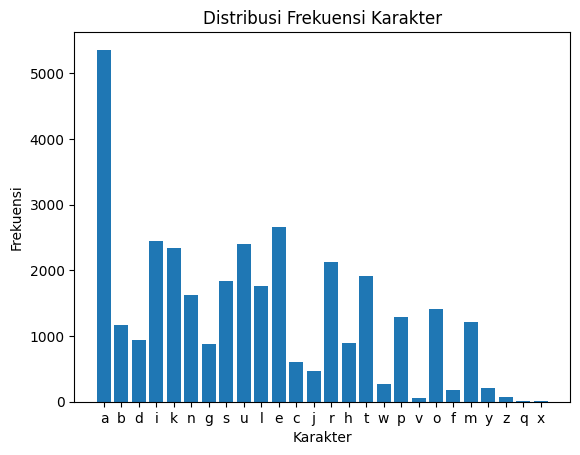

In [ ]:
import matplotlib.pyplot as plt

# Mengambil karakter dan frekuensi sebagai list terpisah
characters = list(d_pfk.keys())
frequencies = list(d_pfk.values())

# Plotting
plt.bar(characters, frequencies)
plt.xlabel('Karakter')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Karakter')
plt.show()

Distribusi Frekuensi Karakter Kata Tebakan

In [ ]:
t_pfk = get_PFK(kataTebakan)
t_pfk

{'a': 445,
 'b': 77,
 'd': 90,
 'u': 201,
 'l': 138,
 'e': 272,
 'c': 65,
 'r': 214,
 'i': 224,
 'n': 130,
 'g': 55,
 'p': 119,
 's': 169,
 'f': 12,
 'k': 183,
 'h': 103,
 'j': 35,
 't': 152,
 'm': 126,
 'o': 109,
 'y': 22,
 'w': 32,
 'z': 10,
 'v': 5,
 'q': 2}

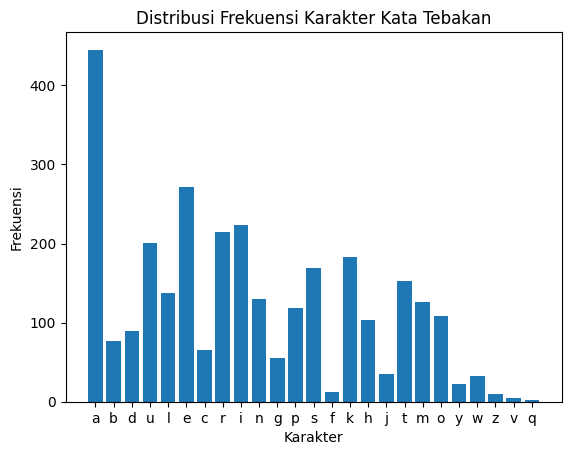

In [ ]:
# Mengambil karakter dan frekuensi sebagai list terpisah
characters = list(t_pfk.keys())
frequencies = list(t_pfk.values())

# Plotting
plt.bar(characters, frequencies)
plt.xlabel('Karakter')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Karakter Kata Tebakan')
plt.show()

Distribusi Frekuensi Karakter Kata Rahasia

In [ ]:
r_pfk = get_PFK(kataRahasia)
r_pfk

{'a': 4912,
 'b': 1094,
 'd': 851,
 'i': 2226,
 'k': 2152,
 'n': 1491,
 'g': 823,
 's': 1673,
 'j': 439,
 'u': 2200,
 'r': 1908,
 'e': 2383,
 'h': 792,
 't': 1765,
 'c': 545,
 'l': 1630,
 'w': 240,
 'v': 53,
 'o': 1306,
 'f': 174,
 'm': 1085,
 'p': 1164,
 'y': 194,
 'z': 57,
 'q': 4,
 'x': 4}

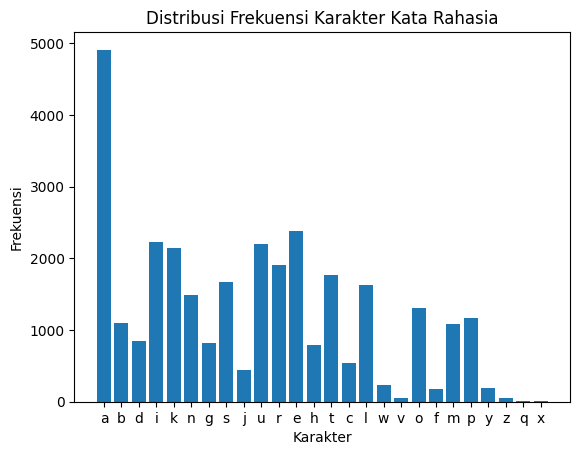

In [ ]:
# Mengambil karakter dan frekuensi sebagai list terpisah
characters = list(r_pfk.keys())
frequencies = list(r_pfk.values())

# Plotting
plt.bar(characters, frequencies)
plt.xlabel('Karakter')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Karakter Kata Rahasia')
plt.show()

## Distribusi Frekuensi Posisi Karakter

Distribusi Frekuensi Posisi Karakter dataKata

In [ ]:
d_pfpk = get_PFPK(kataRahasia)
d_pfpk

sorted_dpfpk = dict(sorted(d_pfpk.items(), key=lambda x: x[0]))

for key, value in sorted_dpfpk.items():
    print(key, value)

a#0 270
a#1 1828
a#2 191
a#3 2170
a#4 453
b#0 498
b#1 32
b#2 431
b#3 65
b#4 68
c#0 293
c#1 6
c#2 200
c#3 46
d#0 313
d#1 22
d#2 357
d#3 107
d#4 52
e#0 124
e#1 1539
e#2 55
e#3 597
e#4 68
f#0 86
f#1 11
f#2 43
f#3 7
f#4 27
g#0 340
g#1 12
g#2 285
g#3 55
g#4 131
h#0 139
h#1 17
h#2 128
h#3 9
h#4 499
i#0 104
i#1 690
i#2 96
i#3 915
i#4 421
j#0 220
j#1 9
j#2 176
j#3 30
j#4 4
k#0 724
k#1 43
k#2 458
k#3 39
k#4 888
l#0 453
l#1 67
l#2 630
l#3 49
l#4 431
m#0 312
m#1 108
m#2 347
m#3 55
m#4 263
n#0 113
n#1 186
n#2 478
n#3 188
n#4 526
o#0 62
o#1 580
o#2 66
o#3 476
o#4 122
p#0 517
p#1 30
p#2 346
p#3 52
p#4 219
q#0 2
q#2 2
r#0 361
r#1 102
r#2 710
r#3 89
r#4 646
s#0 595
s#1 48
s#2 407
s#3 103
s#4 520
t#0 465
t#1 27
t#2 469
t#3 135
t#4 669
u#0 80
u#1 841
u#2 72
u#3 987
u#4 220
v#0 32
v#1 4
v#2 11
v#3 6
w#0 84
w#1 2
w#2 132
w#3 22
x#0 4
y#0 17
y#1 26
y#2 121
y#3 28
y#4 2
z#0 25
z#1 3
z#2 22
z#3 3
z#4 4


Distribusi Frekuensi Karakter Kata Tebakan

In [ ]:
t_pfpk = get_PFPK(kataTebakan)
t_pfpk

sorted_tpfpk = dict(sorted(t_pfpk.items(), key=lambda x: x[0]))

for key, value in sorted_tpfpk.items():
    print(key, value)

a#0 24
a#1 160
a#2 15
a#3 196
a#4 50
b#0 33
b#1 5
b#2 29
b#3 5
b#4 5
c#0 33
c#2 27
c#3 5
d#0 24
d#1 3
d#2 43
d#3 15
d#4 5
e#0 5
e#1 168
e#2 8
e#3 81
e#4 10
f#0 4
f#1 2
f#2 3
f#4 3
g#0 15
g#2 18
g#3 9
g#4 13
h#0 15
h#1 2
h#2 19
h#3 2
h#4 65
i#0 5
i#1 73
i#2 8
i#3 98
i#4 40
j#0 15
j#1 1
j#2 14
j#3 3
j#4 2
k#0 68
k#1 5
k#2 41
k#3 4
k#4 65
l#0 45
l#1 2
l#2 58
l#3 2
l#4 31
m#0 51
m#1 11
m#2 27
m#3 7
m#4 30
n#0 18
n#1 14
n#2 37
n#3 17
n#4 44
o#0 6
o#1 52
o#2 4
o#3 38
o#4 9
p#0 41
p#1 2
p#2 51
p#3 8
p#4 17
q#0 1
q#2 1
r#0 44
r#1 14
r#2 72
r#3 6
r#4 78
s#0 69
s#1 2
s#2 46
s#3 12
s#4 40
t#0 43
t#1 2
t#2 33
t#3 9
t#4 65
u#0 12
u#1 76
u#2 13
u#3 76
u#4 24
v#0 1
v#1 1
v#2 2
v#3 1
w#0 21
w#1 1
w#2 8
w#3 2
y#1 2
y#2 18
y#3 2
z#0 5
z#2 3
z#4 2


Distribusi Frekuensi Karakter Kata Rahasia

In [ ]:
r_pfpk = get_PFPK(kataRahasia)
r_pfpk

sorted_rpfpk = dict(sorted(r_pfpk.items(), key=lambda x: x[0]))

for key, value in sorted_rpfpk.items():
    print(key, value)

a#0 270
a#1 1828
a#2 191
a#3 2170
a#4 453
b#0 498
b#1 32
b#2 431
b#3 65
b#4 68
c#0 293
c#1 6
c#2 200
c#3 46
d#0 313
d#1 22
d#2 357
d#3 107
d#4 52
e#0 124
e#1 1539
e#2 55
e#3 597
e#4 68
f#0 86
f#1 11
f#2 43
f#3 7
f#4 27
g#0 340
g#1 12
g#2 285
g#3 55
g#4 131
h#0 139
h#1 17
h#2 128
h#3 9
h#4 499
i#0 104
i#1 690
i#2 96
i#3 915
i#4 421
j#0 220
j#1 9
j#2 176
j#3 30
j#4 4
k#0 724
k#1 43
k#2 458
k#3 39
k#4 888
l#0 453
l#1 67
l#2 630
l#3 49
l#4 431
m#0 312
m#1 108
m#2 347
m#3 55
m#4 263
n#0 113
n#1 186
n#2 478
n#3 188
n#4 526
o#0 62
o#1 580
o#2 66
o#3 476
o#4 122
p#0 517
p#1 30
p#2 346
p#3 52
p#4 219
q#0 2
q#2 2
r#0 361
r#1 102
r#2 710
r#3 89
r#4 646
s#0 595
s#1 48
s#2 407
s#3 103
s#4 520
t#0 465
t#1 27
t#2 469
t#3 135
t#4 669
u#0 80
u#1 841
u#2 72
u#3 987
u#4 220
v#0 32
v#1 4
v#2 11
v#3 6
w#0 84
w#1 2
w#2 132
w#3 22
x#0 4
y#0 17
y#1 26
y#2 121
y#3 28
y#4 2
z#0 25
z#1 3
z#2 22
z#3 3
z#4 4


## get Frekuensi

In [ ]:
def get_Frekuensi():
    kataTebakan.extend(kataRahasia)

    # peta frekuensi karakter kata tebakan
    tebakan_pfk = get_PFK(kataTebakan)
    fk_tebakan = get_FK(len(kataTebakan) * panjangkata, tebakan_pfk)

    # peta frekuensi karakter jawaban
    jawaban_pfk = get_PFK(kataRahasia)
    fk_jawaban = get_FK(len(kataRahasia) * panjangkata, jawaban_pfk)

    # peta frekuensi posisi karakter kata tebakan
    tebakan_pfpk = get_PFPK(kataTebakan)
    fpk_tebakan = get_FPK(len(kataTebakan), tebakan_pfpk)

    # peta frekuensi posisi karakter jawaban
    jawaban_pfpk = get_PFPK(kataRahasia)
    fpk_jawaban = get_FPK(len(kataRahasia), jawaban_pfpk)

    return fk_tebakan, fk_jawaban, fpk_tebakan, fpk_jawaban

# Class Hasil

In [ ]:
class Hasil:
    def __init__(self, jawaban, tebakan, waktu_keberhasilan):
        self.jawaban = jawaban
        self.tebakan = tebakan
        self.waktu_keberhasilan = waktu_keberhasilan

    def __str__(self):
        return f"{self.jawaban},{'#'.join(self.tebakan)},{len(self.tebakan)},{self.waktu_keberhasilan}"

def get_modelKata(letters, model, alphabet):
    return ''.join([alphabet[model[letter_key].as_long()] for letter_key in letters])

# Main Code

In [ ]:
## MAIN CODE
if __name__ == '__main__':

    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    letters = [z3.Int(f"letter_{i}") for i in range(panjangkata)]
    kataTebakan.extend(kataRahasia)
    logging.info(f"Jumlah Kata Rahasia = {len(kataRahasia)}, Jumlah Kata Tebakan = {len(kataTebakan)}")

    disjungsi_kata = []
    for katatebakan in kataTebakan:
        konjungsi_kata = z3.And([letters[i] == ord(katatebakan[i]) - 97 for i in range(len(katatebakan))])
        disjungsi_kata.append(konjungsi_kata)

    # random.shuffle(kataRahasia)
    results = []
    for random_answer in kataRahasia:
        start_time = time.time()

        # Creating Solver
        solver = z3.Optimize() if isOptimize else z3.Solver()

        if rangeHuruf:
            logging.info("Menggunakan Set Panjang Huruf")
            for letter in letters:
                solver.add(letter >= 0, letter <= 25)
        solver.add(z3.Or(disjungsi_kata))

        if isOptimize:
            if fkTebakan:
                fk_tebakan, _, _, _ = get_Frekuensi()
                logging.info("Using character frequency hints valid guesses")
                for fk in fk_tebakan:
                    for letter in letters:
                        if freq_group:
                            solver.add_soft(letter == ord(fk.character) - 97, fk.frequency, fk.character)
                        else:
                            solver.add_soft(letter == ord(fk.character) - 97, fk.frequency)


            elif fkJawaban:
                _, fk_jawaban, _, _ = get_Frekuensi()
                logging.info("Using character frequency hints answers")
                for fk in fk_jawaban:
                    if freq_group:
                        solver.add_soft(z3.Or(tuple([letter == ord(fk.character) - 97 for letter in letters])), fk.frequency, fk.character)
                    else:
                        solver.add_soft(z3.Or(tuple([letter == ord(fk.character) - 97 for letter in letters])), fk.frequency)


            elif fpkTebakan:
                _, _, fpk_tebakan, _ = get_Frekuensi()
                logging.info("Using character position frequency hints valid guesses")
                for fpk in fpk_tebakan:
                    if freq_group:
                        solver.add_soft(letters[int(fpk.index)] == ord(fpk.character) - 97, fpk.frequency, fpk.character)
                    else:
                      solver.add_soft(letters[int(fpk.index)] == ord(fpk.character) - 97, fpk.frequency)


            elif fpkJawaban:
                _, _, _, fpk_jawaban = get_Frekuensi()
                logging.info("Menggunakan frekuensi posisi karakter untuk mengisyaratkan tebakan yang valid")
                for fpk in fpk_jawaban:
                    if freq_group:
                        solver.add_soft(letters[int(fpk.index)] == ord(fpk.character) - 97, fpk.frequency, fpk.character)
                    else:
                      solver.add_soft(letters[int(fpk.index)] == ord(fpk.character) - 97, fpk.frequency)



        frekuensikarakterJawabanacak = {}
        for c in random_answer:
            if c in frekuensikarakterJawabanacak:
                frekuensikarakterJawabanacak[c] = frekuensikarakterJawabanacak[c] + 1
            else:
                frekuensikarakterJawabanacak[c] = 1
        logging.info(f"z3 will attempt to answer {random_answer}")
        guess = ''

        # Keep track of guess list
        guessed = []
        while guess != random_answer and len(guessed) < maxTebakanSMT:
          if NORVIG and len(guessed) in NORVIG_GUESSES:
            guess = NORVIG_GUESSES[len(guessed)]
          else:
            check_sat = solver.check()
            model = solver.model()
            guess = get_modelKata(letters, model, alphabet)
          guessed.append(guess)
          logging.info(f"Guess: {guess}")

            # If the guess is correct, we win!
          if guess == random_answer:
            logging.info(f"WINNER! {len(guessed)}")
            break

          guess_character_not_in_answer = set()
          guess_character_in_answer_right_position = []
          guess_character_in_answer_wrong_position = []
          guess_character_in_answer_at_most = set()
          random_answer_character_freq_temp = copy.deepcopy(frekuensikarakterJawabanacak)


          for c in range(len(guess)):
            if guess[c] == random_answer[c]:
              guess_character_in_answer_right_position.append((c, guess[c]))
              random_answer_character_freq_temp[guess[c]] = random_answer_character_freq_temp[guess[c]] - 1
              guess = guess[:c] + '1' + guess[c + 1:]

          for c in range(len(guess)):
            if guess[c] == '1':
              continue
            if guess[c] in random_answer_character_freq_temp:
              if random_answer_character_freq_temp[guess[c]] > 0:
                guess_character_in_answer_wrong_position.append((c, guess[c]))
                random_answer_character_freq_temp[guess[c]] = random_answer_character_freq_temp[guess[c]] - 1
              else:
                guess_character_in_answer_at_most.add((c, guess[c], frekuensikarakterJawabanacak[guess[c]]))
            else:
              guess_character_not_in_answer.add(guess[c])

          for i, c in guess_character_in_answer_right_position:
            solver.add(letters[i] == ord(c) - 97)

          for i, c in guess_character_in_answer_wrong_position:
            solver.add(letters[i] != ord(c) - 97)
            solver.add(z3.Or([letters[j] == ord(c) - 97 for j in range(len(letters)) if j != i]))

          for c in guess_character_not_in_answer:
            for letter in letters:
              solver.add(letter != ord(c) - 97)
          letters_processed = set()

          for i, c, f in guess_character_in_answer_at_most:
            solver.add(letters[i] != ord(c) - 97)
            if c not in letters_processed:
              at_most_cc = [letter == ord(c) - 97 for letter in letters]
              at_most_cc.append(f)

              solver.add(z3.AtMost(tuple(at_most_cc)))
              letters_processed.add(c)

        tts = round(time.time() - start_time, 2)
        results.append(Hasil(random_answer, guessed, tts))
        logging.info(f"Took {tts} seconds to solve")



    # Write out results to csv file (so we can graph stuff later)
    with open(f"results.{hasilAkhir}.csv", "w") as f:
        f.write('answer,guessed,num_guessed,time_to_solve\n')
        for result in results:
            f.write(f"{result}\n")

Output streaming akan dipotong hingga 5000 baris terakhir.
INFO:root:Guess: kerai
INFO:root:Guess: ileum
INFO:root:Guess: elite
INFO:root:Guess: elips
INFO:root:Guess: eling
INFO:root:WINNER! 5
INFO:root:Took 30.66 seconds to solve
INFO:root:Using character frequency hints answers
INFO:root:z3 will attempt to answer elips
INFO:root:Guess: kerai
INFO:root:Guess: ileum
INFO:root:Guess: elite
INFO:root:Guess: elips
INFO:root:WINNER! 4
INFO:root:Took 30.54 seconds to solve
INFO:root:Using character frequency hints answers
INFO:root:z3 will attempt to answer elite
INFO:root:Guess: kerai
INFO:root:Guess: ileum
INFO:root:Guess: elite
INFO:root:WINNER! 3
INFO:root:Took 28.75 seconds to solve
INFO:root:Using character frequency hints answers
INFO:root:z3 will attempt to answer eltor
INFO:root:Guess: kerai
INFO:root:Guess: puter
INFO:root:Guess: eltor
INFO:root:WINNER! 3
INFO:root:Took 28.39 seconds to solve
INFO:root:Using character frequency hints answers
INFO:root:z3 will attempt to answer el